<p style="color: green; font-size: 24px;text-align: center;">Chronic Kidney Disease Prediction Model</p>

In [1]:
# import thư viện và công cụ cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
df= pd.read_csv('../kidney_disease.csv')

In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no            ckd  
1   no            ckd  
2  yes            ckd  
3  yes            ckd  
4   no            ckd

In [5]:
# Tạo từ điển ánh xạ cột tiếng Anh → tiếng Việt +
col_map = {
    'age': 'Tuổi',
    'bp': 'Huyết Áp',
    'sg': 'Tỷ trọng nước tiểu',
    'al': 'Hàm lượng albumin trong nước tiểu',
    'su': 'Mức đường trong nước tiểu',
    'rbc': 'Tình trạng hồng cầu',
    'pc': 'Tình trạng bạch cầu mủ',
    'pcc': 'Cụm bạch cầu mủ',
    'ba': 'Vi khuẩn trong nước tiểu',
    'bgr': 'Đường huyết ngẫu nhiên',
    'bu': 'Ure máu',
    'sc': 'Creatinine huyết thanh',
    'sod': 'Natri',
    'pot': 'kali',
    'hemo': 'Huyết sắc tố',
    'pcv': 'Thể tích hồng cầu đóng gói',
    'wc': 'Số lượng bạch cầu',
    'rc': 'Số lượng hồng cầu',
    'htn': 'Tăng huyết áp',
    'dm': 'Tiểu đường',
    'cad': 'Bệnh động mạch vành',
    'appet': 'Tình trạng ăn uống',
    'pe': 'Phù chân',
    'ane': 'Thiếu máu',
    'classification': 'Phân loại'
}
# Đổi tên cột trong DataFrame
df.rename(columns=col_map, inplace=True)
df.head()

id  Tuổi  Huyết Áp  Tỷ trọng nước tiểu  Hàm lượng albumin trong nước tiểu  \
0   0  48.0      80.0               1.020                                1.0   
1   1   7.0      50.0               1.020                                4.0   
2   2  62.0      80.0               1.010                                2.0   
3   3  48.0      70.0               1.005                                4.0   
4   4  51.0      80.0               1.010                                2.0   

   Mức đường trong nước tiểu Tình trạng hồng cầu Tình trạng bạch cầu mủ  \
0                        0.0                 NaN                 normal   
1                        0.0                 NaN                 normal   
2                        3.0              normal                 normal   
3                        0.0              normal               abnormal   
4                        0.0              normal                 normal   

  Cụm bạch cầu mủ Vi khuẩn trong nước tiểu  Đường huyết ngẫu nhiên  Ure máu  \
0      notpresent               notpresent                   121.0     36.0   
1      notpresent               notpresent                     NaN     18.0   
2      notpresent               notpresent                   423.0     53.0   
3         present               notpresent                   117.0     56.0   
4      notpresent               notpresent                   106.0     26.0   

   Creatinine huyết thanh  Natri  kali  Huyết sắc tố  \
0                     1.2    NaN   NaN          15.4   
1                     0.8    NaN   NaN          11.3   
2                     1.8    NaN   NaN           9.6   
3                     3.8  111.0   2.5          11.2   
4                     1.4    NaN   NaN          11.6   

  Thể tích hồng cầu đóng gói Số lượng bạch cầu Số lượng hồng cầu  \
0                         44              7800               5.2   
1                         38              6000               NaN   
2                         31              7500               NaN   
3                         32              6700               3.9   
4                         35              7300               4.6   

  Tăng huyết áp Tiểu đường Bệnh động mạch vành Tình trạng ăn uống Phù chân  \
0           yes        yes                  no               good       no   
1            no         no                  no               good       no   
2            no        yes                  no               poor       no   
3           yes         no                  no               poor      yes   
4            no         no                  no               good       no   

  Thiếu máu Phân loại  
0        no       ckd  
1        no       ckd  
2       yes       ckd  
3       yes       ckd  
4        no       ckd

<p style="font-size: 17px;">Columns id không thực sự là một feature hữu ích nên chúng ta sẽ convert id thành index</p><br>

In [6]:
# convert id thành index
df.set_index(df.id,inplace=True)

In [7]:
df.head()

id  Tuổi  Huyết Áp  Tỷ trọng nước tiểu  Hàm lượng albumin trong nước tiểu  \
id                                                                              
0    0  48.0      80.0               1.020                                1.0   
1    1   7.0      50.0               1.020                                4.0   
2    2  62.0      80.0               1.010                                2.0   
3    3  48.0      70.0               1.005                                4.0   
4    4  51.0      80.0               1.010                                2.0   

    Mức đường trong nước tiểu Tình trạng hồng cầu Tình trạng bạch cầu mủ  \
id                                                                         
0                         0.0                 NaN                 normal   
1                         0.0                 NaN                 normal   
2                         3.0              normal                 normal   
3                         0.0              normal               abnormal   
4                         0.0              normal                 normal   

   Cụm bạch cầu mủ Vi khuẩn trong nước tiểu  Đường huyết ngẫu nhiên  Ure máu  \
id                                                                             
0       notpresent               notpresent                   121.0     36.0   
1       notpresent               notpresent                     NaN     18.0   
2       notpresent               notpresent                   423.0     53.0   
3          present               notpresent                   117.0     56.0   
4       notpresent               notpresent                   106.0     26.0   

    Creatinine huyết thanh  Natri  kali  Huyết sắc tố  \
id                                                      
0                      1.2    NaN   NaN          15.4   
1                      0.8    NaN   NaN          11.3   
2                      1.8    NaN   NaN           9.6   
3                      3.8  111.0   2.5          11.2   
4                      1.4    NaN   NaN          11.6   

   Thể tích hồng cầu đóng gói Số lượng bạch cầu Số lượng hồng cầu  \
id                                                                  
0                          44              7800               5.2   
1                          38              6000               NaN   
2                          31              7500               NaN   
3                          32              6700               3.9   
4                          35              7300               4.6   

   Tăng huyết áp Tiểu đường Bệnh động mạch vành Tình trạng ăn uống Phù chân  \
id                                                                            
0            yes        yes                  no               good       no   
1             no         no                  no               good       no   
2             no        yes                  no               poor       no   
3            yes         no                  no               poor      yes   
4             no         no                  no               good       no   

   Thiếu máu Phân loại  
id                      
0         no       ckd  
1         no       ckd  
2        yes       ckd  
3        yes       ckd  
4         no       ckd

In [8]:
# drop id
df.drop('id', axis = 1 , inplace = True)

In [9]:
df.head()

Tuổi  Huyết Áp  Tỷ trọng nước tiểu  Hàm lượng albumin trong nước tiểu  \
id                                                                          
0   48.0      80.0               1.020                                1.0   
1    7.0      50.0               1.020                                4.0   
2   62.0      80.0               1.010                                2.0   
3   48.0      70.0               1.005                                4.0   
4   51.0      80.0               1.010                                2.0   

    Mức đường trong nước tiểu Tình trạng hồng cầu Tình trạng bạch cầu mủ  \
id                                                                         
0                         0.0                 NaN                 normal   
1                         0.0                 NaN                 normal   
2                         3.0              normal                 normal   
3                         0.0              normal               abnormal   
4                         0.0              normal                 normal   

   Cụm bạch cầu mủ Vi khuẩn trong nước tiểu  Đường huyết ngẫu nhiên  Ure máu  \
id                                                                             
0       notpresent               notpresent                   121.0     36.0   
1       notpresent               notpresent                     NaN     18.0   
2       notpresent               notpresent                   423.0     53.0   
3          present               notpresent                   117.0     56.0   
4       notpresent               notpresent                   106.0     26.0   

    Creatinine huyết thanh  Natri  kali  Huyết sắc tố  \
id                                                      
0                      1.2    NaN   NaN          15.4   
1                      0.8    NaN   NaN          11.3   
2                      1.8    NaN   NaN           9.6   
3                      3.8  111.0   2.5          11.2   
4                      1.4    NaN   NaN          11.6   

   Thể tích hồng cầu đóng gói Số lượng bạch cầu Số lượng hồng cầu  \
id                                                                  
0                          44              7800               5.2   
1                          38              6000               NaN   
2                          31              7500               NaN   
3                          32              6700               3.9   
4                          35              7300               4.6   

   Tăng huyết áp Tiểu đường Bệnh động mạch vành Tình trạng ăn uống Phù chân  \
id                                                                            
0            yes        yes                  no               good       no   
1             no         no                  no               good       no   
2             no        yes                  no               poor       no   
3            yes         no                  no               poor      yes   
4             no         no                  no               good       no   

   Thiếu máu Phân loại  
id                      
0         no       ckd  
1         no       ckd  
2        yes       ckd  
3        yes       ckd  
4         no       ckd

In [10]:
df.shape

(400, 25)

In [11]:
df.describe()

Tuổi    Huyết Áp  Tỷ trọng nước tiểu  \
count  391.000000  388.000000          353.000000   
mean    51.483376   76.469072            1.017408   
std     17.169714   13.683637            0.005717   
min      2.000000   50.000000            1.005000   
25%     42.000000   70.000000            1.010000   
50%     55.000000   80.000000            1.020000   
75%     64.500000   80.000000            1.020000   
max     90.000000  180.000000            1.025000   

       Hàm lượng albumin trong nước tiểu  Mức đường trong nước tiểu  \
count                         354.000000                 351.000000   
mean                            1.016949                   0.450142   
std                             1.352679                   1.099191   
min                             0.000000                   0.000000   
25%                             0.000000                   0.000000   
50%                             0.000000                   0.000000   
75%                             2.000000                   0.000000   
max                             5.000000                   5.000000   

       Đường huyết ngẫu nhiên     Ure máu  Creatinine huyết thanh       Natri  \
count              356.000000  381.000000              383.000000  313.000000   
mean               148.036517   57.425722                3.072454  137.528754   
std                 79.281714   50.503006                5.741126   10.408752   
min                 22.000000    1.500000                0.400000    4.500000   
25%                 99.000000   27.000000                0.900000  135.000000   
50%                121.000000   42.000000                1.300000  138.000000   
75%                163.000000   66.000000                2.800000  142.000000   
max                490.000000  391.000000               76.000000  163.000000   

             kali  Huyết sắc tố  
count  312.000000    348.000000  
mean     4.627244     12.526437  
std      3.193904      2.912587  
min      2.500000      3.100000  
25%      3.800000     10.300000  
50%      4.400000     12.650000  
75%      4.900000     15.000000  
max     47.000000     17.800000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tuổi                               391 non-null    float64
 1   Huyết Áp                           388 non-null    float64
 2   Tỷ trọng nước tiểu                 353 non-null    float64
 3   Hàm lượng albumin trong nước tiểu  354 non-null    float64
 4   Mức đường trong nước tiểu          351 non-null    float64
 5   Tình trạng hồng cầu                248 non-null    object 
 6   Tình trạng bạch cầu mủ             335 non-null    object 
 7   Cụm bạch cầu mủ                    396 non-null    object 
 8   Vi khuẩn trong nước tiểu           396 non-null    object 
 9   Đường huyết ngẫu nhiên             356 non-null    float64
 10  Ure máu                            381 non-null    float64
 11  Creatinine huyết thanh             383 non-null    float64
 12 

<div>
<p style="font-size: 24px;">Note: Tất cả các columns đều bị missdata</p>
<p style="font-size: 15px;">Các cột categorical: Tình trạng hồng cầu, Tình trạng bạch cầu mủ, Cụm bạch cầu mủ, Vi khuẩn trong nước tiểu,Tăng huyết áp, Tiểu đường,Bệnh động mạch vành, Tình trạng ăn uống, Phù chân, Thiếu máu, Phân loại </p>
<p style="font-size: 15px;">Các cột numerical: Tuổi, Huyết Áp, Tỷ trọng nước tiểu, Hàm lượng albumin trong nước tiểu, Mức đường trong nước tiểu, Đường huyết ngẫu nhiên, Ure máu ,Creatinine huyết thanh, Natri, kali, Huyết sắc tố</p>
<p style="font-size: 15px;">Các cột nhầm Dtype: Thể tích hồng cầu đóng gói, Số lượng bạch cầu, Số lượng hồng cầu</p>
<p style="font-size: 15px;">Không có cột bị mix type of data</p>
<p style="font-size: 15px;">Các kiểu Dtype trong data : Float64bit , Object</p>
</div>

In [13]:
# Chuyển đổi các cột bị nhầm Dtype từ object -> float64
df['Số lượng hồng cầu'] = pd.to_numeric(df['Số lượng hồng cầu'], errors='coerce')
df['Thể tích hồng cầu đóng gói'] = pd.to_numeric(df['Thể tích hồng cầu đóng gói'], errors='coerce')
df['Số lượng bạch cầu'] = pd.to_numeric(df['Số lượng bạch cầu'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tuổi                               391 non-null    float64
 1   Huyết Áp                           388 non-null    float64
 2   Tỷ trọng nước tiểu                 353 non-null    float64
 3   Hàm lượng albumin trong nước tiểu  354 non-null    float64
 4   Mức đường trong nước tiểu          351 non-null    float64
 5   Tình trạng hồng cầu                248 non-null    object 
 6   Tình trạng bạch cầu mủ             335 non-null    object 
 7   Cụm bạch cầu mủ                    396 non-null    object 
 8   Vi khuẩn trong nước tiểu           396 non-null    object 
 9   Đường huyết ngẫu nhiên             356 non-null    float64
 10  Ure máu                            381 non-null    float64
 11  Creatinine huyết thanh             383 non-null    float64
 12 

In [15]:
# Chuyển các cột Dtype Object thành categorical
#Tạo mảng các cột
features = ['Tình trạng hồng cầu','Tình trạng bạch cầu mủ','Cụm bạch cầu mủ','Vi khuẩn trong nước tiểu'
    ,'Tăng huyết áp','Tiểu đường','Bệnh động mạch vành'
    ,'Tình trạng ăn uống','Phù chân','Thiếu máu','Phân loại']

# tạo hàm chuyển đổi cột
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(df ,features)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Tuổi                               391 non-null    float64 
 1   Huyết Áp                           388 non-null    float64 
 2   Tỷ trọng nước tiểu                 353 non-null    float64 
 3   Hàm lượng albumin trong nước tiểu  354 non-null    float64 
 4   Mức đường trong nước tiểu          351 non-null    float64 
 5   Tình trạng hồng cầu                248 non-null    category
 6   Tình trạng bạch cầu mủ             335 non-null    category
 7   Cụm bạch cầu mủ                    396 non-null    category
 8   Vi khuẩn trong nước tiểu           396 non-null    category
 9   Đường huyết ngẫu nhiên             356 non-null    float64 
 10  Ure máu                            381 non-null    float64 
 11  Creatinine huyết thanh             383 non-null   

In [17]:
df.describe()

Tuổi    Huyết Áp  Tỷ trọng nước tiểu  \
count  391.000000  388.000000          353.000000   
mean    51.483376   76.469072            1.017408   
std     17.169714   13.683637            0.005717   
min      2.000000   50.000000            1.005000   
25%     42.000000   70.000000            1.010000   
50%     55.000000   80.000000            1.020000   
75%     64.500000   80.000000            1.020000   
max     90.000000  180.000000            1.025000   

       Hàm lượng albumin trong nước tiểu  Mức đường trong nước tiểu  \
count                         354.000000                 351.000000   
mean                            1.016949                   0.450142   
std                             1.352679                   1.099191   
min                             0.000000                   0.000000   
25%                             0.000000                   0.000000   
50%                             0.000000                   0.000000   
75%                             2.000000                   0.000000   
max                             5.000000                   5.000000   

       Đường huyết ngẫu nhiên     Ure máu  Creatinine huyết thanh       Natri  \
count              356.000000  381.000000              383.000000  313.000000   
mean               148.036517   57.425722                3.072454  137.528754   
std                 79.281714   50.503006                5.741126   10.408752   
min                 22.000000    1.500000                0.400000    4.500000   
25%                 99.000000   27.000000                0.900000  135.000000   
50%                121.000000   42.000000                1.300000  138.000000   
75%                163.000000   66.000000                2.800000  142.000000   
max                490.000000  391.000000               76.000000  163.000000   

             kali  Huyết sắc tố  Thể tích hồng cầu đóng gói  \
count  312.000000    348.000000                  329.000000   
mean     4.627244     12.526437                   38.884498   
std      3.193904      2.912587                    8.990105   
min      2.500000      3.100000                    9.000000   
25%      3.800000     10.300000                   32.000000   
50%      4.400000     12.650000                   40.000000   
75%      4.900000     15.000000                   45.000000   
max     47.000000     17.800000                   54.000000   

       Số lượng bạch cầu  Số lượng hồng cầu  
count         294.000000         269.000000  
mean         8406.122449           4.707435  
std          2944.474190           1.025323  
min          2200.000000           2.100000  
25%          6500.000000           3.900000  
50%          8000.000000           4.800000  
75%          9800.000000           5.400000  
max         26400.000000           8.000000

In [18]:
# Tìm các unique values trong các cột categorical
cat_cols = [col for col in df.columns if df[col].dtype == 'category']
num_cols = [col for col in df.columns if df[col].dtype != 'category']

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Tình trạng hồng cầu has [NaN, 'normal', 'abnormal']
Categories (2, object): ['abnormal', 'normal'] values

Tình trạng bạch cầu mủ has ['normal', 'abnormal', NaN]
Categories (2, object): ['abnormal', 'normal'] values

Cụm bạch cầu mủ has ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present'] values

Vi khuẩn trong nước tiểu has ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present'] values

Tăng huyết áp has ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes'] values

Tiểu đường has ['yes', 'no', ' yes', '\tno', '\tyes', NaN]
Categories (5, object): ['\tno', '\tyes', ' yes', 'no', 'yes'] values

Bệnh động mạch vành has ['no', 'yes', '\tno', NaN]
Categories (3, object): ['\tno', 'no', 'yes'] values

Tình trạng ăn uống has ['good', 'poor', NaN]
Categories (2, object): ['good', 'poor'] values

Phù chân has ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes'] values

Thiếu máu has ['no', 'yes', NaN]
Categories (2, object): ['no', 'y

<div>
<p style="font-size: 20px;">Các cột bị điền giá trị lỗi</p>
<p style="font-size: 15px;">Phân loại, Bệnh động mạch vành, Tiểu đường,</p>
</div>

In [19]:
# Sửa lại các giá trị bị điền lỗi

df['Tiểu đường'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['Bệnh động mạch vành'] = df['Bệnh động mạch vành'].replace(to_replace = '\tno', value='no')

df['Phân loại'] = df['Phân loại'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [20]:
cat_cols = [col for col in df.columns if df[col].dtype == 'category']
num_cols = [col for col in df.columns if df[col].dtype != 'category']

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Tình trạng hồng cầu has [NaN, 'normal', 'abnormal']
Categories (2, object): ['abnormal', 'normal'] values

Tình trạng bạch cầu mủ has ['normal', 'abnormal', NaN]
Categories (2, object): ['abnormal', 'normal'] values

Cụm bạch cầu mủ has ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present'] values

Vi khuẩn trong nước tiểu has ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present'] values

Tăng huyết áp has ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes'] values

Tiểu đường has ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes'] values

Bệnh động mạch vành has ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes'] values

Tình trạng ăn uống has ['good', 'poor', NaN]
Categories (2, object): ['good', 'poor'] values

Phù chân has ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes'] values

Thiếu máu has ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes'] values

Phân loại has ['ckd', 'not ckd']
Categories (2, objec

In [21]:
df.describe(include=['category'])

Tình trạng hồng cầu Tình trạng bạch cầu mủ Cụm bạch cầu mủ  \
count                  248                    335             396   
unique                   2                      2               2   
top                 normal                 normal      notpresent   
freq                   201                    259             354   

       Vi khuẩn trong nước tiểu Tăng huyết áp Tiểu đường Bệnh động mạch vành  \
count                       396           398        398                 398   
unique                        2             2          2                   2   
top                  notpresent            no         no                  no   
freq                        374           251        261                 364   

       Tình trạng ăn uống Phù chân Thiếu máu Phân loại  
count                 399      399       399       400  
unique                  2        2         2         2  
top                  good       no        no       ckd  
freq                  317      323       339       250

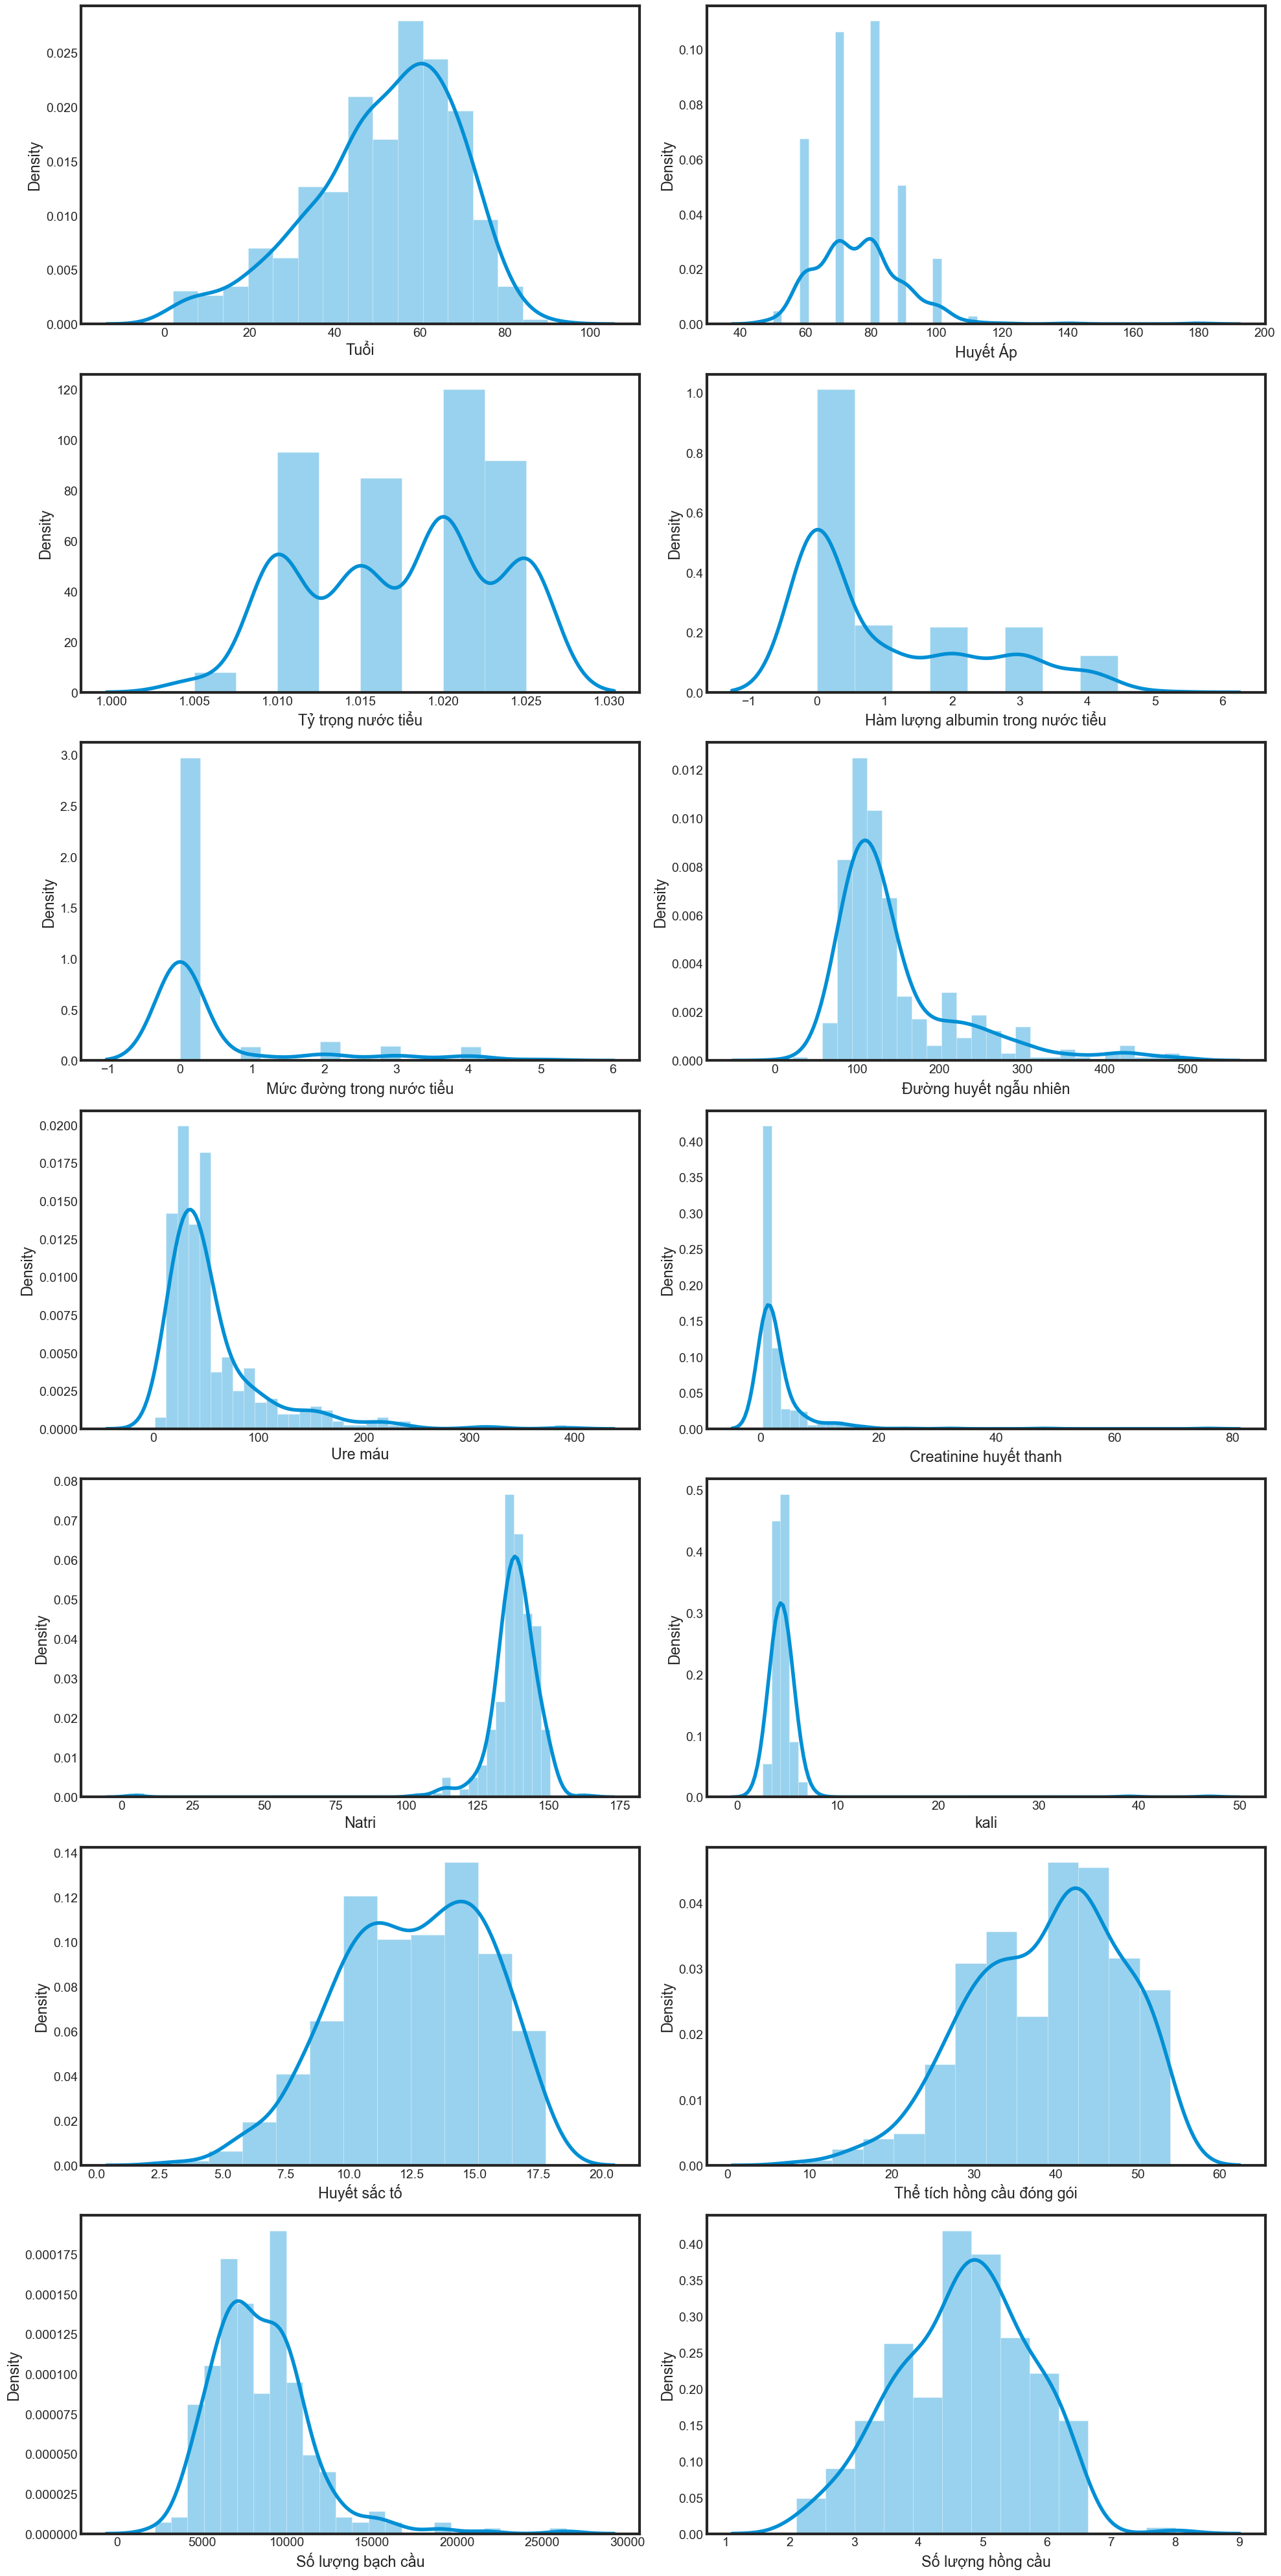

In [22]:
# kiểm tra phân phối của các đặc trưng dạng số
sns.set_style("white")
plt.figure(figsize = (20, 40))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(7, 2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<div>
<p style="font-size: 24px;">Nhận xét sơ bộ về phân phối của các đặc trưng số </p>
<p style="font-size: 15px;">Tuổi: Phân phối tuổi không bị lệch quá , phân bố tuổi tập trung vào khoảng 40-60 tuổi.<br>
Số lượng tuổi lớn nhất rơi vào khoảng 50-65 tuổi , cao nhất là lớn hơn 55 tuổi.<br>
Có số ít các điểm outlier > 75 tuổi và < 20 tuổi
Kết luận : dataset với cột tuổi phân bố khá ổn không bị lệch , tập trung chủ yếu và những người trung niên và cao tuổi <br>
Và số ít là tuổi rất trẻ và quá già <br>
Và thông thường hoắc theo y học những người càng cao tuổi thì nguy cơ mắc thận mãn tính càng cao <br>
Còn những người rất trẻ mà bị mắc thì có thể di truyền hoặc bẩm sinh
</p><br>
<p style="font-size: 15px;">Huyết áp: Vì trong dataset có rất ít người có huyết áp >120 mà nếu đo theo tâm thu thì huyết áp bình thường khoảng từ 110-130 vậy nên đây có thể là đo theo tâm trương.
Nhìn biểu đồ ta thấy huyết áp phân bố chỉ yếu ở khoảng 60-90<br>
Tập trung cao nhất vào khoảng 70-80 và cũng có một nhóm người huyết áp trên 90 . Mặc dù nếu một người mắc cao huyết áp <br>
Thì nguy cơ mắc suy thận rất lớn nhưng không phải cứ đo huyết áp cao thì mắc định là mắc cao huyết áp<br>
Để chuẩn đoán 1 người mắc cao huyết áp còn nhiều vấn đề khác</p><br>
<p style="font-size: 15px;">Tỷ trong nước tiểu: Nhìn vào biểu đồ ta có thể thấy rằng đa số tập trung nhiều ở khoảng 1.010-1.025<br>
Cao nhất vào khoảng 1.020 
Theo y khoa thì nếu người nào có tỷ trọng nước tiểu dưới 1.010 thì có nguy cơ cực cao sẽ bị mắc thận mãn tính<br>
Chúng ta nhìn vào thống kê thì thấy hầu như hoặc không muốn nói là tất cả những người dưới 1,010 đều mắc CKD<br>
Nên dây sẽ là 1 featrue quan trọng bặc nhất
</p><br>
<p style="font-size: 15px;">Hàm lượng albumin(Protein) trong nước tiểu: Nhìn vào biểu đồ ta có thể thấy tập trung chủ yếu ở 0 và có các nhóm từ 1 đến 4 <br>
Ta có thể nhìn thống kê hầu hết những người ở mức 1 đến 4 thì tỉ lệ rất cao sẽ mắc thận mãn tính <br>
Cho nên đây cũng sẽ là 1 feature quan trọng</p><br>
<p style="font-size: 15px;">Chúng ta có thể nhìn thấy rằng cột phân phối mức đường trong nước tiểu<br>
Chủ yếu tập trung ở 0 v có những nhóm người có mức từ 1-4<br>
Theo y khoa thì nếu > 0.8 thì có thể bệnh thận đang âm thầm diễn ra <br>
Đây sẽ là feature quan trọng vì không có bất kì người nào có mức đường trong nước tiểu > 0 mà không mắc ckd cả</p><br>

<p style="font-size: 15px;">Chúng ta có thể nhìn thấy rằng cột phân phối mức đường trong nước tiểu<br>
Chủ yếu tập trung ở 0 v có những nhóm người có mức từ 1-4<br>
Theo y khoa thì nếu > 0.8 thì có thể bệnh thận đang âm thầm diễn ra <br>
Đây sẽ là feature quan trọng vì không có bất kì người nào có mức đường trong nước tiểu > 0 mà không mắc ckd cả</p><br>
</div>

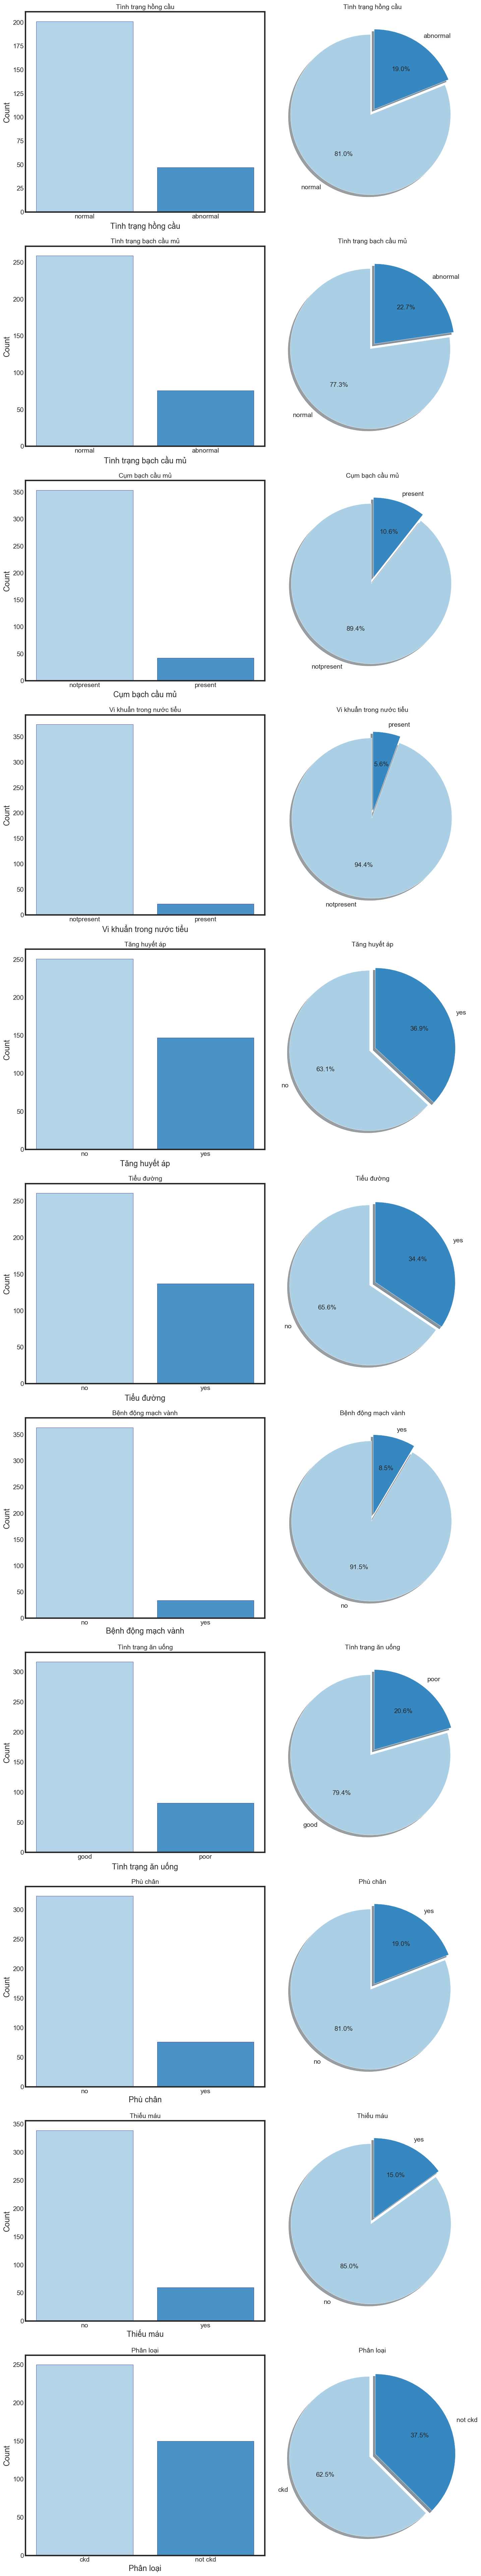

In [23]:
# Trực quan đặc trưng dạng category

sns.set_style("white")

n_cols = 2  
n_rows = len(cat_cols)

plt.figure(figsize=(15, 7 * n_rows))

plot_number = 1

for column in cat_cols:

    # Lấy số lượng từng nhãn trong cột
    value_counts = df[column].value_counts()
    categories = value_counts.index
    counts = value_counts.values
    
    # Tạo bảng màu xanh cho từng cột (mỗi cột 1 màu khác nhau)
    colors = sns.color_palette("Blues", len(categories))

    # ----- BIỂU ĐỒ BAR (mỗi cột một màu xanh) -----
    plt.subplot(n_rows, n_cols, plot_number)
    plt.bar(categories, counts, color=colors, edgecolor='navy', alpha=0.9)
    plt.title(f"{column}", fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Count")

    plot_number += 1

    # ----- BIỂU ĐỒ PIE (màu xanh + hiệu ứng bóng nổi) -----
    plt.subplot(n_rows, n_cols, plot_number)
    value_counts.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,     # dùng cùng bảng màu xanh
        shadow=True,       # hiệu ứng bóng nổi
        explode=[0.04] * len(categories),
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f"{column}", fontsize=14)
    plt.ylabel("")

    plot_number += 1
plt.tight_layout()
plt.show()

<p style="font-size: 15px;">Tình trạng hồng cầu được đánh giá trông qua 3 chỉ số bao gồm :<br>
Huyết sắc tố , Số lượng hồng cầu , Thể tích khối hồng cầu<br>
Nếu bình thường thì cho thấy rằng người này không bị thiếu máu cơ thể đủ oxy để nuôi các mô ...<br>
Nếu bất thường thì cho thấy rằng đang mắc 1 vài vấn đề trong đó có ckd </p><br>
<p style="font-size: 15px;">Tình trạng bạch cầu mủ là các tế bào bạch cầu xuất hiện trong nước tiểu.<br>
khi bình thường cho thấy rằng Thận – bàng quang – niệu đạo không bị viêm , Đường tiết niệu sạch, không có nhiễm trùng<br>
Khi bất thường cho thấy rằng Hệ tiết niệu đang bị viêm hoặc nhiễm trùng, rất có thể là:<br>
Viêm bàng quang (UTI) , Viêm thận – bể thận nguy hiểm hơn
</p><br>
<p style="font-size: 15px;">Cụm bạch cầu mủ là nhiều bạch cầu kết dính lại thành từng cụm, nhìn thấy rõ dưới kính hiển vi.<br>
Nếu bất thường cho thấy rằng Viêm thận – bể thận , Nhiễm trùng đường tiểu nặng , Sỏi thận gây viêm hoặc tắc nghẽn ,Viêm kẽ thận.<br>
</p><br>
<p style="font-size: 15px;">Cụm bạch cầu mủ là nhiều bạch cầu kết dính lại thành từng cụm, nhìn thấy rõ dưới kính hiển vi.<br>
Nếu bất thường cho thấy rằng Viêm thận – bể thận , Nhiễm trùng đường tiểu nặng , Sỏi thận gây viêm hoặc tắc nghẽn ,Viêm kẽ thận.<br>
</p><br>
<p style="font-size: 15px;">Vi khuẩn trong nước tiểu <br>
Nếu bình thường Đường tiết niệu sạch, Không có nhiễm khuẩn, Không có viêm bàng quang hoặc viêm thận
</p><br>
<p style="font-size: 15px;">Bệnh động mạch vành là tình trạng mảng xơ vữa (cholesterol, mỡ, canxi) tích tụ trong thành động mạch vành – là các mạch máu nuôi tim. <br>
</p><br>


<p style="color: green; font-size: 24px; text-align: center;">
    Exploratory Data Analysis (EDA)
</p>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Tuổi                               391 non-null    float64 
 1   Huyết Áp                           388 non-null    float64 
 2   Tỷ trọng nước tiểu                 353 non-null    float64 
 3   Hàm lượng albumin trong nước tiểu  354 non-null    float64 
 4   Mức đường trong nước tiểu          351 non-null    float64 
 5   Tình trạng hồng cầu                248 non-null    category
 6   Tình trạng bạch cầu mủ             335 non-null    category
 7   Cụm bạch cầu mủ                    396 non-null    category
 8   Vi khuẩn trong nước tiểu           396 non-null    category
 9   Đường huyết ngẫu nhiên             356 non-null    float64 
 10  Ure máu                            381 non-null    float64 
 11  Creatinine huyết thanh             383 non-null   

<p style="font-size: 25px;">
    Tương quan đặc trưng phân loại:<br>
</p>
<p style="font-size: 15px;">Tình trạng hồng cầu, Tình trạng bạch cầu mủ, Cụm bạch cầu mủ, Vi khuẩn trong nước tiểu,Tăng huyết áp
    ,<br>Tiểu đường,Bệnh động mạch vành, Tình trạng ăn uống, Phù chân, Thiếu máu, Phân loại</p><hr>

<br>Phân Loại

In [25]:
# Target variable : Phân loại
df["Phân loại"].value_counts().to_frame()

count
Phân loại       
ckd          250
not ckd      150

In [26]:
df["Phân loại"].value_counts(normalize=True).to_frame()*100

proportion
Phân loại            
ckd              62.5
not ckd          37.5

<p>Target bị mất cân bằng dữ liệu những không quá nghiêm trọng</p>

<br>Thiếu máu

In [27]:
df["Thiếu máu"].value_counts().to_frame()

count
Thiếu máu       
no           339
yes           60

In [28]:
df["Thiếu máu"].value_counts(normalize=True).to_frame()*100

proportion
Thiếu máu            
no          84.962406
yes         15.037594

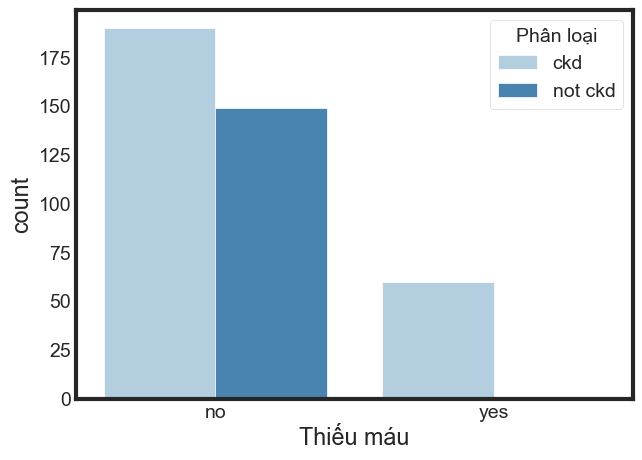

In [29]:
sns.countplot(data=df,x='Thiếu máu',hue='Phân loại',palette = 'Blues');

Ta có thể thấy rằng ở những nhóm không bị thiếu máu thì tỉ lệ không bị mắc CKD cao hơn mất nhiều<br>
So với những nhóm bị mắc thiếu máu <br>
Trong nhóm không bị thiếu máu thì có cả những người không bị mắc và bị mắc CKD <br>
Nhưng những người trong nhóm bị mắc thiếu máu thì gần như không có người nào không bị mắc CKD <br>
---- > Tổng kết : Cột thiếu máu là cột rất quan trọng ảnh hưởng trực tiếp đến Target

Phù chân

In [30]:
df["Phù chân"].value_counts().to_frame()

count
Phù chân       
no          323
yes          76

In [31]:
df["Phù chân"].value_counts(normalize=True).to_frame()*100

proportion
Phù chân            
no         80.952381
yes        19.047619

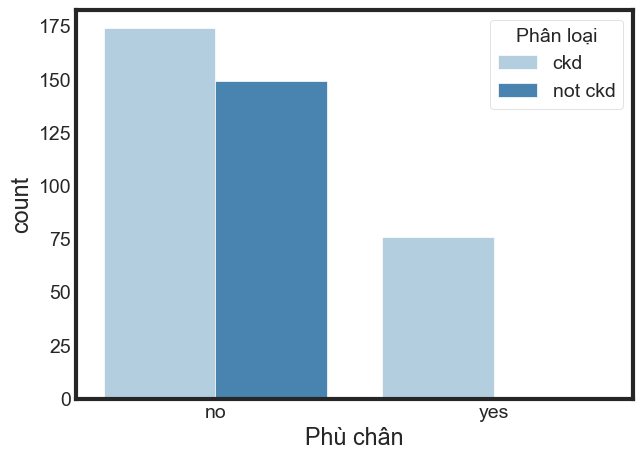

In [32]:
sns.countplot(data=df,x='Phù chân',hue='Phân loại',palette = 'Blues');

Tương tự cột thiếu máu <br>
----- > Đây cũng là đặc trưng quan trọng

Tình trạng ăn uống

In [33]:
df['Tình trạng ăn uống'].value_counts().to_frame()

count
Tình trạng ăn uống       
good                  317
poor                   82

In [34]:
df['Tình trạng ăn uống'].value_counts(normalize=True).to_frame()*100

proportion
Tình trạng ăn uống            
good                 79.448622
poor                 20.551378

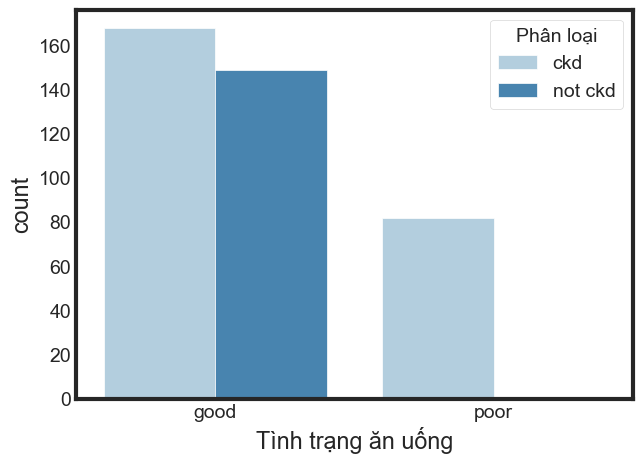

In [35]:
sns.countplot(data=df,x='Tình trạng ăn uống',hue='Phân loại',palette='Blues');

Bệnh động mạch vành

In [36]:
df['Bệnh động mạch vành'].value_counts().to_frame()

count
Bệnh động mạch vành       
no                     364
yes                     34

In [37]:
df['Bệnh động mạch vành'].value_counts(normalize=True).to_frame()*100

proportion
Bệnh động mạch vành            
no                    91.457286
yes                    8.542714

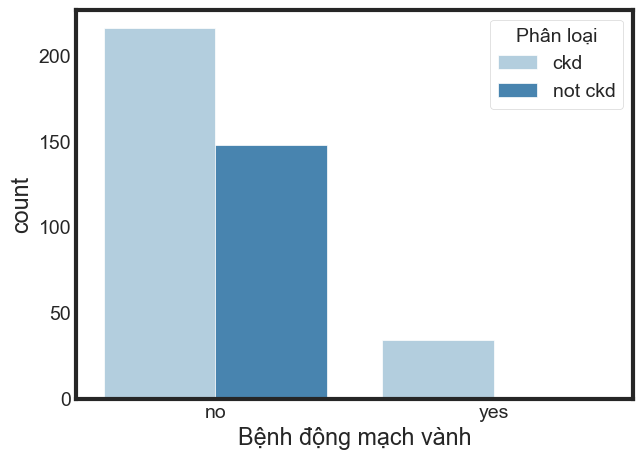

In [38]:
sns.countplot(data=df,x='Bệnh động mạch vành',hue='Phân loại',palette='Blues');

In [39]:
cat_cols

['Tình trạng hồng cầu',
 'Tình trạng bạch cầu mủ',
 'Cụm bạch cầu mủ',
 'Vi khuẩn trong nước tiểu',
 'Tăng huyết áp',
 'Tiểu đường',
 'Bệnh động mạch vành',
 'Tình trạng ăn uống',
 'Phù chân',
 'Thiếu máu',
 'Phân loại']

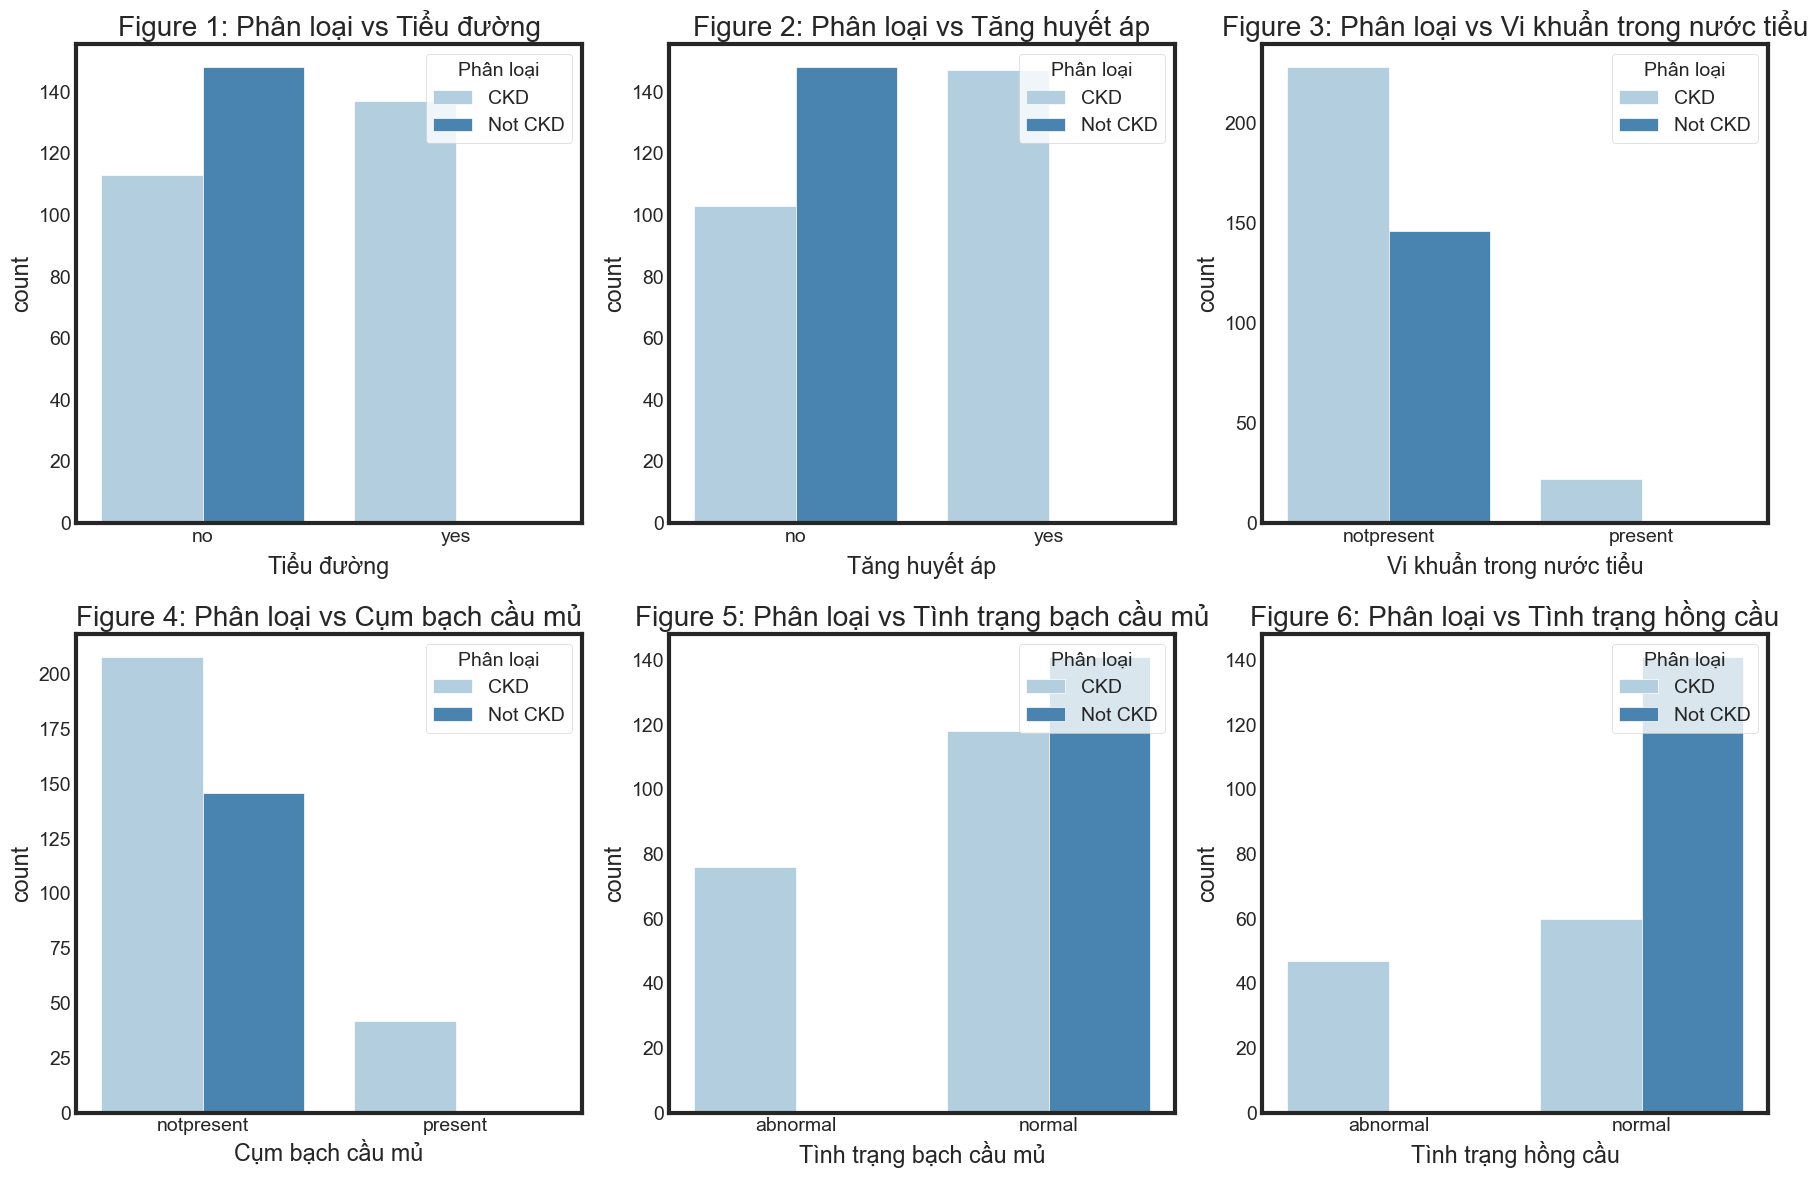

In [40]:
clos = ['Tiểu đường','Tăng huyết áp','Vi khuẩn trong nước tiểu',
        'Cụm bạch cầu mủ','Tình trạng bạch cầu mủ','Tình trạng hồng cầu']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*6))

for r in range(n_rows):
    for c in range(n_cols):

        i = r*n_cols + c   # chuyển từ vị trí subplot sang index của list

        if i < len(clos):   # tránh vượt quá số lượng cột
            ax_i = ax[r, c]

            sns.countplot(data=df, x=clos[i], hue='Phân loại', 
                          palette='Blues', ax=ax_i)

            ax_i.set_title(f"Figure {i+1}: Phân loại vs {clos[i]}")

            ax_i.legend(title='Phân loại', labels=['CKD', 'Not CKD'], loc='upper right')

        else:
            ax[r, c].axis('off')   # tắt subplot trống

plt.tight_layout()
plt.show()

Kết luận: Tất cả các cột phân loại nếu không mắc thì sẽ có trường hợp bị hoắc không bị ckd <br>
Nhưng nếu mắc thì nguy cơ rất cao mắc Ckd

<p style = "color:red;font-size:15px">Để hiểu hơn về biểu đồ tương quan category bên trên ta nhìn vào đây..</p>

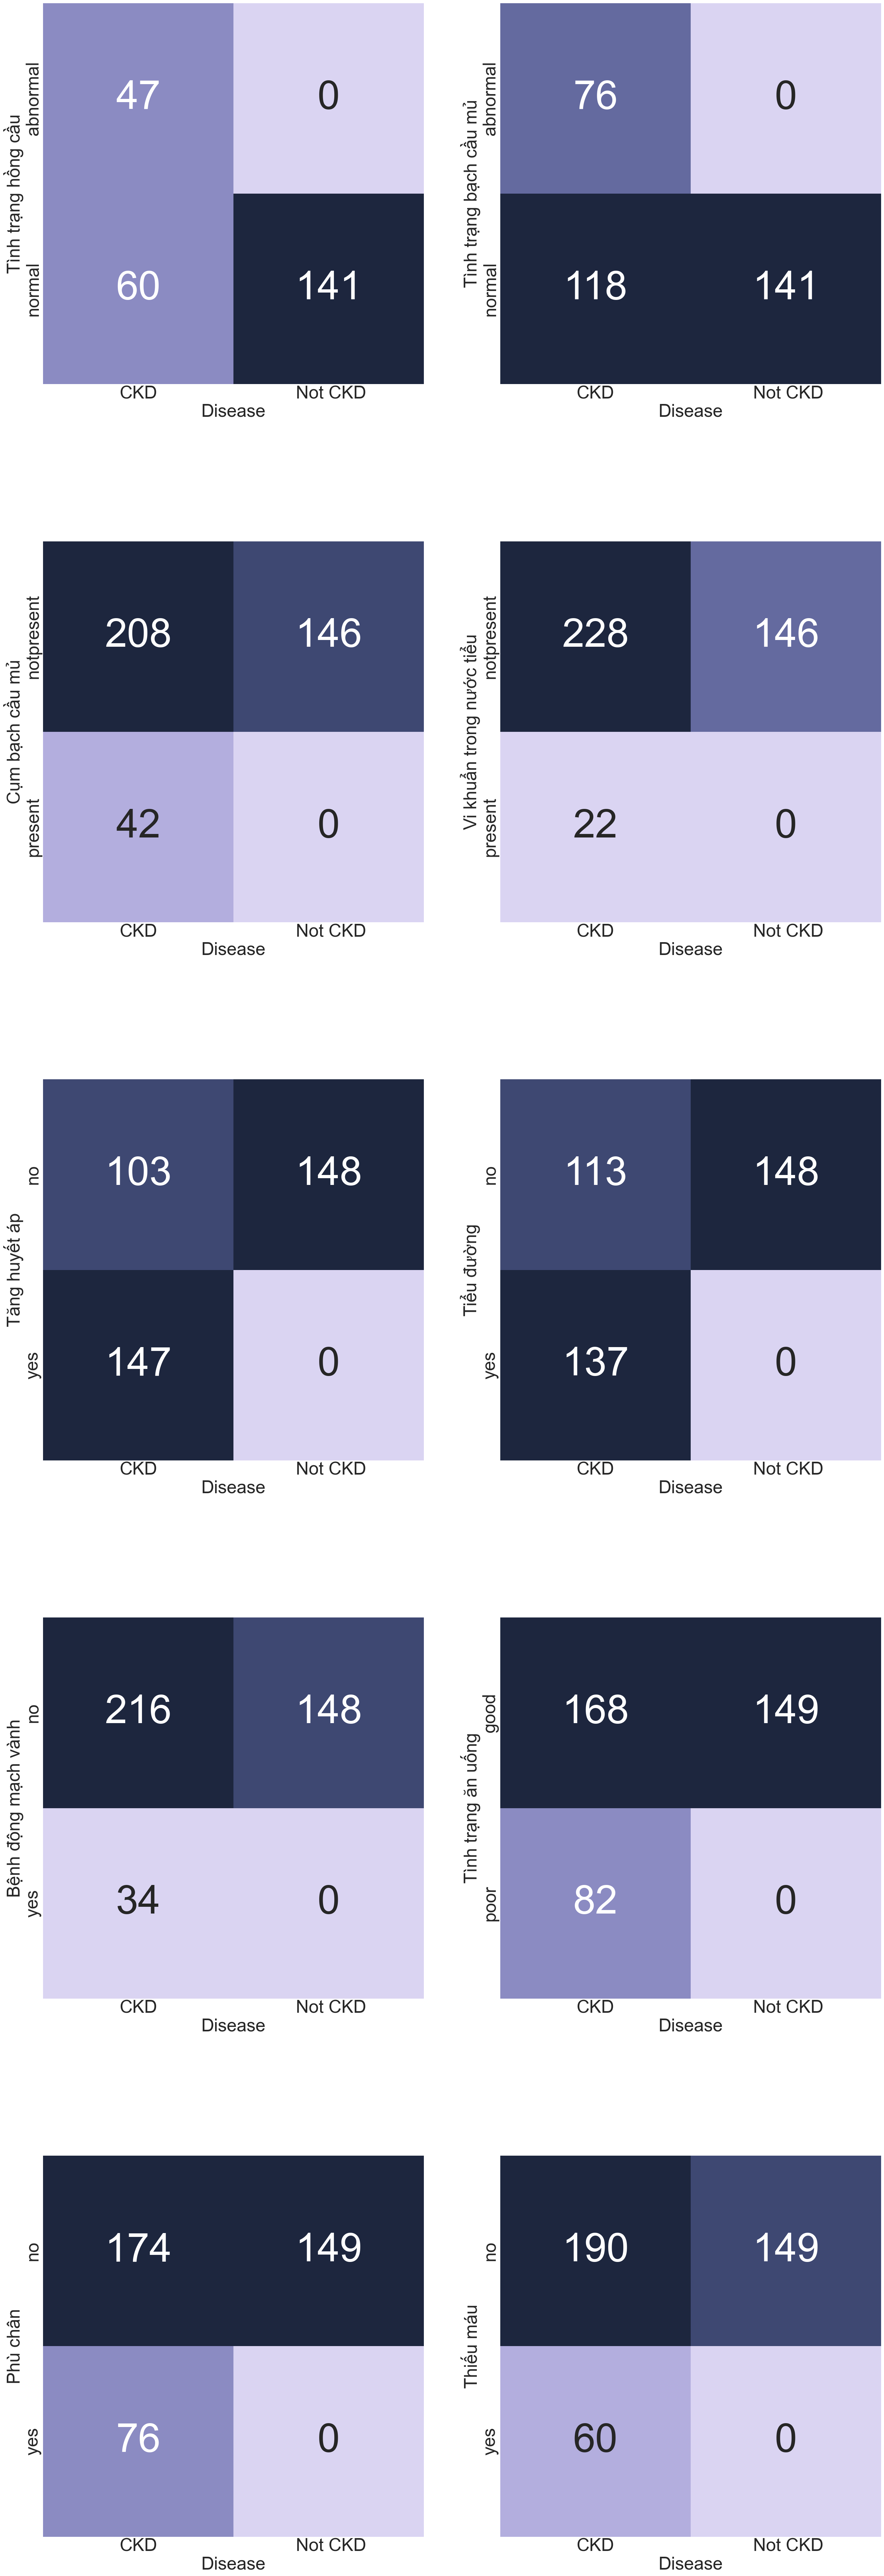

In [41]:
closs = ['Tình trạng hồng cầu','Tình trạng bạch cầu mủ','Cụm bạch cầu mủ','Vi khuẩn trong nước tiểu',
         'Tăng huyết áp','Tiểu đường','Bệnh động mạch vành','Tình trạng ăn uống','Phù chân','Thiếu máu',]
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 100))

for index, column in enumerate(closs):
    
    i,j = (index // n_cols), (index % n_cols)
    
    sns.heatmap(pd.crosstab(df[column],df['Phân loại']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=40)

    axes[i,j].set_ylabel(column,fontsize=40)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=40)
    
    axes[i,j].set_xticklabels(["CKD"," Not CKD"],fontsize=40)

plt.show()

### Tương quan đặc trưng số học với Target

In [42]:
sns.set_style('white')
num_cols

['Tuổi',
 'Huyết Áp',
 'Tỷ trọng nước tiểu',
 'Hàm lượng albumin trong nước tiểu',
 'Mức đường trong nước tiểu',
 'Đường huyết ngẫu nhiên',
 'Ure máu',
 'Creatinine huyết thanh',
 'Natri',
 'kali',
 'Huyết sắc tố',
 'Thể tích hồng cầu đóng gói',
 'Số lượng bạch cầu',
 'Số lượng hồng cầu']

Age

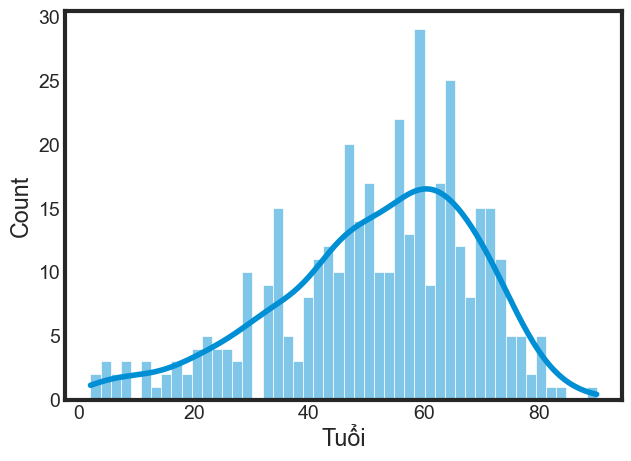

In [43]:
sns.histplot(data=df,x='Tuổi',bins=50,kde=True);

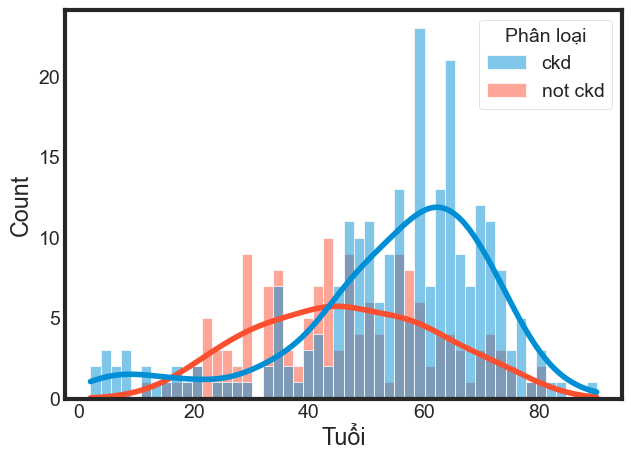

In [44]:
sns.histplot(data=df,x='Tuổi',hue='Phân loại',bins=50,kde=True);

ta thấy rằng phân bố tuổi của nhóm CKD rộng hơn <br><br>
Đường KDE (đường màu xanh) và histogram cho thấy:<br>
Phân phối CKD tập trung mạnh ở 50–70 tuổi<br>
Đỉnh phân phối của CKD nằm khoảng 60 tuổi
Đa số bệnh nhân CKD đều lớn tuổi. Điều này phù hợp với thực tế rằng nguy cơ CKD tăng theo tuổi.<br>

Histogram và đường KDE màu đỏ cho thấy:
Đỉnh phân phối của not CKD nằm khoảng 35–45 tuổi
Phân phối trải đều hơn, ít tập trung vào tuổi cao<br>
Nhóm không mắc CKD thường trẻ hơn so với nhóm mắc CKD.

Vẫn có một số trường hợp CKD ở tuổi 10–20
có thể là CKD bẩm sinh hoặc bệnh lý đặc biệt
Nhưng số lượng rất ít

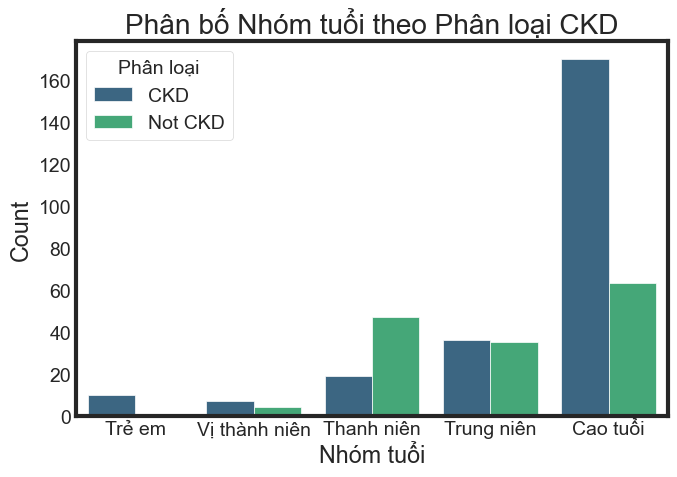

In [45]:
bins = [0, 10, 20, 40, 50, 100]
labels = ['Trẻ em', 'Vị thành niên', 'Thanh niên', 'Trung niên', 'Cao tuổi']

# Tạo Series NHÓM TUỔI tạm (không gán vào df)
nhom_tuoi = pd.cut(df['Tuổi'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(7,5))
sns.countplot(x=nhom_tuoi, hue=df['Phân loại'], palette='viridis')

plt.title("Phân bố Nhóm tuổi theo Phân loại CKD")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Count")
plt.legend(title="Phân loại", labels=["CKD", "Not CKD"])
plt.tight_layout()
plt.show()

In [46]:
df['Tỷ trọng nước tiểu'].describe()

count    353.000000
mean       1.017408
std        0.005717
min        1.005000
25%        1.010000
50%        1.020000
75%        1.020000
max        1.025000
Name: Tỷ trọng nước tiểu, dtype: float64

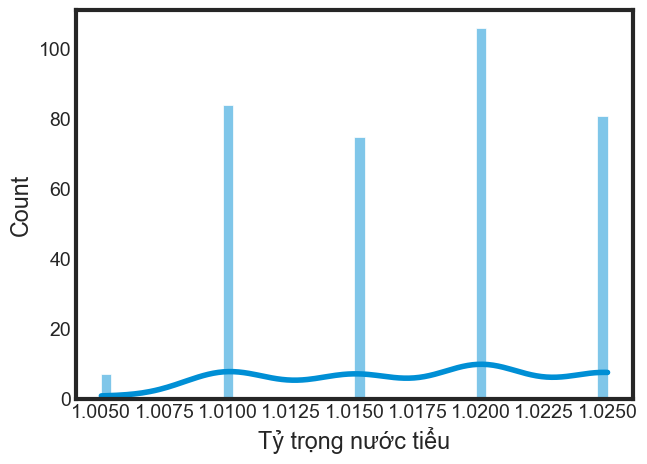

In [47]:
sns.histplot(data=df,x='Tỷ trọng nước tiểu',bins=50,kde=True);

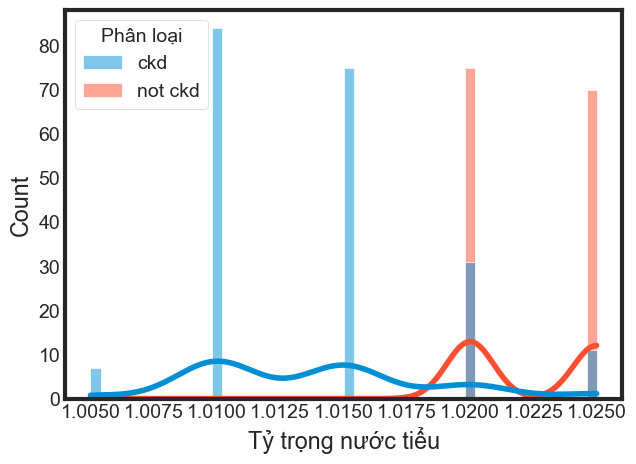

In [48]:
sns.histplot(data=df,x='Tỷ trọng nước tiểu',hue='Phân loại',bins=50,kde=True);

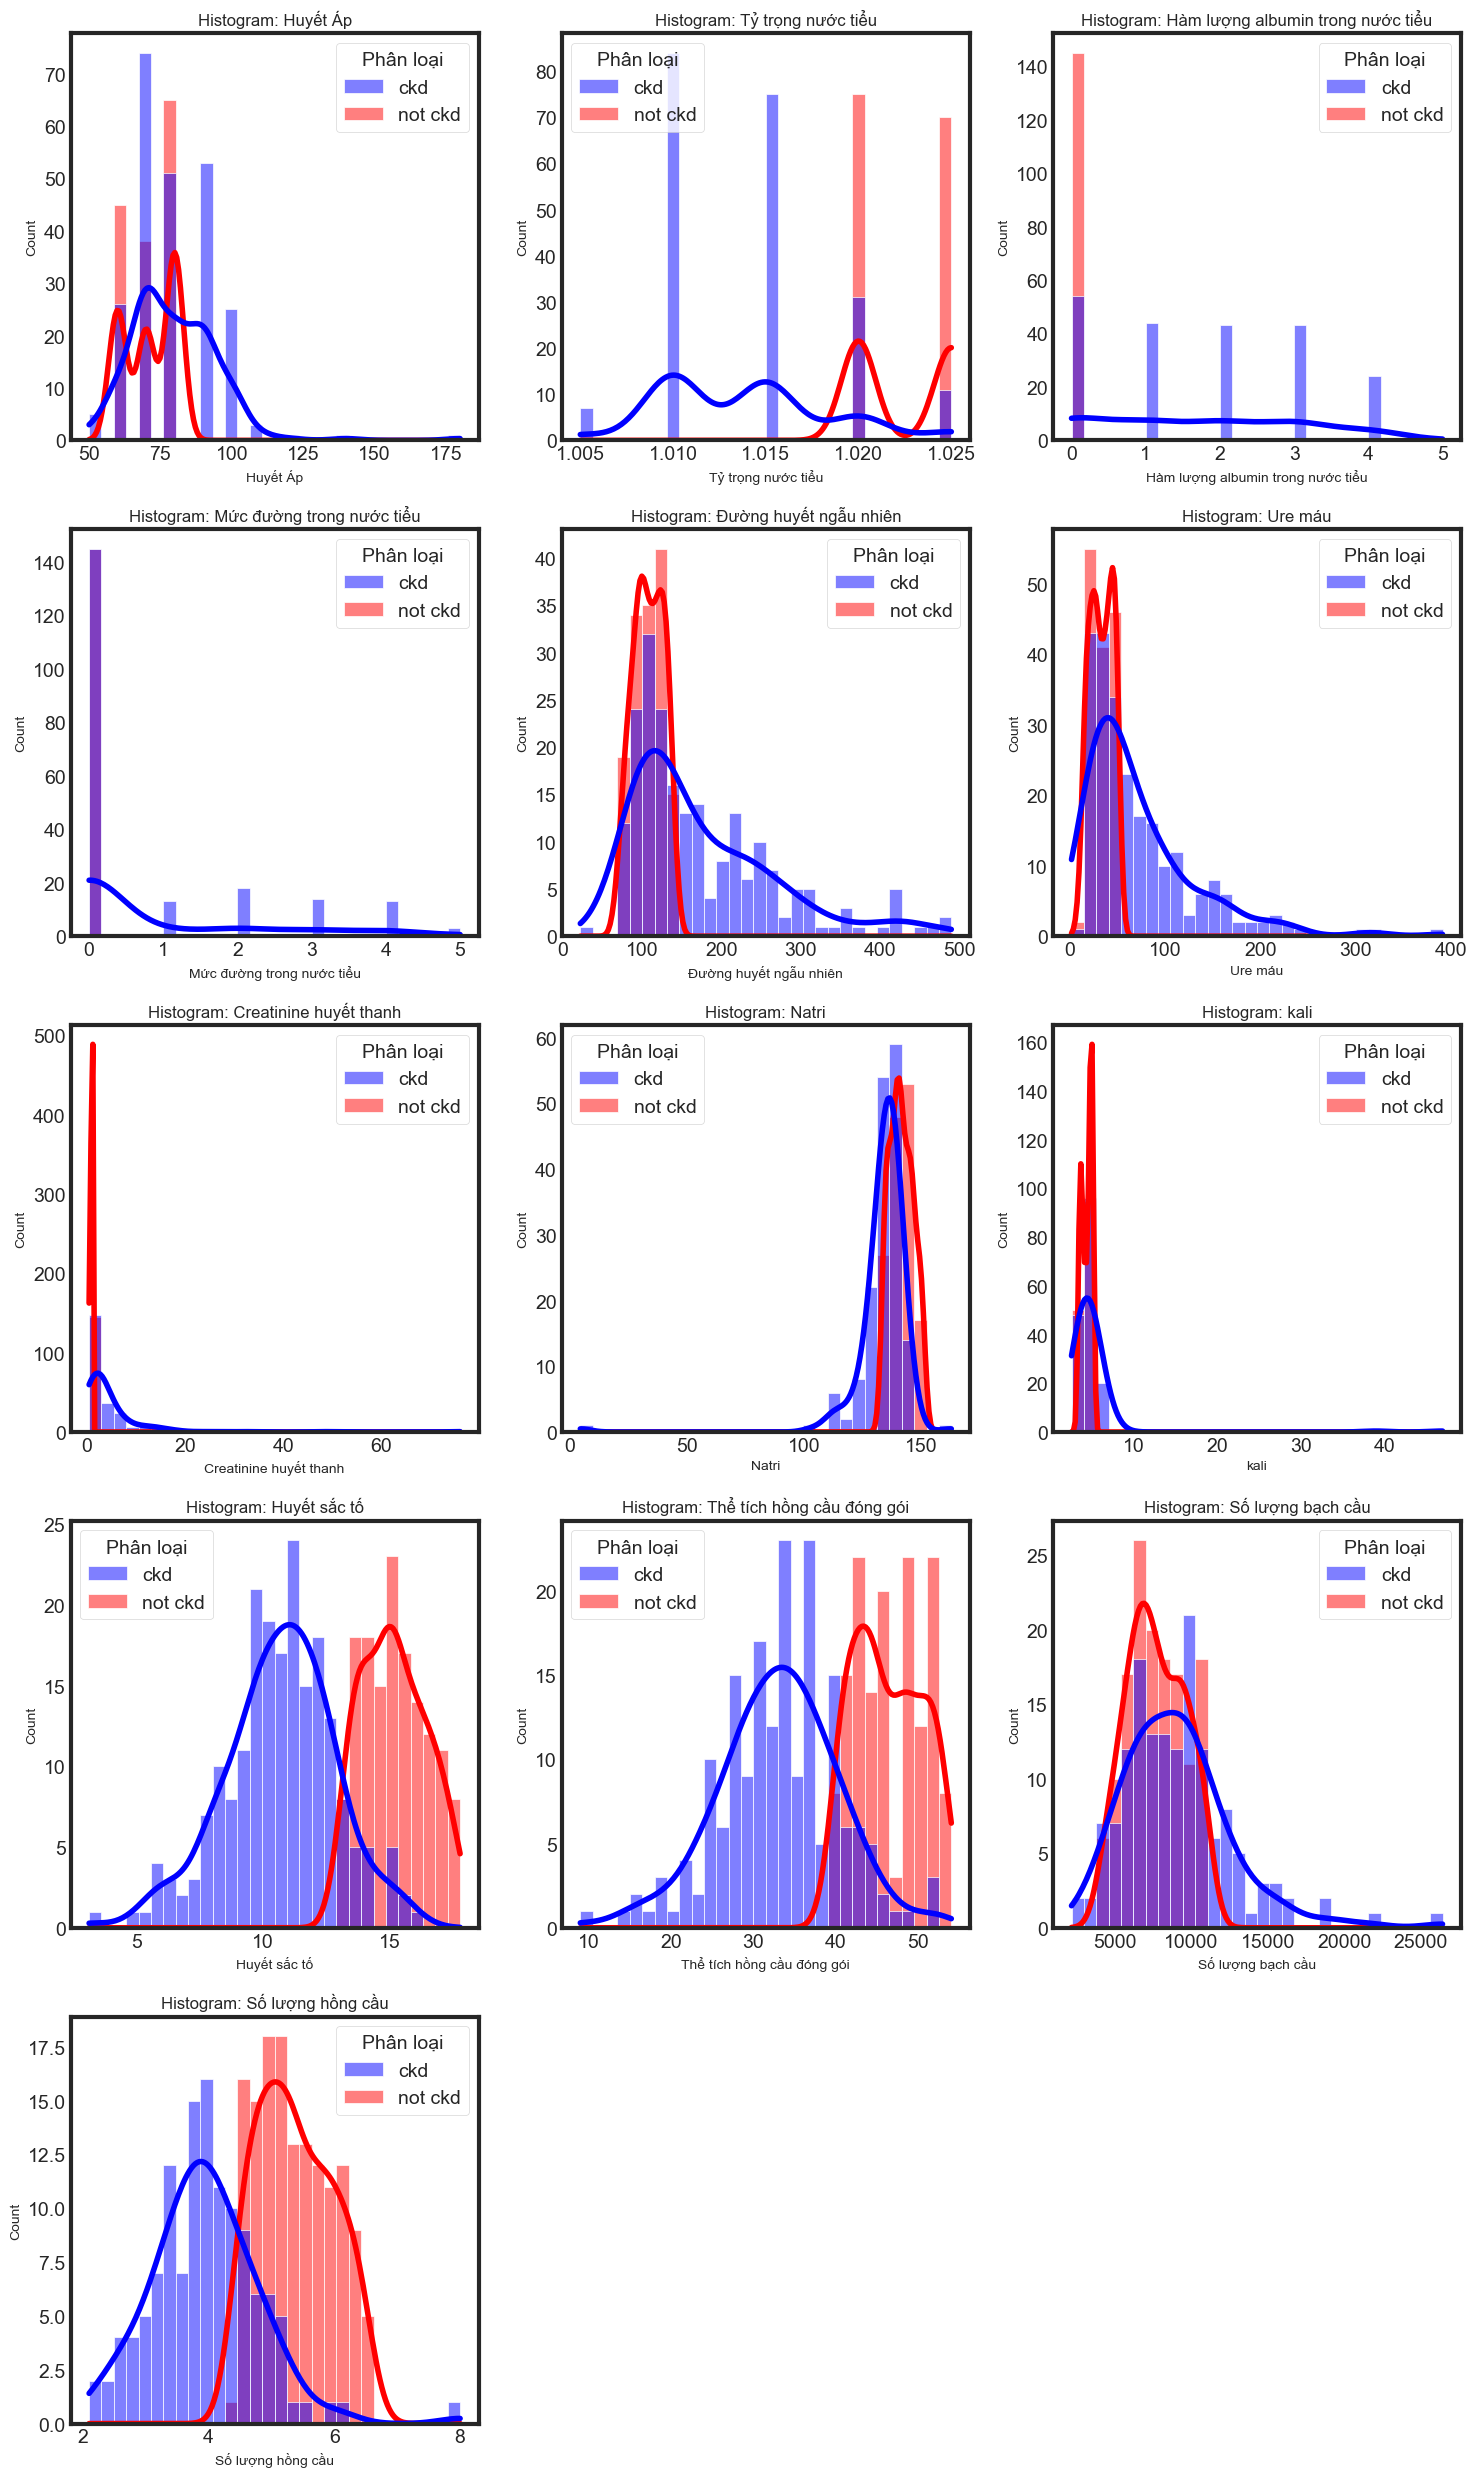

In [49]:
# Màu cố định cho từng nhãn
palette_custom = {
    'ckd': 'blue',
    'not ckd': 'red'
}

cols_numeric = [
    'Huyết Áp',
    'Tỷ trọng nước tiểu',
    'Hàm lượng albumin trong nước tiểu',
    'Mức đường trong nước tiểu',
    'Đường huyết ngẫu nhiên',
    'Ure máu',
    'Creatinine huyết thanh',
    'Natri',
    'kali',
    'Huyết sắc tố',
    'Thể tích hồng cầu đóng gói',
    'Số lượng bạch cầu',
    'Số lượng hồng cầu'
]

n_rows = 5
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

for r in range(n_rows):
    for c in range(n_cols):
        
        idx = r*n_cols + c
        
        if idx < len(cols_numeric):
            col = cols_numeric[idx]
            ax_i = ax[r, c]

            sns.histplot(
                data=df,
                x=col,
                hue='Phân loại',
                kde=True,
                bins=30,
                ax=ax_i,
                palette=palette_custom
            )

            ax_i.set_title(f"Histogram: {col}", fontsize=12)
            ax_i.set_xlabel(col, fontsize=10)
            ax_i.set_ylabel("Count", fontsize=10)
        
        else:
            ax[r, c].axis('off')

plt.tight_layout()
plt.show()

In [50]:
# Tỷ trọng nước tiểu
bins = [0, 1.010, 1.020, 1.030, 2.000]
labels = [
    'Rất thấp (<1.010)',
    'Thấp (1.010–1.020)',
    'Bình thường (1.020–1.030)',
    'Cao (>1.030)'
]

Nhóm_tỷ_trọng = pd.cut(df['Tỷ trọng nước tiểu'], bins=bins, labels=labels, right=True)

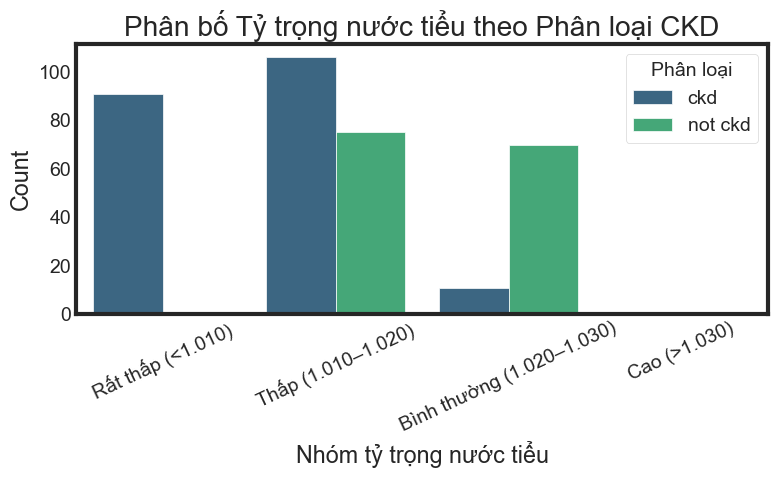

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x=Nhóm_tỷ_trọng, hue=df['Phân loại'], palette='viridis')

plt.xticks(rotation=25)
plt.xlabel("Nhóm tỷ trọng nước tiểu")
plt.ylabel("Count")
plt.title("Phân bố Tỷ trọng nước tiểu theo Phân loại CKD")
plt.tight_layout()
plt.show()


In [52]:
# Hàm lượng albumin( protein ) trong nước tiểu
bins = [-1, 0, 1, 3, 5]
labels = [
    'Không có albumin(Protein)(0)',
    'Có thể bị nhiễm tạm thời(1)',
    'Khả năng cao(2-3)',
    'Thận tổn thương nặng(4-5)'
]
Nhóm_albumin= pd.cut(df['Hàm lượng albumin trong nước tiểu'], bins=bins, labels=labels)

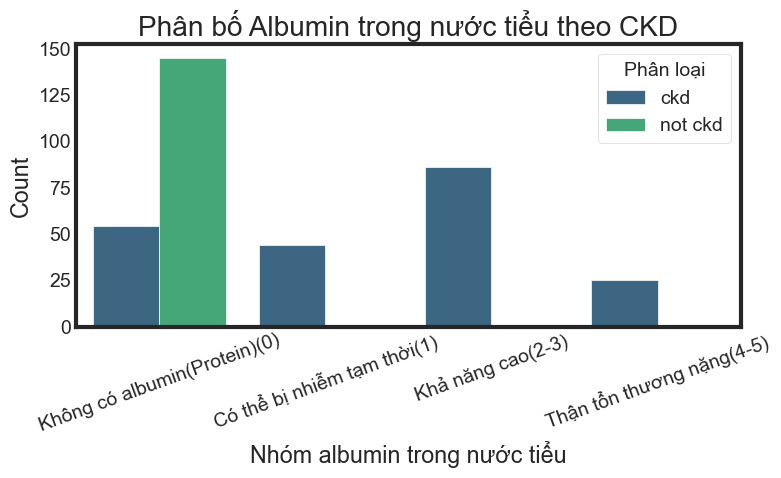

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x=Nhóm_albumin, hue=df['Phân loại'], palette='viridis')

plt.xticks(rotation=20)
plt.xlabel("Nhóm albumin trong nước tiểu")
plt.ylabel("Count")
plt.title("Phân bố Albumin trong nước tiểu theo CKD")
plt.tight_layout()
plt.show()


In [54]:
# Mức đường trong nước tiểu
bins = [-1, 0, 1, 3, 5]
labels = [
    'Không có đường (0)',
    'Dấu vết (1)',
    'Tăng nhẹ (2–3)',
    'Tăng nhiều (4–5)'
]

Nhóm_đường_niệu= pd.cut(df['Mức đường trong nước tiểu'], bins=bins, labels=labels)


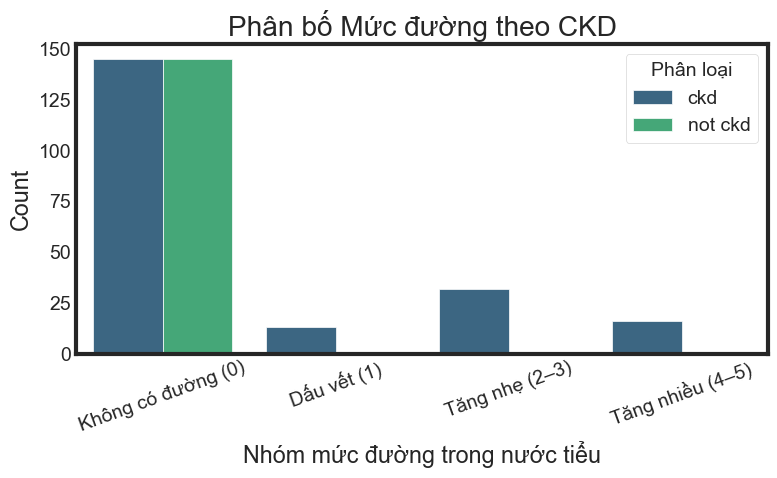

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x=Nhóm_đường_niệu, hue=df['Phân loại'], palette='viridis')

plt.xticks(rotation=20)
plt.xlabel("Nhóm mức đường trong nước tiểu")
plt.ylabel("Count")
plt.title("Phân bố Mức đường theo CKD")
plt.tight_layout()
plt.show()


In [56]:
# Đường huyết ngẫu nhiên
bins = [0, 140, 200, 1000]
labels = [
    'Bình thường (<140)',
    'Tiền tiểu đường (140–199)',
    'Nghi ngờ tiểu đường (≥200)'
]

Nhóm_đường_huyết_ngẫu_nhiên= pd.cut(df['Đường huyết ngẫu nhiên'], 
                                           bins=bins, 
                                           labels=labels, 
                                           right=False)


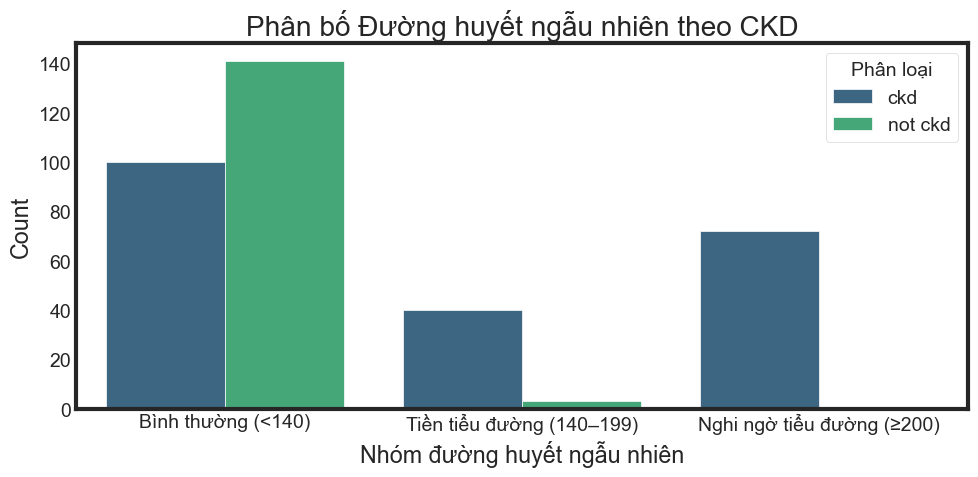

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x=Nhóm_đường_huyết_ngẫu_nhiên, hue=df['Phân loại'], palette='viridis')
plt.title("Phân bố Đường huyết ngẫu nhiên theo CKD")
plt.xlabel("Nhóm đường huyết ngẫu nhiên")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [58]:
# Ure máu
bins = [0, 20, 40, 80, 1000]
labels = [
    'Bình thường (≤20)',
    'Tăng nhẹ (20–40)',
    'Tăng vừa (40–80)',
    'Tăng rất cao (>80)'
]

Nhóm_ure_mau= pd.cut(df['Ure máu'], bins=bins, labels=labels, right=False)


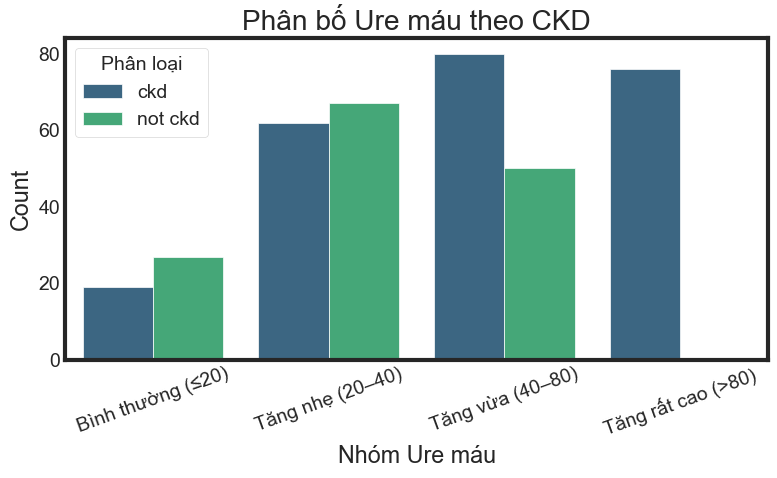

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(
              x=Nhóm_ure_mau, 
              hue=df['Phân loại'], 
              palette='viridis')

plt.title("Phân bố Ure máu theo CKD")
plt.xlabel("Nhóm Ure máu")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [60]:
bins = [0, 1.2, 2.0, 5.0, 100]
labels = [
    'Bình thường (≤1.2)',
    'Tăng nhẹ (1.2–2.0)',
    'Tăng vừa (2.0–5.0)',
    'Tăng nặng (>5.0)'
]

Nhóm_creatinine = pd.cut(df['Creatinine huyết thanh'], 
                               bins=bins, 
                               labels=labels, 
                               right=False)


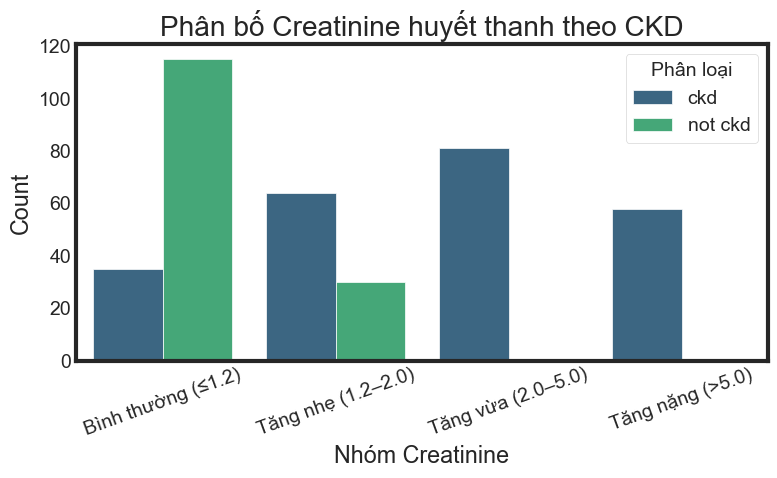

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(
    
    x=Nhóm_creatinine,
    hue=df['Phân loại'],
    palette='viridis'
)

plt.xticks(rotation=20)
plt.title("Phân bố Creatinine huyết thanh theo CKD")
plt.xlabel("Nhóm Creatinine")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [62]:
# Natri 
bins_na = [0, 135, 145, 200]
labels_na = [
    'Hạ natri (<135)',
    'Bình thường (135–145)',
    'Tăng natri (>145)'
]

Nhóm_natri = pd.cut(df['Natri'], bins=bins_na, labels=labels_na, right=False)


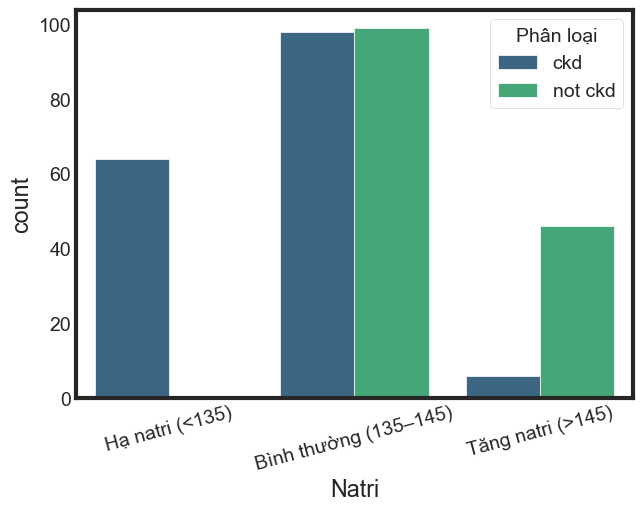

In [63]:
sns.countplot(x=Nhóm_natri, hue=df['Phân loại'], palette='viridis')
plt.xticks(rotation=15)
plt.show()


In [64]:
# Kali
bins_k = [0, 3.5, 5.0, 6.0, 20]
labels_k = [
    'Hạ kali (<3.5)',
    'Bình thường (3.5–5.0)',
    'Tăng nhẹ (5.0–6.0)',
    'Tăng nặng (>6.0)'
]

Nhóm_kali = pd.cut(df['kali'], bins=bins_k, labels=labels_k, right=False)


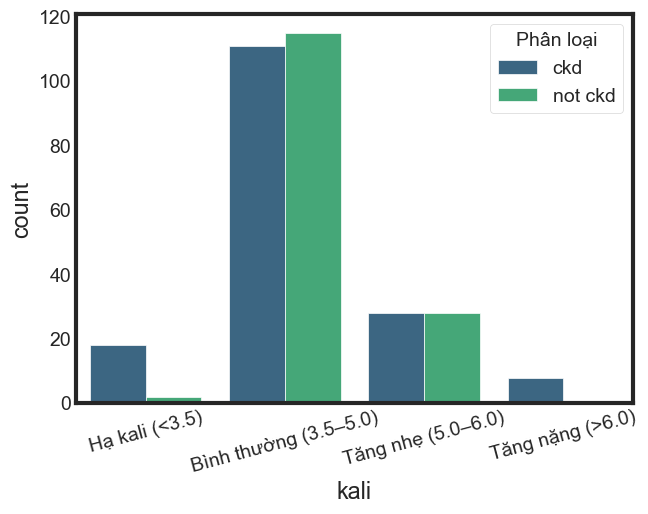

In [65]:
sns.countplot(x=Nhóm_kali, hue=df['Phân loại'], palette='viridis')
plt.xticks(rotation=15)
plt.show()

In [66]:
# Huyết sắc tô
bins_hb = [0, 8, 10, 12, 16, 30]
labels_hb = [
    'Thiếu máu nặng (<8)',
    'Thiếu máu vừa (8–10)',
    'Thiếu máu nhẹ (10–12)',
    'Bình thường (12–16)',
    'Hb cao (>16)'
]

Nhóm_huyet_sac_to = pd.cut(df['Huyết sắc tố'], 
                                 bins=bins_hb, 
                                 labels=labels_hb, 
                                 right=False)


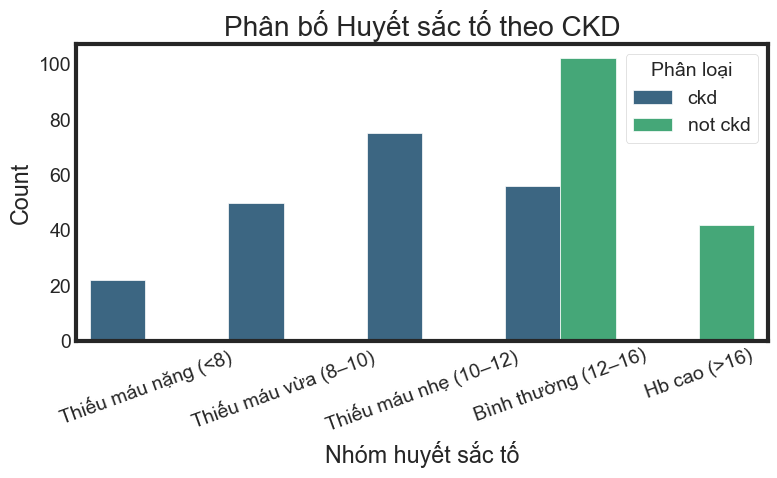

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(x=Nhóm_huyet_sac_to, hue=df['Phân loại'], palette='viridis')

plt.xticks(rotation=20)
plt.xlabel("Nhóm huyết sắc tố")
plt.ylabel("Count")
plt.title("Phân bố Huyết sắc tố theo CKD")
plt.tight_layout()
plt.show()


In [68]:
# Thể tích hồng cầu đóng gói
bins_pcv = [0, 21, 30, 36, 48, 80]
labels_pcv = [
    'Thiếu máu nặng (<21)',
    'Thiếu máu vừa (21–30)',
    'Thiếu máu nhẹ (30–36)',
    'Bình thường (36–48)',
    'hồng cầu cao (>48)'
]

Nhóm_pcv = pd.cut(df['Thể tích hồng cầu đóng gói'], 
                        bins=bins_pcv, 
                        labels=labels_pcv, 
                        right=False)


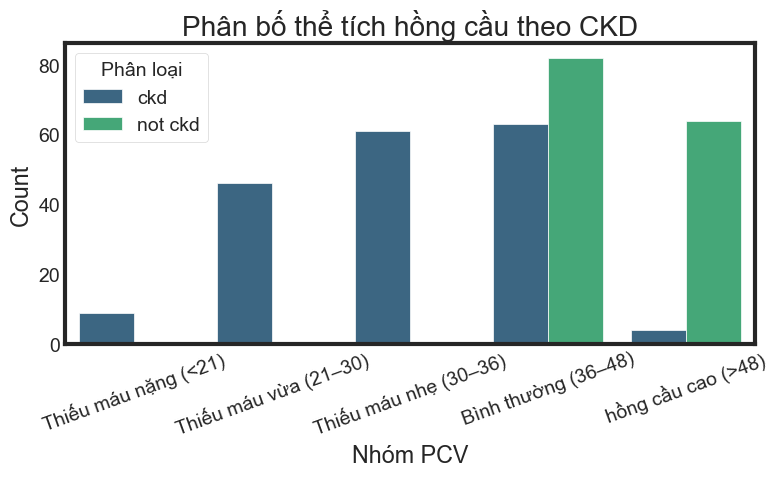

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(
              x=Nhóm_pcv, 
              hue=df['Phân loại'], 
              palette='viridis')

plt.xticks(rotation=20)
plt.xlabel("Nhóm PCV")
plt.ylabel("Count")
plt.title("Phân bố thể tích hồng cầu theo CKD")
plt.tight_layout()
plt.show()


In [70]:
# Số lượng hồng cầu
bins_wbc = [0, 4000, 10000, 15000, 999999]
labels_wbc = [
    'Giảm bạch cầu (<4000)',
    'Bình thường (4000–10000)',
    'Tăng nhẹ (10000–15000)',
    'Tăng cao (>15000)'
]

Nhóm_bạch_cầu = pd.cut(df['Số lượng bạch cầu'], 
                             bins=bins_wbc, 
                             labels=labels_wbc,
                             right=False)


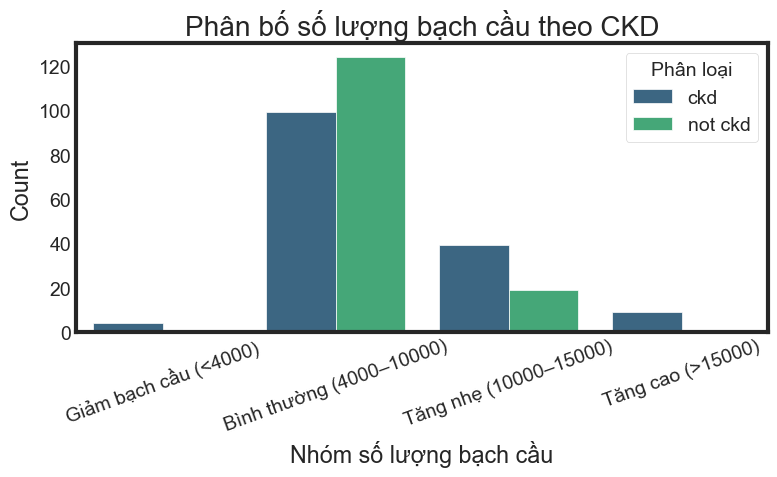

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(
              x=Nhóm_bạch_cầu,
              hue=df['Phân loại'],
              palette='viridis')

plt.xticks(rotation=20)
plt.xlabel("Nhóm số lượng bạch cầu")
plt.ylabel("Count")
plt.title("Phân bố số lượng bạch cầu theo CKD")
plt.tight_layout()
plt.show()


<p style="font-size: 24px;">Tương quan giữa các đặc trưng</p>

In [72]:
import plotly.express as px

In [73]:
# Tương quan giữa huyết sác tố và thể tích hồng cầu đóng gói
fig = px.scatter(
    df,
    x="Huyết sắc tố",
    y="Thể tích hồng cầu đóng gói",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

<p style = "font-size:15px">Ta thấy được mối tương quan tuyến tính giữa thể tính hồng cầu đóng gói<br>
Và Huyết sắc tố, nếu huyết sắc tố cao và thể tích hồng cầu đóng gói cao thì nguy cơ mắc bệnh sẽ thấp</p>

In [74]:
# Tương quan giữa thể tích hồng cầu đóng gói và sô lượng hồng cầu
fig = px.scatter(
    df,
    x="Số lượng hồng cầu",
    y="Thể tích hồng cầu đóng gói",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

<p style = "font-size:15px">Cũng như trên hai đặc trưng này đều có quan hệ tuyến tính <br>
Có vài điểm outlier<br>
Đối với những người có số lượng hồng cầu thấp kéo theo đó sẽ có thể tích hồng cầu đóng gói thấp <br>
Khi thể tích hồng cầu đóng gói thấp thì cái huyết sắc tố cũng bị ảnh hưởng dẫn đến khả năng mắc thận mãn tính cao hơn</p>

In [75]:
# Tương quan giữa hàm lượng albumin trong nước tiểu và số lượng hồng cầu
fig = px.scatter(
    df,
    x="Số lượng hồng cầu",
    y="Hàm lượng albumin trong nước tiểu",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

<p style = "font-size:15px">Hai feature này không có cấu trúc tuyến tính.<br>
Và đều giống vởi biểu đồ phân phối hist ở trên</p>

In [76]:
# Tương quan giữa Đường huyết ngẫu nhiên và Mức đường trong nước tiểu
fig = px.scatter(
    df,
    x="Mức đường trong nước tiểu",
    y="Đường huyết ngẫu nhiên",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [77]:
# Tương quan giữa Thể tích hồng cầu đóng gói và Ure máu
fig = px.scatter(
    df,
    x="Thể tích hồng cầu đóng gói",
    y="Ure máu",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

<p style = "font-size:15px">Hai feature này khá đặc biệt nó có cấu trúc tuyến tính ngược<br>
Ta có thể nhận xét rằng : Khi 1 trong 2 cao thì cái kia sẽ thấp và nếu Thể tính hồng cầu đóng gói cao<br>
Thì nó sẽ kéo theo Ure máu thấp và nguy cơ mắc bệnh sẽ thấp và ngược lại</p>

In [78]:
# Tương quan giữa hàm lượng albumin trong nước tiểu và Mức đường trong nước tiểu
fig = px.scatter(
    df,
    x="Hàm lượng albumin trong nước tiểu",
    y="Mức đường trong nước tiểu",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [79]:
# Tuổi và Huyết áp
fig = px.scatter(
    df,
    x="Tuổi",
    y="Huyết Áp",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [80]:
# Ure máu và reatinine huyết thanh
fig = px.scatter(
    df,
    x="Ure máu",
    y="Creatinine huyết thanh",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [81]:
# Kali và Creatinine huyết thanh
fig = px.scatter(
    df,
    x="kali",
    y="Creatinine huyết thanh",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [82]:
# Kali và natri
fig = px.scatter(
    df,
    x="kali",
    y="Natri",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [83]:
# Huyết sắc tố và số lượng hồng cầu
fig = px.scatter(
    df,
    x="Huyết sắc tố",
    y="Số lượng hồng cầu",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [84]:
# Huyết sắc tố và creatinine huyết thanh
fig = px.scatter(
    df,
    x="Huyết sắc tố",
    y="Creatinine huyết thanh",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [85]:
# Huyết sắc tố và creatinine huyết thanh
fig = px.scatter(
    df,
    x="Hàm lượng albumin trong nước tiểu",
    y="Đường huyết ngẫu nhiên",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

In [86]:
fig = px.scatter(
    df,
    x="Huyết Áp",
    y="Creatinine huyết thanh",
    color="Phân loại",
    template = 'plotly_dark',  
    color_discrete_map={
        "ckd": "yellow",
        "notckd": "blue"
    }
)

fig.show()

<p style="color: green; font-size: 24px;text-align: center;">Data Pre Processing</p>

<p style = "color:red">DỰ ĐOÁN SỚM BỆNH TRƯỚC KHI TRIỆU CHỨNG RÕ RÀNG VỚI CẮT KĨ THUẬT CẮT BỚT FEATURE</p><br>
Chuẩn bị cho việc tiền xử lý

In [87]:
# Chia X và Y 
ind_col = ['Tuổi',
'Huyết Áp',
'Tỷ trọng nước tiểu',
'Hàm lượng albumin trong nước tiểu',
'Mức đường trong nước tiểu',
'Tình trạng hồng cầu',
'Tình trạng bạch cầu mủ',
'Tăng huyết áp',
'Tiểu đường',
'Tình trạng ăn uống']
dep_col = 'Phân loại'

X = df[ind_col]
y = df[dep_col]

In [88]:
cat_cols = ['Tình trạng hồng cầu',
'Tình trạng bạch cầu mủ',
'Tăng huyết áp',
'Tiểu đường',
'Tình trạng ăn uống']

In [89]:
num_cols = ['Tuổi',
'Huyết Áp',
'Tỷ trọng nước tiểu',
'Hàm lượng albumin trong nước tiểu',
'Mức đường trong nước tiểu']

In [90]:
# Chia train và test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42,stratify=y)

In [91]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_scaled = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="if_binary", handle_unknown="ignore"))
])

preprocess_scaled = ColumnTransformer([
    ("num", numeric_scaled, num_cols),
    ("cat", categorical, cat_cols)
])

preprocess_tree = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", categorical, cat_cols)
])
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models = {
    "Logistic": Pipeline([
        ("preprocess", preprocess_scaled),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "KNN": Pipeline([
        ("preprocess", preprocess_scaled),
        ("model", KNeighborsClassifier(n_neighbors=5, weights="distance"))
    ]),

    "Decision Tree": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", DecisionTreeClassifier(
            max_depth=4,
            min_samples_leaf=10,
            random_state=42
        ))
    ]),

    "Random Forest": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", RandomForestClassifier(
            n_estimators=200,
            max_depth=5,
            min_samples_leaf=10,
            random_state=42
        ))
    ])
}
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
for model_name, pipeline in models.items():
    print(f"{model_name.upper()}")

    train_accs, val_accs, aucs = [], [], []
    fold = 1

    for train_idx, val_idx in cv.split(X_train, y_train):
        print(f"Fold {fold}")

        X_tr = X_train.iloc[train_idx]
        X_val = X_train.iloc[val_idx]
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]

        # Train
        pipeline.fit(X_tr, y_tr)

        # Predict
        y_tr_pred = pipeline.predict(X_tr)
        y_val_pred = pipeline.predict(X_val)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1]

        # Metrics
        train_acc = accuracy_score(y_tr, y_tr_pred)
        val_acc = accuracy_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_proba)

        train_accs.append(train_acc)
        val_accs.append(val_acc)
        aucs.append(auc)

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Validation AUC: {auc:.4f}")
        print("Confusion Matrix (Validation):")
        print(confusion_matrix(y_val, y_val_pred))
        print()

        fold += 1

    # Summary
    print(f"{model_name} K-FOLD SUMMARY")
    print(f"Mean Train Accuracy: {np.mean(train_accs):.4f}")
    print(f"Mean Validation Accuracy: {np.mean(val_accs):.4f}")
    print(f"Mean AUC: {np.mean(aucs):.4f}")
    print(f"Std AUC: {np.std(aucs):.4f}")
best_model = models["Logistic"]   # ví dụ
best_model.fit(X_train, y_train)

LOGISTIC
Fold 1
Train Accuracy: 0.9844
Validation Accuracy: 0.9844
Validation AUC: 0.9896
Confusion Matrix (Validation):
[[39  1]
 [ 0 24]]

Fold 2
Train Accuracy: 0.9883
Validation Accuracy: 0.9844
Validation AUC: 0.9958
Confusion Matrix (Validation):
[[39  1]
 [ 0 24]]

Fold 3
Train Accuracy: 0.9844
Validation Accuracy: 0.9531
Validation AUC: 0.9917
Confusion Matrix (Validation):
[[37  3]
 [ 0 24]]

Fold 4
Train Accuracy: 0.9844
Validation Accuracy: 0.9844
Validation AUC: 0.9958
Confusion Matrix (Validation):
[[39  1]
 [ 0 24]]

Fold 5
Train Accuracy: 0.9844
Validation Accuracy: 0.9688
Validation AUC: 1.0000
Confusion Matrix (Validation):
[[38  2]
 [ 0 24]]

Logistic K-FOLD SUMMARY
Mean Train Accuracy: 0.9852
Mean Validation Accuracy: 0.9750
Mean AUC: 0.9946
Std AUC: 0.0036
KNN
Fold 1
Train Accuracy: 0.9961
Validation Accuracy: 0.9844
Validation AUC: 0.9859
Confusion Matrix (Validation):
[[39  1]
 [ 0 24]]

Fold 2
Train Accuracy: 1.0000
Validation Accuracy: 0.9219
Validation AUC: 0.9

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tuổi', 'Huyết Áp',
                                                   'Tỷ trọng nước tiểu',
                                                   'Hàm lượng albumin trong '
                                                   'nước tiểu',
                                                   'Mức đường trong nước '
                                                   'tiểu']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Tình trạng hồng cầu',
                                                   'Tình trạng bạch cầu mủ',
                                                   'Tăng huyết áp',
                                                   'Tiểu đường',
                                                   'Tình trạng ăn uống'])])),
                ('model', LogisticRegression(max_iter=1000))])

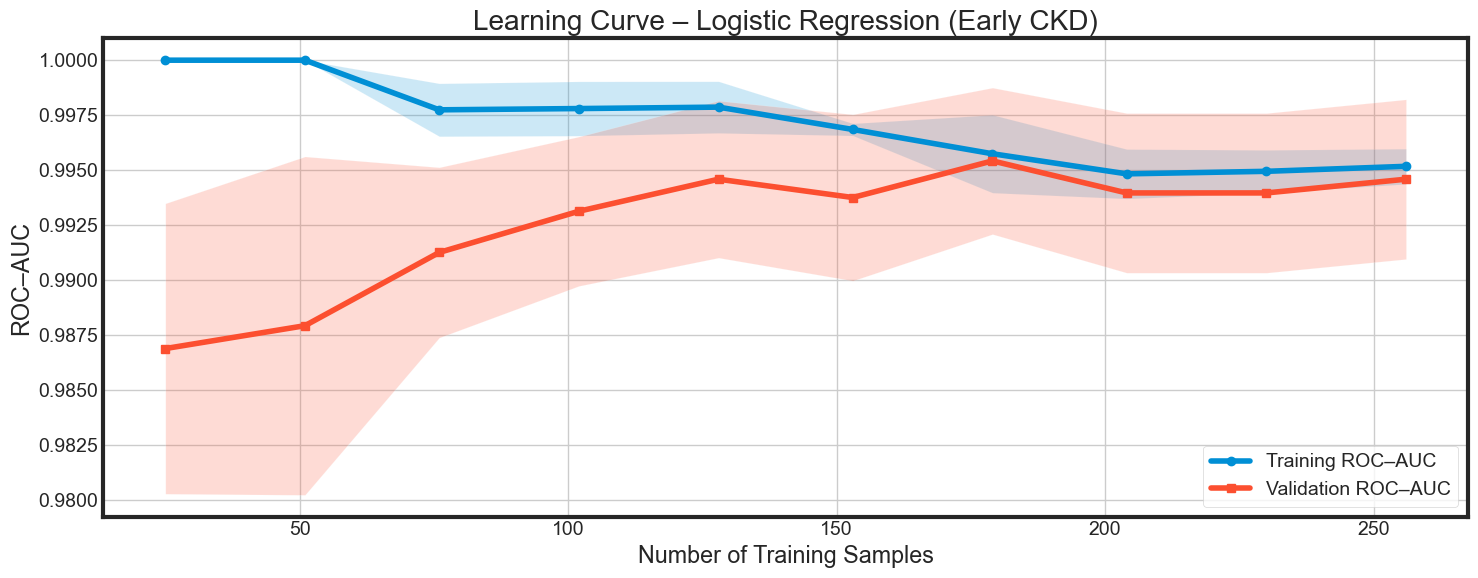

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
pipe_logistic = models["Logistic"]
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipe_logistic,
    X=X_train,
    y=y_train,
    cv=cv,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

val_mean = np.mean(val_scores, axis=1)
val_std  = np.std(val_scores, axis=1)
plt.figure(figsize=(15, 6))

plt.plot(train_sizes, train_mean, marker='o', label="Training ROC–AUC")
plt.plot(train_sizes, val_mean, marker='s', label="Validation ROC–AUC")

plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)

plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.2
)

plt.xlabel("Number of Training Samples")
plt.ylabel("ROC–AUC")
plt.title("Learning Curve – Logistic Regression (Early CKD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
# Xử lý missing với các cột numeric cho X_Train và X_Test
from sklearn.impute import SimpleImputer
num_cols = ['Tuổi',
'Huyết Áp',
'Tỷ trọng nước tiểu',
'Hàm lượng albumin trong nước tiểu',
'Mức đường trong nước tiểu',]
num_imputer = SimpleImputer(strategy='median')

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols]  = num_imputer.transform(X_test[num_cols])

In [94]:
# Xử lý missing cho các cột Catgory cho X_Train và X_Test
cat_cols = ['Tình trạng hồng cầu',
'Tình trạng bạch cầu mủ',
'Tăng huyết áp',
'Tiểu đường',
'Tình trạng ăn uống']
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols]  = cat_imputer.transform(X_test[cat_cols])

In [95]:
# Mã hóa các cột category 
from sklearn.preprocessing import LabelEncoder
import joblib

encoders = {}

# Encode categorical columns
for col in cat_cols:
    le = LabelEncoder()
    
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])
    
    encoders[col] = le

# Encode target (chỉ cần fit trên y_train)
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_test  = target_encoder.transform(y_test)

encoders['Phân loại'] = target_encoder

In [96]:
cols_to_scale = [
'Tuổi',
'Huyết Áp',
'Tỷ trọng nước tiểu',
'Hàm lượng albumin trong nước tiểu',
'Mức đường trong nước tiểu',
]

In [97]:
# Chuẩn hóa dữ liệu để chuẩn bị cho Train model
from sklearn.preprocessing import MinMaxScaler

# 1. Khởi tạo scaler
scaler = MinMaxScaler()

# 2. Fit scaler trên TẬP TRAIN
scaler.fit(X_train[cols_to_scale])

# 3. Tạo bản sao dữ liệu để tránh ghi đè lên gốc
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

# 4. Transform các cột cần scale bằng scaler đã fit
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale]  = scaler.transform(X_test[cols_to_scale])

In [98]:
# Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_clf = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    max_iter=200,
    class_weight='balanced' 
)

# Train model
log_clf.fit(X_train_scaled, y_train)


log_acc = accuracy_score(y_test, log_clf.predict(X_test_scaled))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, log_clf.predict(X_train_scaled))}")
print(f"Test Accuracy of Logistic Regression is {log_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, log_clf.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(y_test, log_clf.predict(X_test_scaled))}")

Training Accuracy of Logistic Regression is 0.959375
Test Accuracy of Logistic Regression is 0.9625 

Confusion Matrix :- 
[[47  3]
 [ 0 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.91      1.00      0.95        30

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [99]:
X_new = pd.DataFrame([{
    'Tuổi': 35,
    'Huyết Áp': 70,
    'Tỷ trọng nước tiểu': 1.024,
    'Hàm lượng albumin trong nước tiểu': 0.3,
    'Mức đường trong nước tiểu': 0.2,

    'Tình trạng hồng cầu': 0,
    'Tình trạng bạch cầu mủ': 1,
    'Tăng huyết áp': 0,
    'Tiểu đường': 0,
    'Tình trạng ăn uống': 0
}])
X_new_scaled = X_new.copy()
X_new_scaled[cols_to_scale] = scaler.transform(X_new[cols_to_scale])
pred_class = log_clf.predict(X_new_scaled)[0]
pred_proba = log_clf.predict_proba(X_new_scaled)[0]

prob_ckd     = pred_proba[0]
prob_not_ckd = pred_proba[1]

print("KẾT QUẢ DỰ ĐOÁN")

if pred_class == 0:
    print("Bệnh nhân có nguy cơ mắc CKD")
    print(f"Độ tin cậy: {prob_ckd*100:.2f}%")
else:
    print("Bệnh nhân không mắc CKD")
    print(f"Độ tin cậy: {prob_not_ckd*100:.2f}%")

print("\nChi tiết xác suất")
print(f"P(CKD):     {prob_ckd:.4f}")
print(f"P(NOT CKD): {prob_not_ckd:.4f}")

KẾT QUẢ DỰ ĐOÁN
Bệnh nhân không mắc CKD
Độ tin cậy: 88.47%

Chi tiết xác suất
P(CKD):     0.1153
P(NOT CKD): 0.8847


In [225]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train_scaled))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test_scaled))}")

Training Accuracy of KNN is 0.9875
Test Accuracy of KNN is 0.975 

Confusion Matrix :- 
[[48  2]
 [ 0 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [226]:
# Decition tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.99375
Test Accuracy of Decision Tree Classifier is 0.9875 

Confusion Matrix :- 
[[49  1]
 [ 0 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



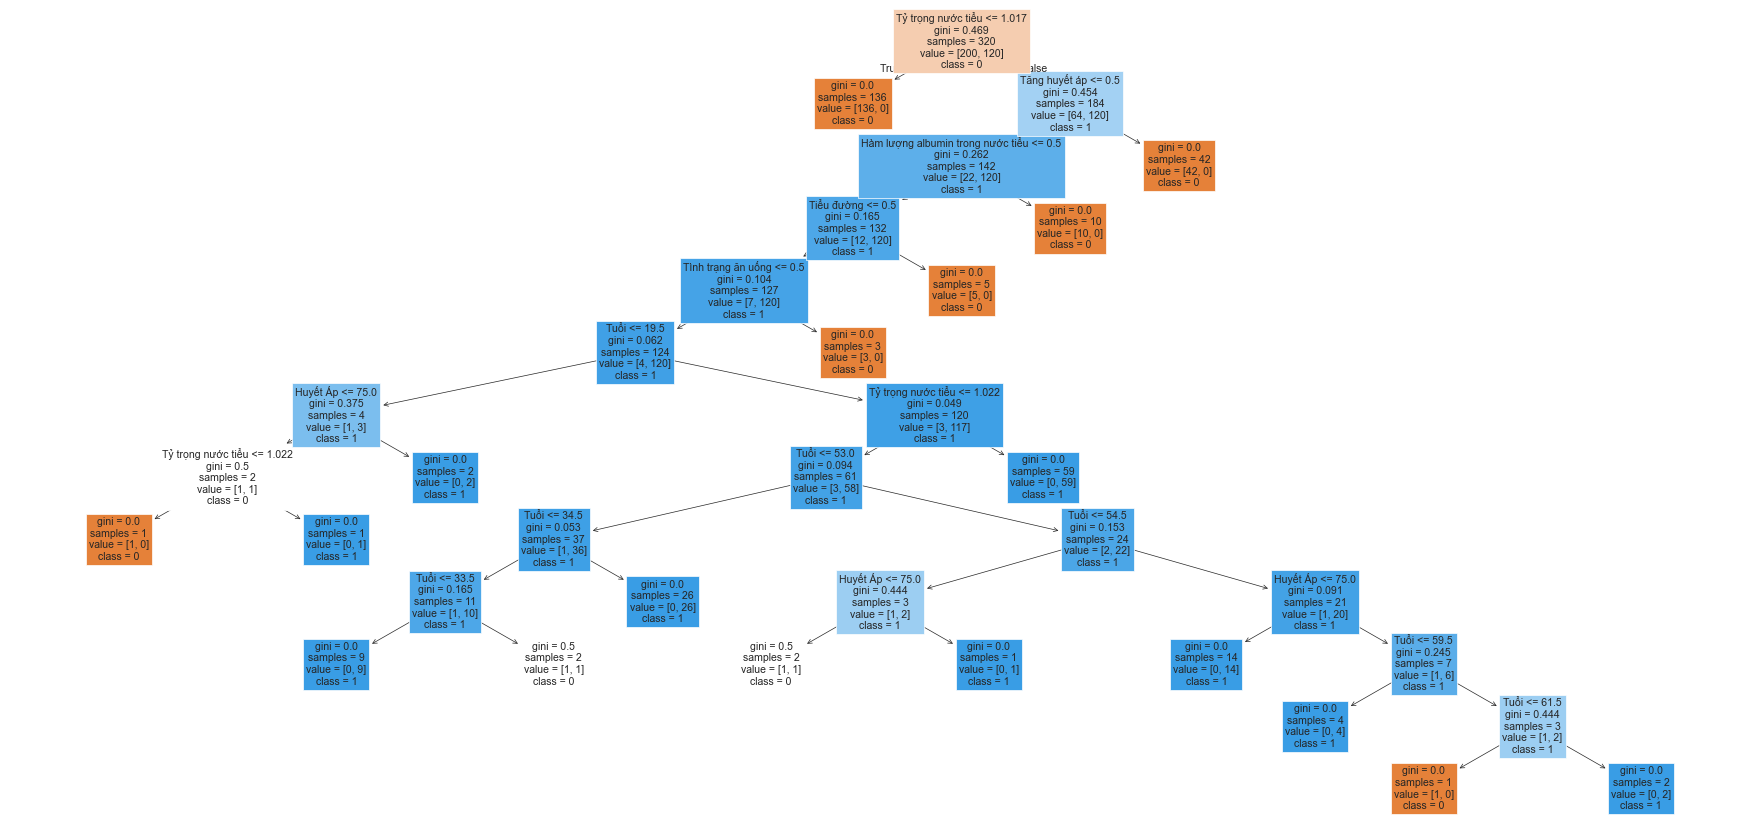

In [227]:
# Sơ đồ cây với decition tree
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(dtc, 
                feature_names=X.columns, 
                class_names=dtc.classes_.astype(str),
                filled=True)
plt.show()

In [228]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=11,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130
)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9875
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[48  2]
 [ 0 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



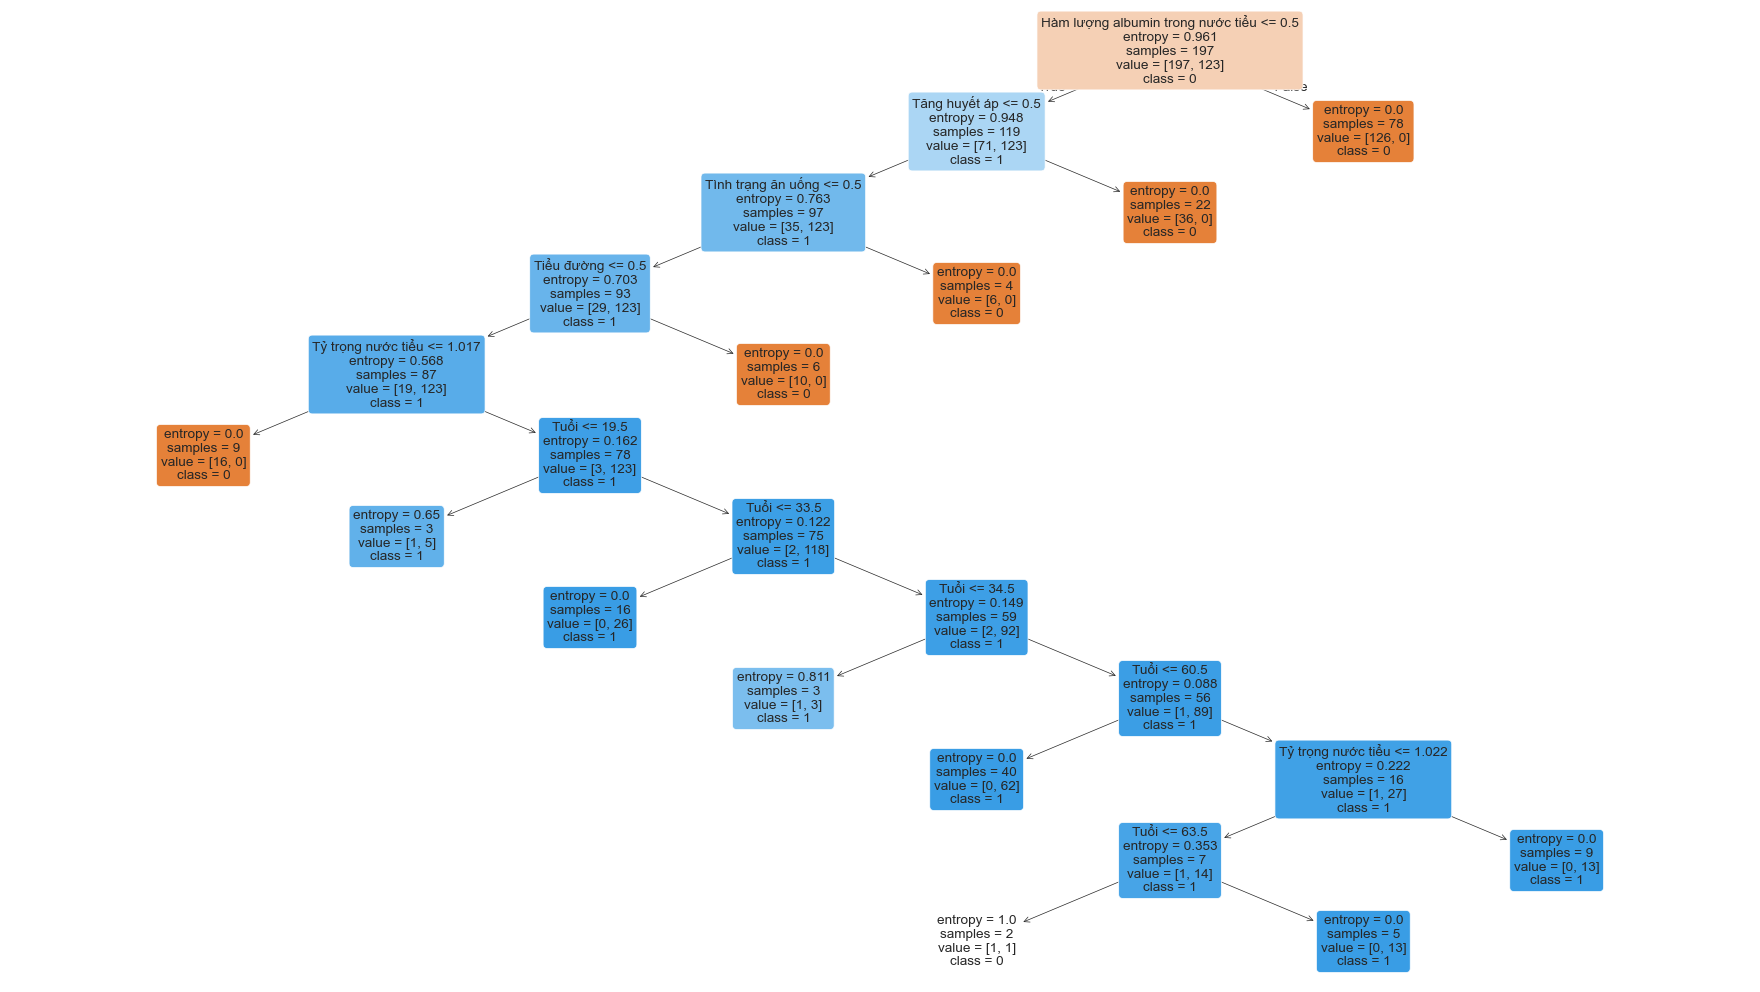

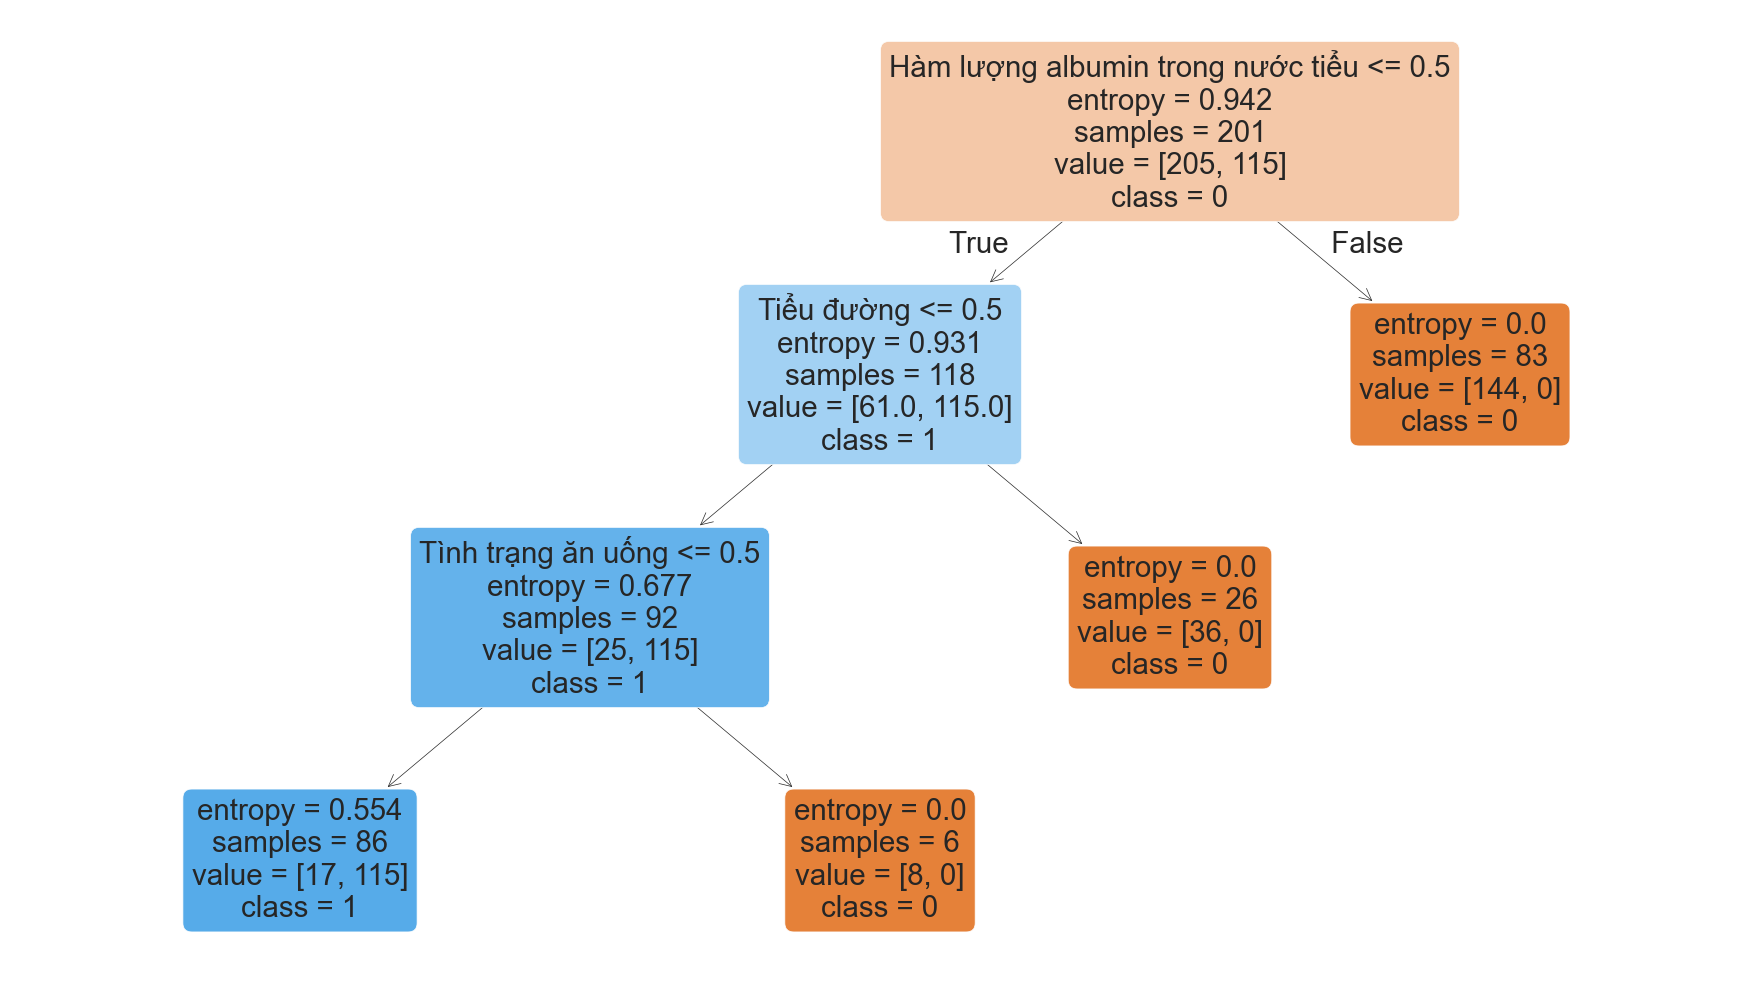

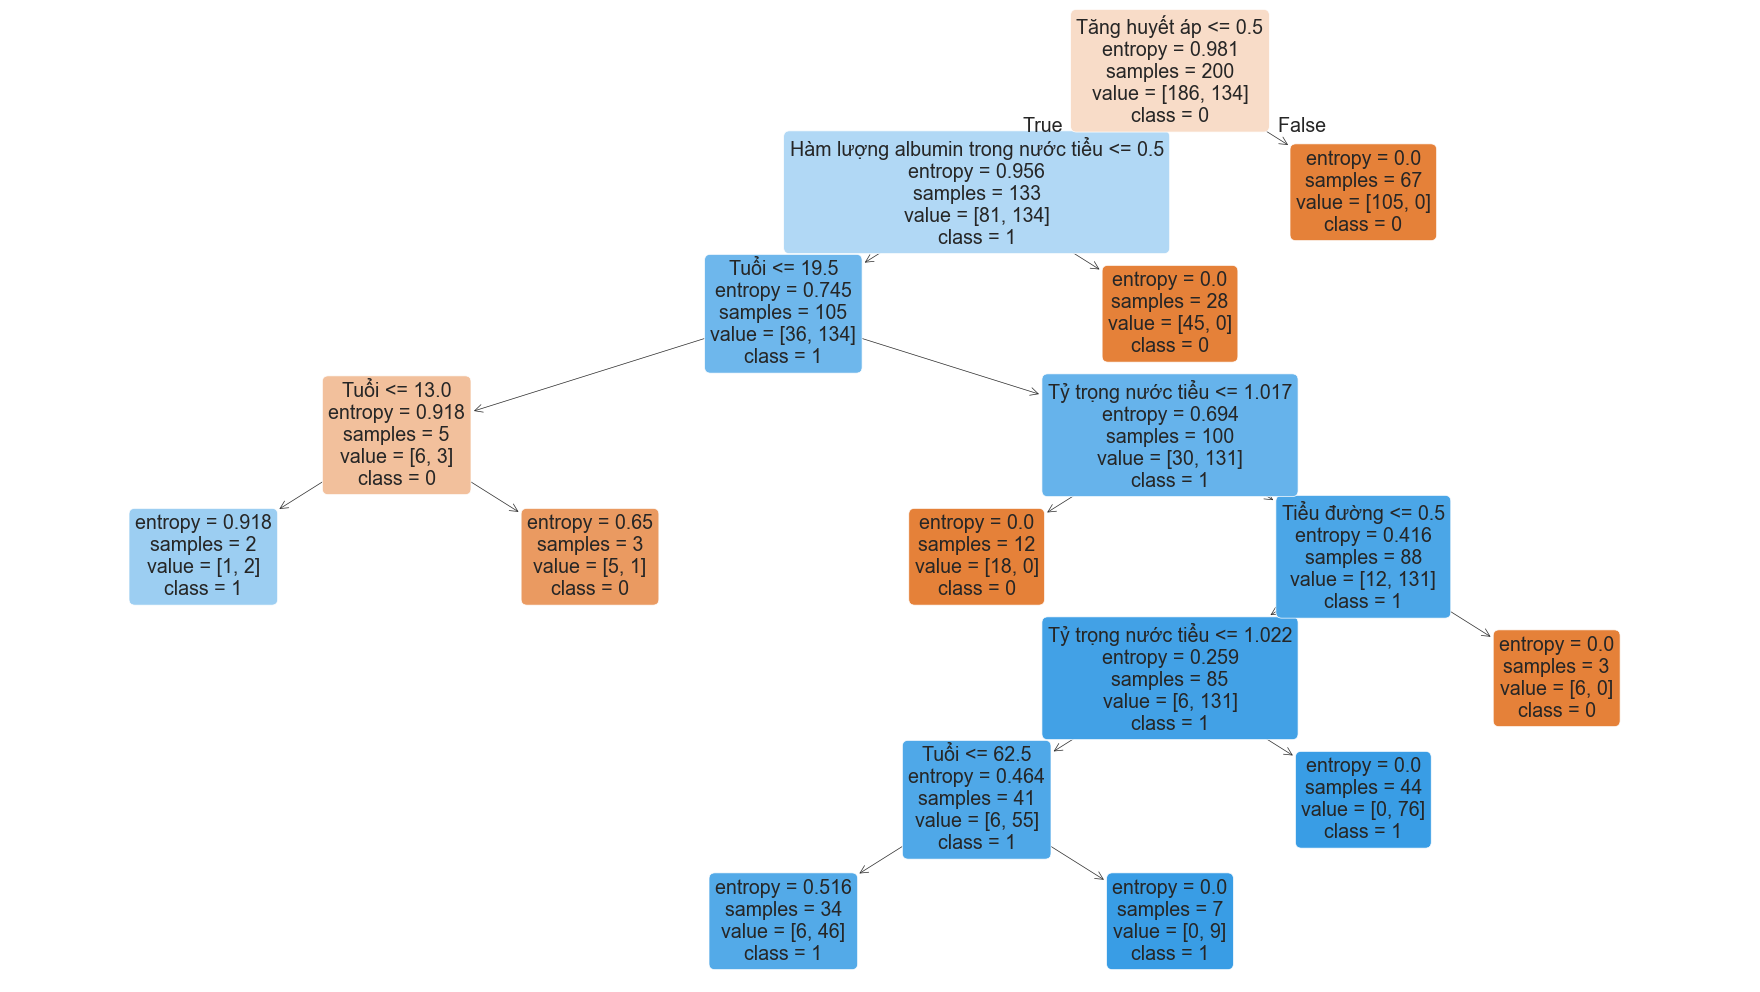

In [229]:
# Sơ đồ rừng với randomforest
import random
from sklearn import tree

# lấy 5 cây ngẫu nhiên
random_trees = random.sample(range(len(rd_clf.estimators_)), 3)

for idx in random_trees:
    plt.figure(figsize=(20, 12))
    plt.title(f"Cây số {idx}")
    tree.plot_tree(
        rd_clf.estimators_[idx],
        feature_names=X_train.columns,
        class_names=[str(cls) for cls in rd_clf.classes_],
        filled=True,
        rounded=True
    )
    plt.show()

In [230]:
# So sánh Mô hình
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Logistic Regresstion'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc,log_acc]
})

models.sort_values(by = 'Score', ascending = False)

Model   Score
1  Decision Tree Classifier  0.9875
0                       KNN  0.9750
2  Random Forest Classifier  0.9750
3      Logistic Regresstion  0.9625

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd


# --- 1. Nhóm mô hình KHÔNG cần chuẩn hóa ---
models_no_scaling = {
    "Decision Tree": dtc,
    "Random Forest": rd_clf
}

# --- 2. Nhóm mô hình CÓ chuẩn hóa ---
models_scaled = {
    "Logistic Regression": log_clf,
    "KNN": knn
}


def evaluate_models(model_dict, X_test_input, y_test):
    results = []
    
    for name, model in model_dict.items():
        y_pred = model.predict(X_test_input)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # AUC (nếu hỗ trợ)
        try:
            y_prob = model.predict_proba(X_test_input)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
        except:
            auc = None

        results.append([name, accuracy, precision, recall, f1, auc])

    return pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"])



# --- 3. ĐÁNH GIÁ MÔ HÌNH KHÔNG CHUẨN HÓA ---
df_no_scaling = evaluate_models(models_no_scaling, X_test, y_test)

# --- 4. ĐÁNH GIÁ MÔ HÌNH ĐƯỢC CHUẨN HÓA ---
df_scaled = evaluate_models(models_scaled, X_test_scaled, y_test)


# --- 5. In kết quả ---
print("KẾT QUẢ CHO MÔ HÌNH KHÔNG CẦN CHUẨN HÓA:")
display(df_no_scaling)

print("KẾT QUẢ CHO MÔ HÌNH CÓ CHUẨN HÓA:")
display(df_scaled)

KẾT QUẢ CHO MÔ HÌNH KHÔNG CẦN CHUẨN HÓA:


Model  Accuracy  Precision  Recall  F1-score    AUC
0  Decision Tree    0.9875   0.967742     1.0  0.983607  0.990
1  Random Forest    0.9750   0.937500     1.0  0.967742  0.998

KẾT QUẢ CHO MÔ HÌNH CÓ CHUẨN HÓA:


Model  Accuracy  Precision  Recall  F1-score       AUC
0  Logistic Regression    0.9625   0.909091     1.0  0.952381  0.981333
1                  KNN    0.9750   0.937500     1.0  0.967742  0.998667

In [232]:
# Feature important với mô hình logistic
feature_names = X_train_scaled.columns

coef = log_clf.coef_[0]

feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef,
    "Abs_Coefficient": np.abs(coef)
})

feature_importance = feature_importance.sort_values(
    by="Abs_Coefficient", ascending=False
)
print(feature_importance)

                             Feature  Coefficient  Abs_Coefficient
2                 Tỷ trọng nước tiểu     3.732508         3.732508
3  Hàm lượng albumin trong nước tiểu    -2.672921         2.672921
7                      Tăng huyết áp    -2.470617         2.470617
8                         Tiểu đường    -2.393308         2.393308
9                 Tình trạng ăn uống    -2.107199         2.107199
1                           Huyết Áp    -1.346973         1.346973
6             Tình trạng bạch cầu mủ     0.897235         0.897235
4          Mức đường trong nước tiểu    -0.745352         0.745352
0                               Tuổi    -0.304279         0.304279
5                Tình trạng hồng cầu     0.247321         0.247321


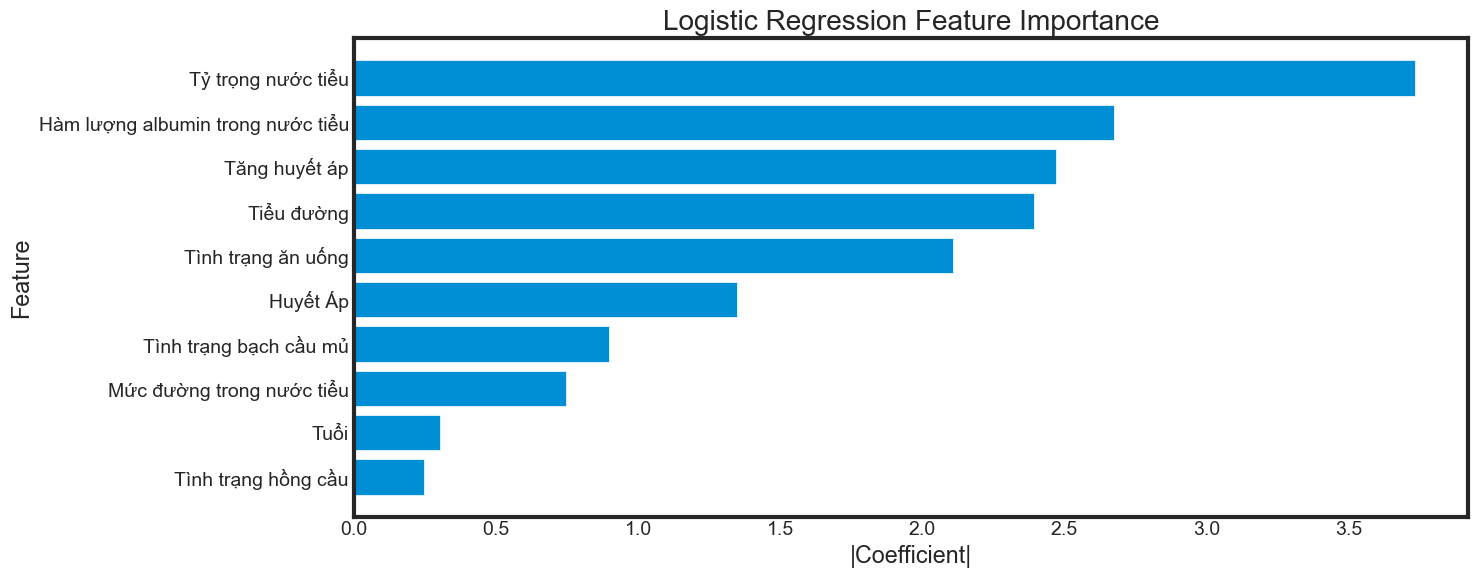

In [233]:
top_n = 10
top_features = feature_importance.head(top_n)

plt.figure(figsize=(15, 6))
plt.barh(
    top_features["Feature"],
    top_features["Abs_Coefficient"]
)
plt.xlabel("|Coefficient|")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()   
plt.tight_layout()
plt.show()

In [234]:
# Feature important với mô hình KNN
from sklearn.inspection import permutation_importance
import pandas as pd

result_knn = permutation_importance(
    knn,                    # model KNN đã fit
    X_test_scaled,          # dữ liệu test (đã scale)
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="accuracy"
)

knn_importance = pd.DataFrame({
    "Feature": X_test_scaled.columns,
    "Importance": result_knn.importances_mean
}).sort_values(by="Importance", ascending=False)

print(knn_importance)

                             Feature  Importance
8                         Tiểu đường     0.15625
7                      Tăng huyết áp     0.15375
2                 Tỷ trọng nước tiểu     0.12875
9                 Tình trạng ăn uống     0.08375
6             Tình trạng bạch cầu mủ     0.08250
3  Hàm lượng albumin trong nước tiểu     0.04875
5                Tình trạng hồng cầu     0.02625
1                           Huyết Áp     0.00250
0                               Tuổi     0.00000
4          Mức đường trong nước tiểu     0.00000


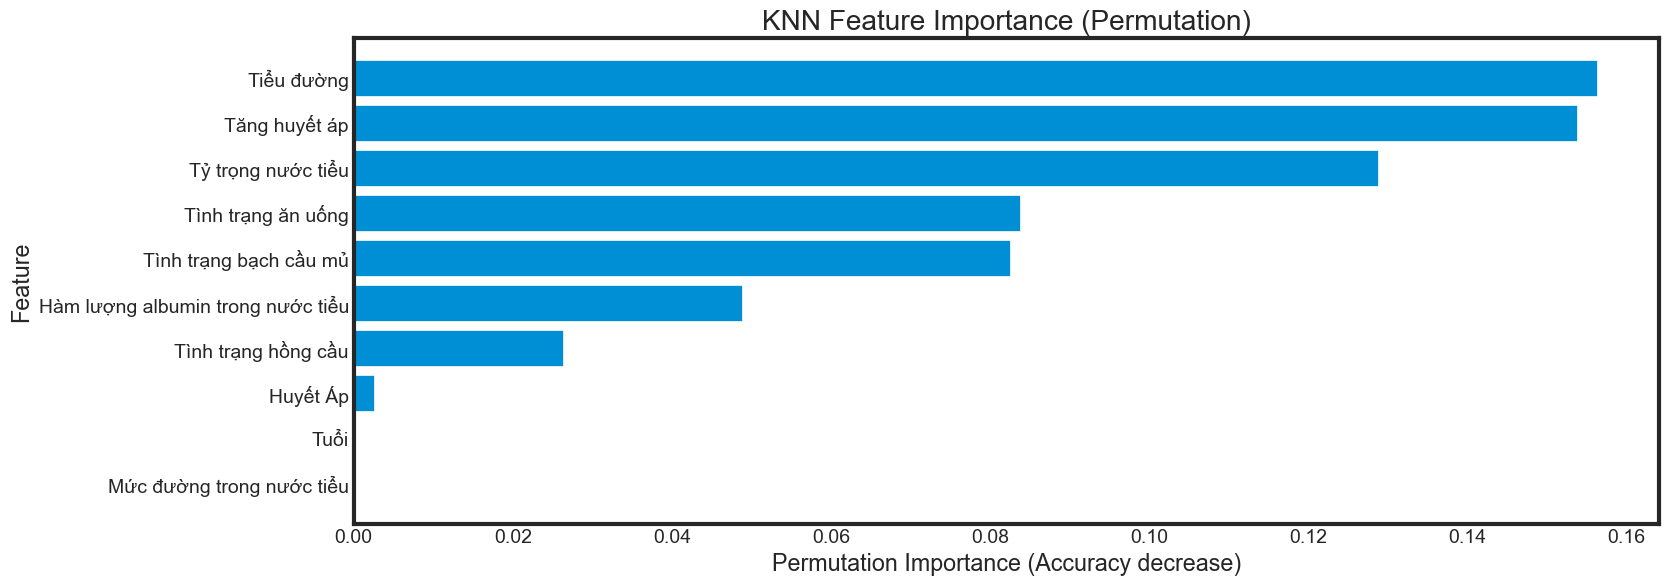

In [235]:
knn_top = knn_importance

plt.figure(figsize=(15, 6))
plt.barh(knn_top["Feature"], knn_top["Importance"])
plt.xlabel("Permutation Importance (Accuracy decrease)")
plt.ylabel("Feature")
plt.title("KNN Feature Importance (Permutation)")
plt.gca().invert_yaxis()
plt.show()

In [236]:
dt_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dtc.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(dt_importance)


                             Feature  Importance
2                 Tỷ trọng nước tiểu    0.457208
7                      Tăng huyết áp    0.312805
3  Hàm lượng albumin trong nước tiểu    0.103817
8                         Tiểu đường    0.058039
9                 Tình trạng ăn uống    0.037070
0                               Tuổi    0.024142
1                           Huyết Áp    0.006918
4          Mức đường trong nước tiểu    0.000000
5                Tình trạng hồng cầu    0.000000
6             Tình trạng bạch cầu mủ    0.000000


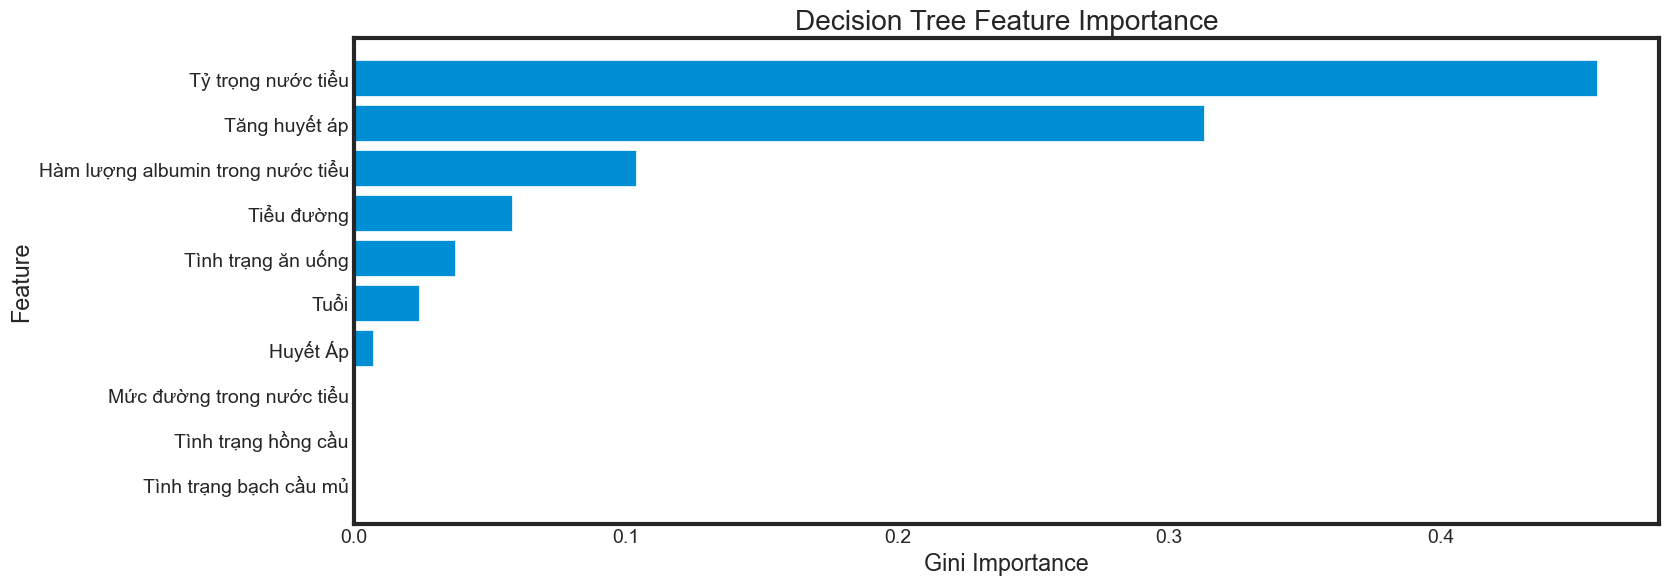

In [237]:
dt_top = dt_importance

plt.figure(figsize=(15, 6))
plt.barh(dt_top["Feature"], dt_top["Importance"])
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [238]:
rf_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rd_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(rf_importance)

                             Feature  Importance
2                 Tỷ trọng nước tiểu    0.313113
3  Hàm lượng albumin trong nước tiểu    0.212202
7                      Tăng huyết áp    0.185916
8                         Tiểu đường    0.141928
9                 Tình trạng ăn uống    0.058007
1                           Huyết Áp    0.040672
0                               Tuổi    0.030314
6             Tình trạng bạch cầu mủ    0.012247
4          Mức đường trong nước tiểu    0.003666
5                Tình trạng hồng cầu    0.001935


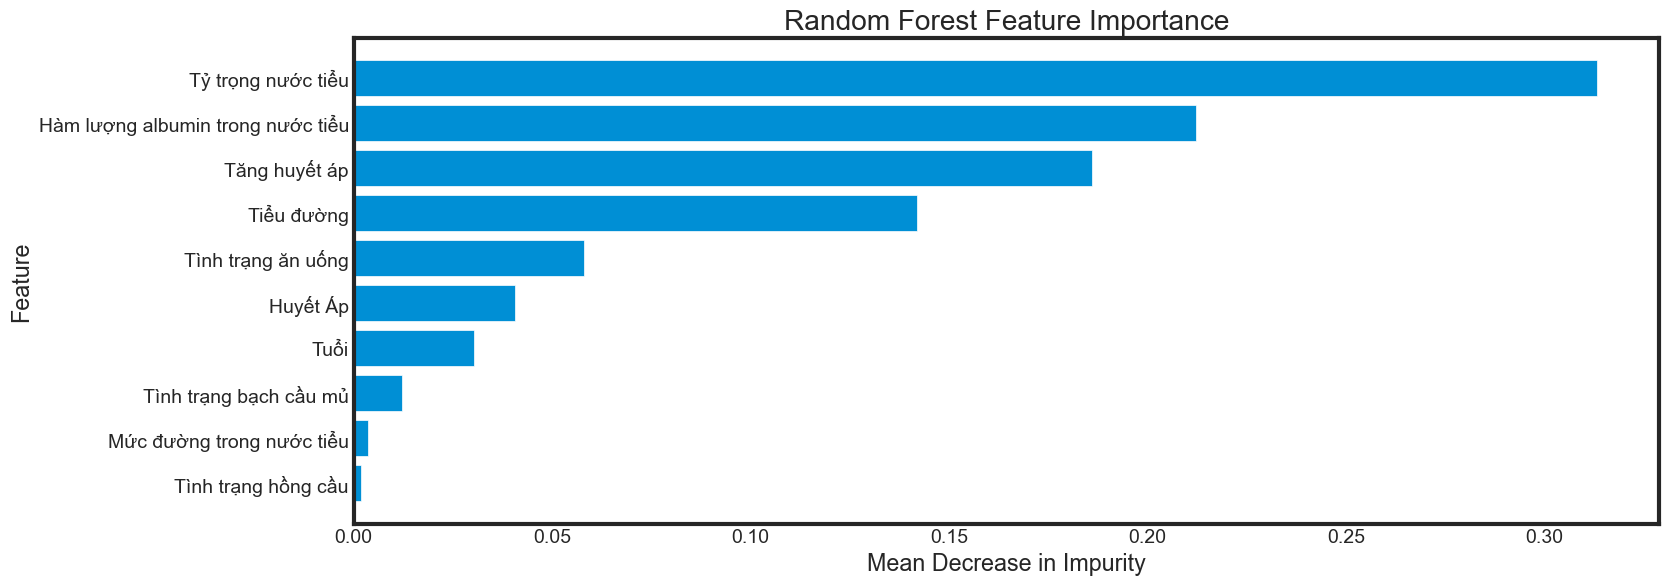

In [239]:
rf_top = rf_importance.head(10)

plt.figure(figsize=(15, 6))
plt.barh(rf_top["Feature"], rf_top["Importance"])
plt.xlabel("Mean Decrease in Impurity")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

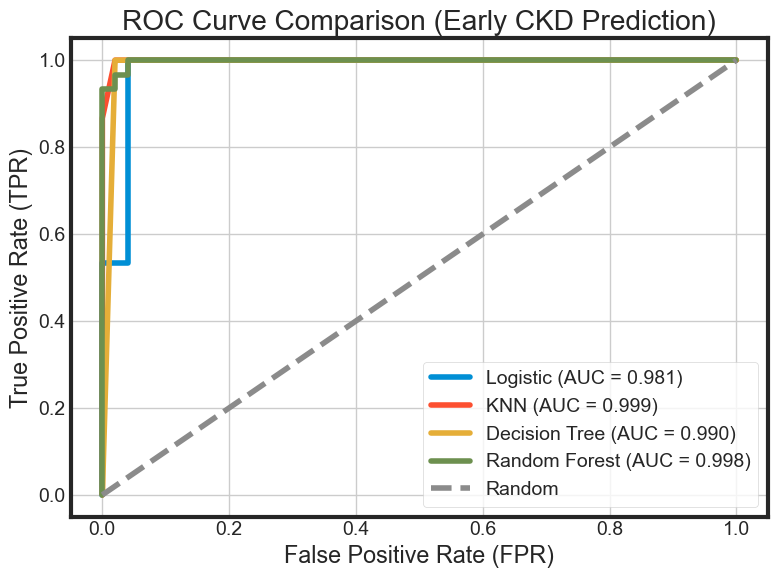

In [240]:
# ROC VÀ AUC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_log_proba = log_clf.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_log_proba)
auc_log = roc_auc_score(y_test, y_log_proba)
y_knn_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_knn_proba)
auc_knn = roc_auc_score(y_test, y_knn_proba)
y_dt_proba = dtc.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt_proba)
auc_dt = roc_auc_score(y_test, y_dt_proba)
y_rf_proba = rd_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_proba)
auc_rf = roc_auc_score(y_test, y_rf_proba)
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {auc_log:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot(fpr_dt,  tpr_dt,  label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC = {auc_rf:.3f})")

# Đường đoán ngẫu nhiên
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Early CKD Prediction)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [241]:
# Shuffled Labels trên logistic ( Các mô hình khác tương tự nhau )
y_train_shuffled = np.random.permutation(y_train)
from sklearn.linear_model import LogisticRegression

log_shuffle = LogisticRegression(max_iter=1000)
log_shuffle.fit(X_train_scaled, y_train_shuffled)
y_train_pred = log_shuffle.predict(X_train_scaled)
y_test_pred  = log_shuffle.predict(X_test_scaled)
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train_shuffled, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy (shuffled): {train_acc:.4f}")
print(f"Test Accuracy (shuffled):     {test_acc:.4f}")
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix (Test, shuffled):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test, shuffled):")
print(classification_report(y_test, y_test_pred))
from sklearn.metrics import roc_auc_score

# Lấy xác suất dự đoán
y_test_proba = log_shuffle.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC-AUC (shuffled): {auc:.4f}")

Training Accuracy (shuffled): 0.6531
Test Accuracy (shuffled):     0.5625
Confusion Matrix (Test, shuffled):
[[45  5]
 [30  0]]

Classification Report (Test, shuffled):
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        50
           1       0.00      0.00      0.00        30

    accuracy                           0.56        80
   macro avg       0.30      0.45      0.36        80
weighted avg       0.38      0.56      0.45        80

ROC-AUC (shuffled): 0.6173


In [242]:
# Thử lại với 50 lần
import numpy as np
from sklearn.metrics import roc_auc_score

aucs = []
accs = []

for _ in range(50):
    y_shuf = np.random.permutation(y_train)
    log_shuffle.fit(X_train_scaled, y_shuf)

    y_test_proba = log_shuffle.predict_proba(X_test_scaled)[:, 1]
    y_test_pred  = log_shuffle.predict(X_test_scaled)

    aucs.append(roc_auc_score(y_test, y_test_proba))
    accs.append(accuracy_score(y_test, y_test_pred))

print("Mean shuffled AUC:", np.mean(aucs))
print("Std shuffled AUC:", np.std(aucs))
print("Mean shuffled Accuracy:", np.mean(accs))

Mean shuffled AUC: 0.5015866666666667
Std shuffled AUC: 0.19138293851740168
Mean shuffled Accuracy: 0.5844999999999999


In [243]:
import os

# Đang chạy trong demo/
NOTEBOOK_DIR = os.getcwd()

# Quay về root BTL-MLAI
ROOT_DIR = os.path.abspath(os.path.join(NOTEBOOK_DIR, ".."))

# Thư mục model/
MODEL_DIR = os.path.join(ROOT_DIR, "model")

os.makedirs(MODEL_DIR, exist_ok=True)

print("MODEL DIR:", MODEL_DIR)


MODEL DIR: d:\BTL-MLAI\model


In [244]:
import joblib

joblib.dump(scaler, os.path.join(MODEL_DIR, "scaler.pkl"))

joblib.dump(cols_to_scale, os.path.join(MODEL_DIR, "cols_to_scale.pkl"))

joblib.dump(log_clf, os.path.join(MODEL_DIR, "model.pkl"))

joblib.dump(encoders, os.path.join(MODEL_DIR, "encoders.pkl"))

print("✅ Đã lưu scaler, cols_to_scale, model, encoders vào thư mục model/")


✅ Đã lưu scaler, cols_to_scale, model, encoders vào thư mục model/


In [121]:
import joblib

# Lưu scaler đã fit
joblib.dump(scaler, "scaler.pkl")

# Lưu danh sách cột cần scale
joblib.dump(cols_to_scale, "cols_to_scale.pkl")

print("Đã lưu scaler.pkl và cols_to_scale.pkl")

Đã lưu scaler.pkl và cols_to_scale.pkl


In [122]:
import joblib
# Lưu mô hình ra file model.pkl
joblib.dump(log_clf, "model.pkl")
print("Đã lưu mô hình thành công!")

Đã lưu mô hình thành công!


<p style = "color:red">Ứng dụng mô hình trong việc hỗ trợ bác sĩ xác nhận mắc bệnh với full feature</p>

In [ ]:
df.isna().sum().sort_values(ascending = False)

Tình trạng hồng cầu                  152
Số lượng hồng cầu                    131
Số lượng bạch cầu                    106
kali                                  88
Natri                                 87
Thể tích hồng cầu đóng gói            71
Tình trạng bạch cầu mủ                65
Huyết sắc tố                          52
Mức đường trong nước tiểu             49
Tỷ trọng nước tiểu                    47
Hàm lượng albumin trong nước tiểu     46
Đường huyết ngẫu nhiên                44
Ure máu                               19
Creatinine huyết thanh                17
Huyết Áp                              12
Tuổi                                   9
Vi khuẩn trong nước tiểu               4
Cụm bạch cầu mủ                        4
Tăng huyết áp                          2
Tiểu đường                             2
Bệnh động mạch vành                    2
Tình trạng ăn uống                     1
Phù chân                               1
Thiếu máu                              1
Phân loại       

In [ ]:
df[num_cols].isnull().sum()

Tuổi                                   9
Huyết Áp                              12
Tỷ trọng nước tiểu                    47
Hàm lượng albumin trong nước tiểu     46
Mức đường trong nước tiểu             49
Đường huyết ngẫu nhiên                44
Ure máu                               19
Creatinine huyết thanh                17
Natri                                 87
kali                                  88
Huyết sắc tố                          52
Thể tích hồng cầu đóng gói            71
Số lượng bạch cầu                    106
Số lượng hồng cầu                    131
dtype: int64

In [ ]:
df[cat_cols].isnull().sum()

Tình trạng hồng cầu         152
Tình trạng bạch cầu mủ       65
Cụm bạch cầu mủ               4
Vi khuẩn trong nước tiểu      4
Tăng huyết áp                 2
Tiểu đường                    2
Bệnh động mạch vành           2
Tình trạng ăn uống            1
Phù chân                      1
Thiếu máu                     1
Phân loại                     0
dtype: int64

In [ ]:
missing_data = df.isna().sum()
missing_data_ratio = df.isna().mean()*100

misingdata_table = pd.DataFrame({
    "missing_data":missing_data,
    "missing_data_ratio":missing_data_ratio
    })
misingdata_table

missing_data  missing_data_ratio
Tuổi                                          9                2.25
Huyết Áp                                     12                3.00
Tỷ trọng nước tiểu                           47               11.75
Hàm lượng albumin trong nước tiểu            46               11.50
Mức đường trong nước tiểu                    49               12.25
Tình trạng hồng cầu                         152               38.00
Tình trạng bạch cầu mủ                       65               16.25
Cụm bạch cầu mủ                               4                1.00
Vi khuẩn trong nước tiểu                      4                1.00
Đường huyết ngẫu nhiên                       44               11.00
Ure máu                                      19                4.75
Creatinine huyết thanh                       17                4.25
Natri                                        87               21.75
kali                                         88               22.00
Huyết sắc tố                                 52               13.00
Thể tích hồng cầu đóng gói                   71               17.75
Số lượng bạch cầu                           106               26.50
Số lượng hồng cầu                           131               32.75
Tăng huyết áp                                 2                0.50
Tiểu đường                                    2                0.50
Bệnh động mạch vành                           2                0.50
Tình trạng ăn uống                            1                0.25
Phù chân                                      1                0.25
Thiếu máu                                     1                0.25
Phân loại                                     0                0.00

Các cột số học ta sẽ điền Medium <br>
Các cột category ta sẽ điền giá trị xuất hiện nhiều nhất

In [ ]:
# Tách cột số và cột category
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns


# Hàm điền giá trị Median
def impute_median(feature):
    median_value = df[feature].median()
    df[feature] = df[feature].fillna(median_value)



# Hàm điền giá trị Mode
def impute_mode(feature):
    mode_value = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode_value)


#Thực hiện imputation

# Điền cho cột số học (Median)
for col in num_cols:
    impute_median(col)

# Điền cho cột category (Mode)
for col in cat_cols:
    impute_mode(col)

In [ ]:
df.isnull().sum()

Tuổi                                 0
Huyết Áp                             0
Tỷ trọng nước tiểu                   0
Hàm lượng albumin trong nước tiểu    0
Mức đường trong nước tiểu            0
Tình trạng hồng cầu                  0
Tình trạng bạch cầu mủ               0
Cụm bạch cầu mủ                      0
Vi khuẩn trong nước tiểu             0
Đường huyết ngẫu nhiên               0
Ure máu                              0
Creatinine huyết thanh               0
Natri                                0
kali                                 0
Huyết sắc tố                         0
Thể tích hồng cầu đóng gói           0
Số lượng bạch cầu                    0
Số lượng hồng cầu                    0
Tăng huyết áp                        0
Tiểu đường                           0
Bệnh động mạch vành                  0
Tình trạng ăn uống                   0
Phù chân                             0
Thiếu máu                            0
Phân loại                            0
dtype: int64

<p style="color: green; font-size: 24px;text-align: center;">Feature Encoding</p>

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

Tình trạng hồng cầu has 2 categories

Tình trạng bạch cầu mủ has 2 categories

Cụm bạch cầu mủ has 2 categories

Vi khuẩn trong nước tiểu has 2 categories

Tăng huyết áp has 2 categories

Tiểu đường has 2 categories

Bệnh động mạch vành has 2 categories

Tình trạng ăn uống has 2 categories

Phù chân has 2 categories

Thiếu máu has 2 categories

Phân loại has 2 categories



In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

cat_cols = [
    'Tình trạng hồng cầu', 'Tình trạng bạch cầu mủ',
    'Cụm bạch cầu mủ', 'Vi khuẩn trong nước tiểu',
    'Tăng huyết áp', 'Tiểu đường', 'Bệnh động mạch vành',
    'Tình trạng ăn uống', 'Phù chân', 'Thiếu máu'
]

target_col = "Phân loại"

encoders = {}

# Mã hóa tất cả category columns + target
for col in cat_cols + [target_col]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# LƯU ENCODER
joblib.dump(encoders, "encoders.pkl")

['encoders.pkl']

In [ ]:
df.head()

Tuổi  Huyết Áp  Tỷ trọng nước tiểu  Hàm lượng albumin trong nước tiểu  \
id                                                                          
0   48.0      80.0               1.020                                1.0   
1    7.0      50.0               1.020                                4.0   
2   62.0      80.0               1.010                                2.0   
3   48.0      70.0               1.005                                4.0   
4   51.0      80.0               1.010                                2.0   

    Mức đường trong nước tiểu  Tình trạng hồng cầu  Tình trạng bạch cầu mủ  \
id                                                                           
0                         0.0                    1                       1   
1                         0.0                    1                       1   
2                         3.0                    1                       1   
3                         0.0                    1                       0   
4                         0.0                    1                       1   

    Cụm bạch cầu mủ  Vi khuẩn trong nước tiểu  Đường huyết ngẫu nhiên  \
id                                                                      
0                 0                         0                   121.0   
1                 0                         0                   121.0   
2                 0                         0                   423.0   
3                 1                         0                   117.0   
4                 0                         0                   106.0   

    Ure máu  Creatinine huyết thanh  Natri  kali  Huyết sắc tố  \
id                                                               
0      36.0                     1.2  138.0   4.4          15.4   
1      18.0                     0.8  138.0   4.4          11.3   
2      53.0                     1.8  138.0   4.4           9.6   
3      56.0                     3.8  111.0   2.5          11.2   
4      26.0                     1.4  138.0   4.4          11.6   

    Thể tích hồng cầu đóng gói  Số lượng bạch cầu  Số lượng hồng cầu  \
id                                                                     
0                         44.0             7800.0                5.2   
1                         38.0             6000.0                4.8   
2                         31.0             7500.0                4.8   
3                         32.0             6700.0                3.9   
4                         35.0             7300.0                4.6   

    Tăng huyết áp  Tiểu đường  Bệnh động mạch vành  Tình trạng ăn uống  \
id                                                                       
0               1           1                    0                   0   
1               0           0                    0                   0   
2               0           1                    0                   1   
3               1           0                    0                   1   
4               0           0                    0                   0   

    Phù chân  Thiếu máu  Phân loại  
id                                  
0          0          0          0  
1          0          0          0  
2          0          1          0  
3          1          1          0  
4          0          0          0

<p style="color: green; font-size: 24px;text-align: center;">Model Building</p>

In [ ]:
ind_col = [col for col in df.columns if col != 'Phân loại']
dep_col = 'Phân loại'

X = df[ind_col]
y = df[dep_col]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# Danh sách các cột cần chuẩn hóa 
cols_to_scale = [
    "Tuổi",
    "Huyết Áp",
    "Tỷ trọng nước tiểu",
    "Đường huyết ngẫu nhiên",
    "Ure máu",
    "Creatinine huyết thanh",
    "Natri",
    "kali",
    "Huyết sắc tố",
    "Thể tích hồng cầu đóng gói",
    "Số lượng bạch cầu",
    "Số lượng hồng cầu"
]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Khởi tạo scaler
scaler = MinMaxScaler()

# 2. Fit scaler trên TẬP TRAIN
scaler.fit(X_train[cols_to_scale])

# 3. Tạo bản sao dữ liệu để tránh ghi đè lên gốc
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

# 4. Transform các cột cần scale bằng scaler đã fit
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale]  = scaler.transform(X_test[cols_to_scale])

In [ ]:
X_train_scaled.head()

Tuổi  Huyết Áp  Tỷ trọng nước tiểu  \
id                                            
92   0.784091  0.153846                0.25   
223  0.784091  0.307692                0.25   
234  0.397727  0.384615                0.25   
232  0.545455  0.307692                0.50   
377  0.704545  0.153846                0.75   

     Hàm lượng albumin trong nước tiểu  Mức đường trong nước tiểu  \
id                                                                  
92                                 3.0                        0.0   
223                                0.0                        3.0   
234                                0.0                        0.0   
232                                1.0                        0.0   
377                                0.0                        0.0   

     Tình trạng hồng cầu  Tình trạng bạch cầu mủ  Cụm bạch cầu mủ  \
id                                                                  
92                     1                       0                1   
223                    1                       1                0   
234                    0                       1                0   
232                    0                       0                0   
377                    1                       1                0   

     Vi khuẩn trong nước tiểu  Đường huyết ngẫu nhiên   Ure máu  \
id                                                                
92                          1                0.379135  0.188976   
223                         0                0.592875  0.052493   
234                         0                0.129771  0.023622   
232                         0                0.129771  0.083990   
377                         0                0.068702  0.044619   

     Creatinine huyết thanh     Natri      kali  Huyết sắc tố  \
id                                                              
92                 0.065126  0.423077  0.042697      0.496599   
223                0.016807  0.480769  0.035955      0.673469   
234                0.016807  0.519231  0.042697      0.809524   
232                0.016807  0.519231  0.042697      0.649660   
377                0.004202  0.653846  0.051685      0.727891   

     Thể tích hồng cầu đóng gói  Số lượng bạch cầu  Số lượng hồng cầu  \
id                                                                      
92                     0.533333           0.140496           0.254237   
223                    0.644444           0.289256           0.423729   
234                    0.777778           0.078512           0.525424   
232                    0.688889           0.239669           0.457627   
377                    0.888889           0.173554           0.457627   

     Tăng huyết áp  Tiểu đường  Bệnh động mạch vành  Tình trạng ăn uống  \
id                                                                        
92               1           1                    1                   0   
223              1           1                    0                   0   
234              1           0                    0                   0   
232              0           0                    0                   0   
377              0           0                    0                   0   

     Phù chân  Thiếu máu  
id                        
92          0          0  
223         0          0  
234         0          0  
232         1          0  
377         0          0

In [ ]:
X_train.head()

Tuổi  Huyết Áp  Tỷ trọng nước tiểu  Hàm lượng albumin trong nước tiểu  \
id                                                                           
92   71.0      70.0               1.010                                3.0   
223  71.0      90.0               1.010                                0.0   
234  37.0     100.0               1.010                                0.0   
232  50.0      90.0               1.015                                1.0   
377  64.0      70.0               1.020                                0.0   

     Mức đường trong nước tiểu  Tình trạng hồng cầu  Tình trạng bạch cầu mủ  \
id                                                                            
92                         0.0                    1                       0   
223                        3.0                    1                       1   
234                        0.0                    0                       1   
232                        0.0                    0                       0   
377                        0.0                    1                       1   

     Cụm bạch cầu mủ  Vi khuẩn trong nước tiểu  Đường huyết ngẫu nhiên  \
id                                                                       
92                 1                         1                   219.0   
223                0                         0                   303.0   
234                0                         0                   121.0   
232                0                         0                   121.0   
377                0                         0                    97.0   

     Ure máu  Creatinine huyết thanh  Natri  kali  Huyết sắc tố  \
id                                                                
92      82.0                     3.6  133.0   4.4         10.40   
223     30.0                     1.3  136.0   4.1         13.00   
234     19.0                     1.3  138.0   4.4         15.00   
232     42.0                     1.3  138.0   4.4         12.65   
377     27.0                     0.7  145.0   4.8         13.80   

     Thể tích hồng cầu đóng gói  Số lượng bạch cầu  Số lượng hồng cầu  \
id                                                                      
92                         33.0             5600.0                3.6   
223                        38.0             9200.0                4.6   
234                        44.0             4100.0                5.2   
232                        40.0             8000.0                4.8   
377                        49.0             6400.0                4.8   

     Tăng huyết áp  Tiểu đường  Bệnh động mạch vành  Tình trạng ăn uống  \
id                                                                        
92               1           1                    1                   0   
223              1           1                    0                   0   
234              1           0                    0                   0   
232              0           0                    0                   0   
377              0           0                    0                   0   

     Phù chân  Thiếu máu  
id                        
92          0          0  
223         0          0  
234         0          0  
232         1          0  
377         0          0

<p style="color: green; font-size: 24px;text-align: center;">KNN</p>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train_scaled))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test_scaled))}")

Training Accuracy of KNN is 0.975
Test Accuracy of KNN is 0.9833333333333333 

Confusion Matrix :- 
[[70  2]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



<p style="color: green; font-size: 24px;text-align: center;">Decision Tree Classifier</p>

Mặc định thư viện sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Sơ đồ cây

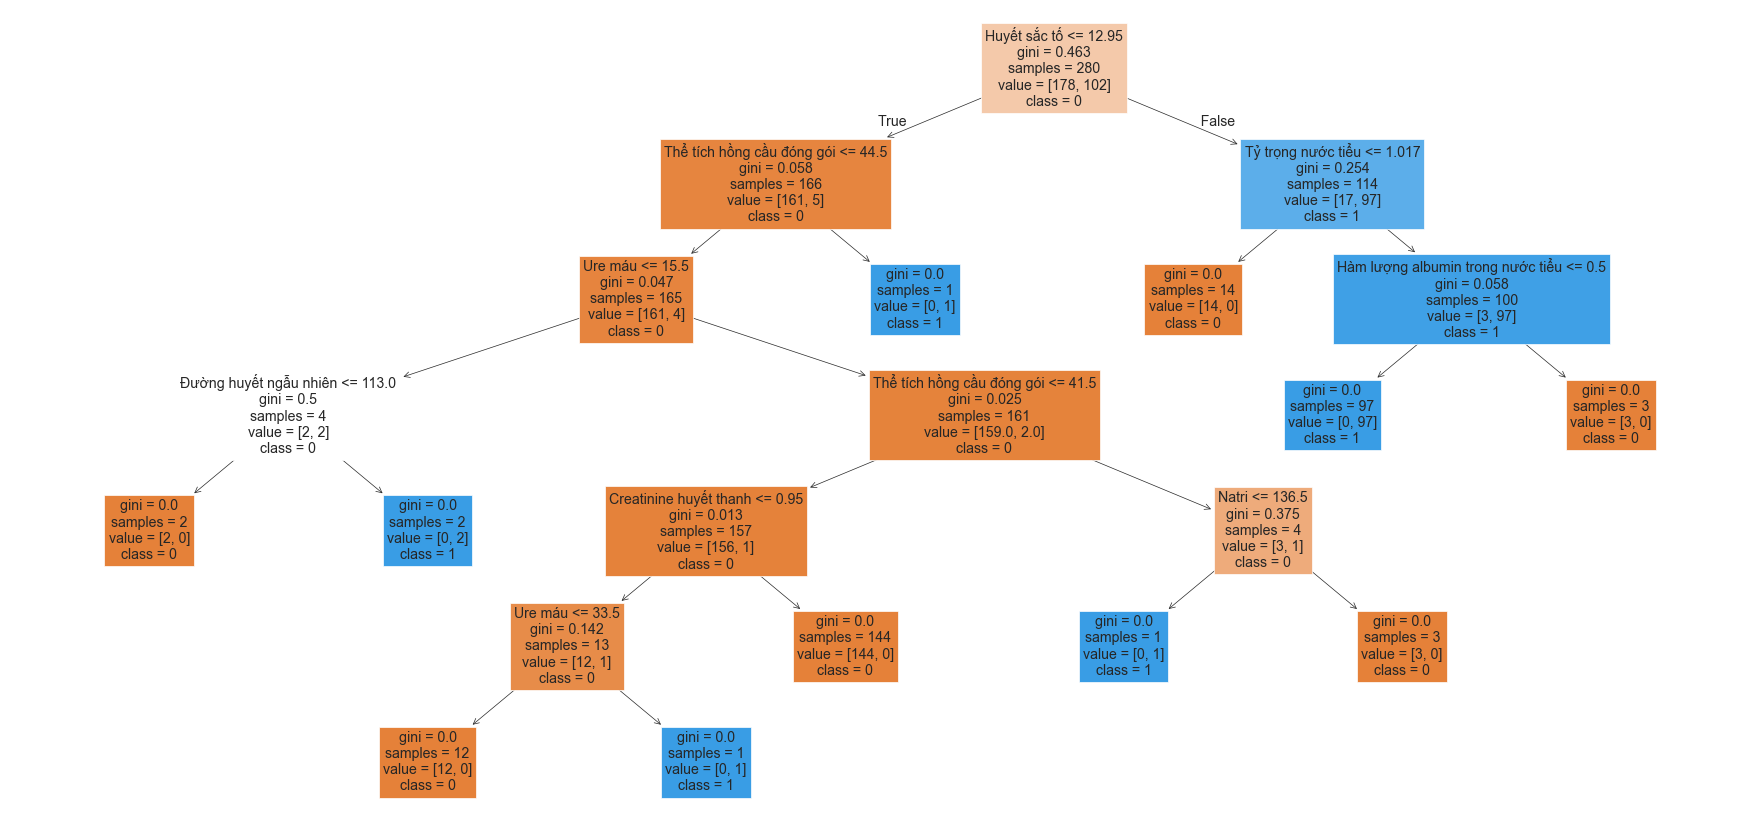

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(dtc, 
               feature_names=X.columns, 
               class_names=dtc.classes_.astype(str),
               filled=True)
plt.show()


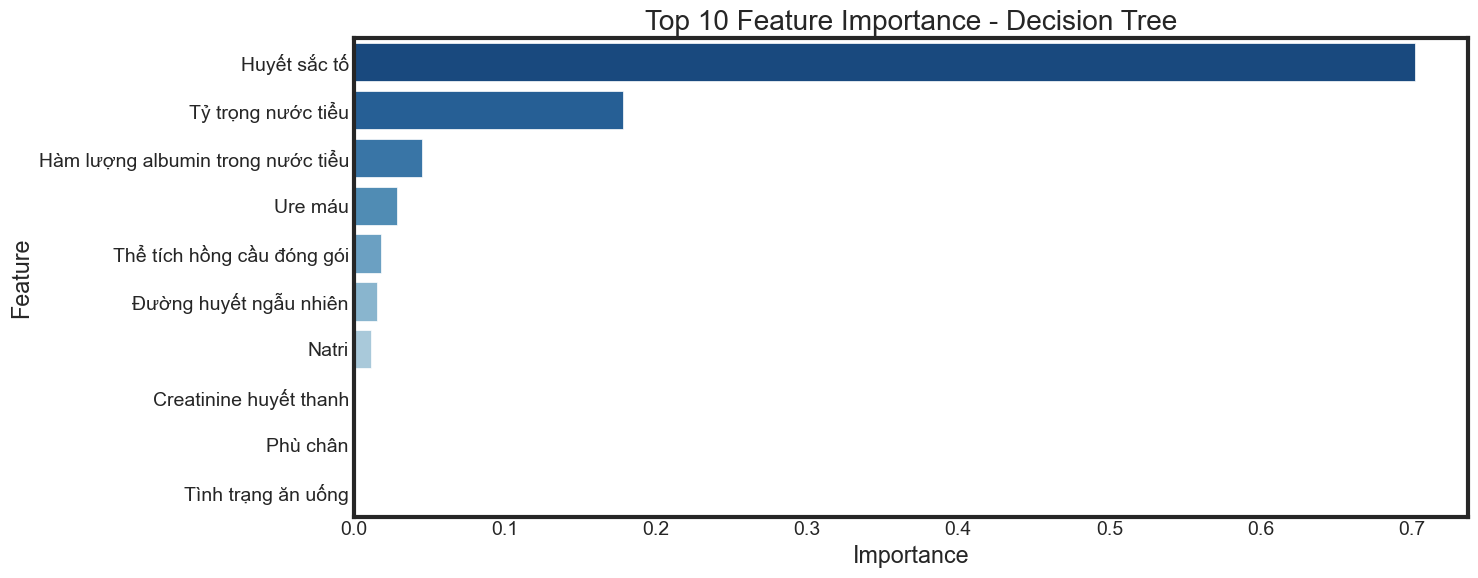

In [ ]:
# Feature important

importances = dtc.feature_importances_

feature_names = X_train.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

TOP_K = 10
fi_top = fi_df.head(TOP_K)

plt.figure(figsize=(15, 6))
sns.barplot(
    data=fi_top,
    x="Importance",
    y="Feature",
    palette="Blues_r"
)

plt.title(f"Top {TOP_K} Feature Importance - Decision Tree")
plt.tight_layout()
plt.show()

<p style="color: green; font-size: 24px;text-align: center;">Random Forest Classifier</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=11,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130
)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



Sơ đồ rừng

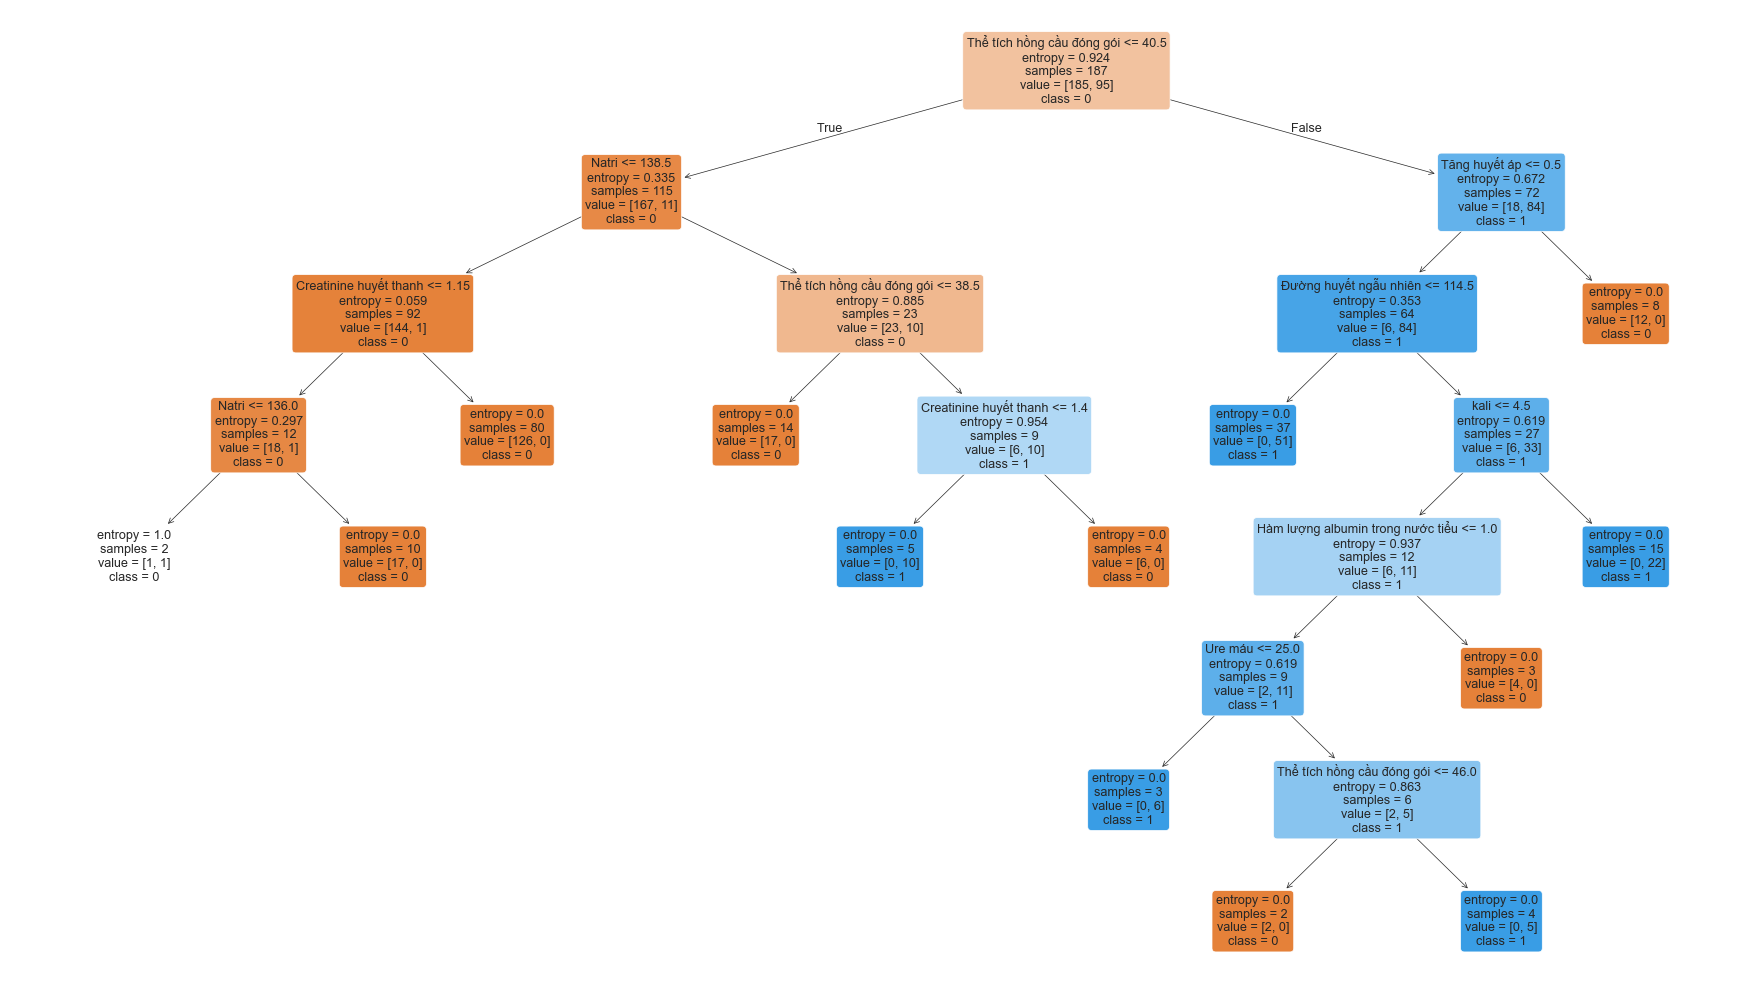

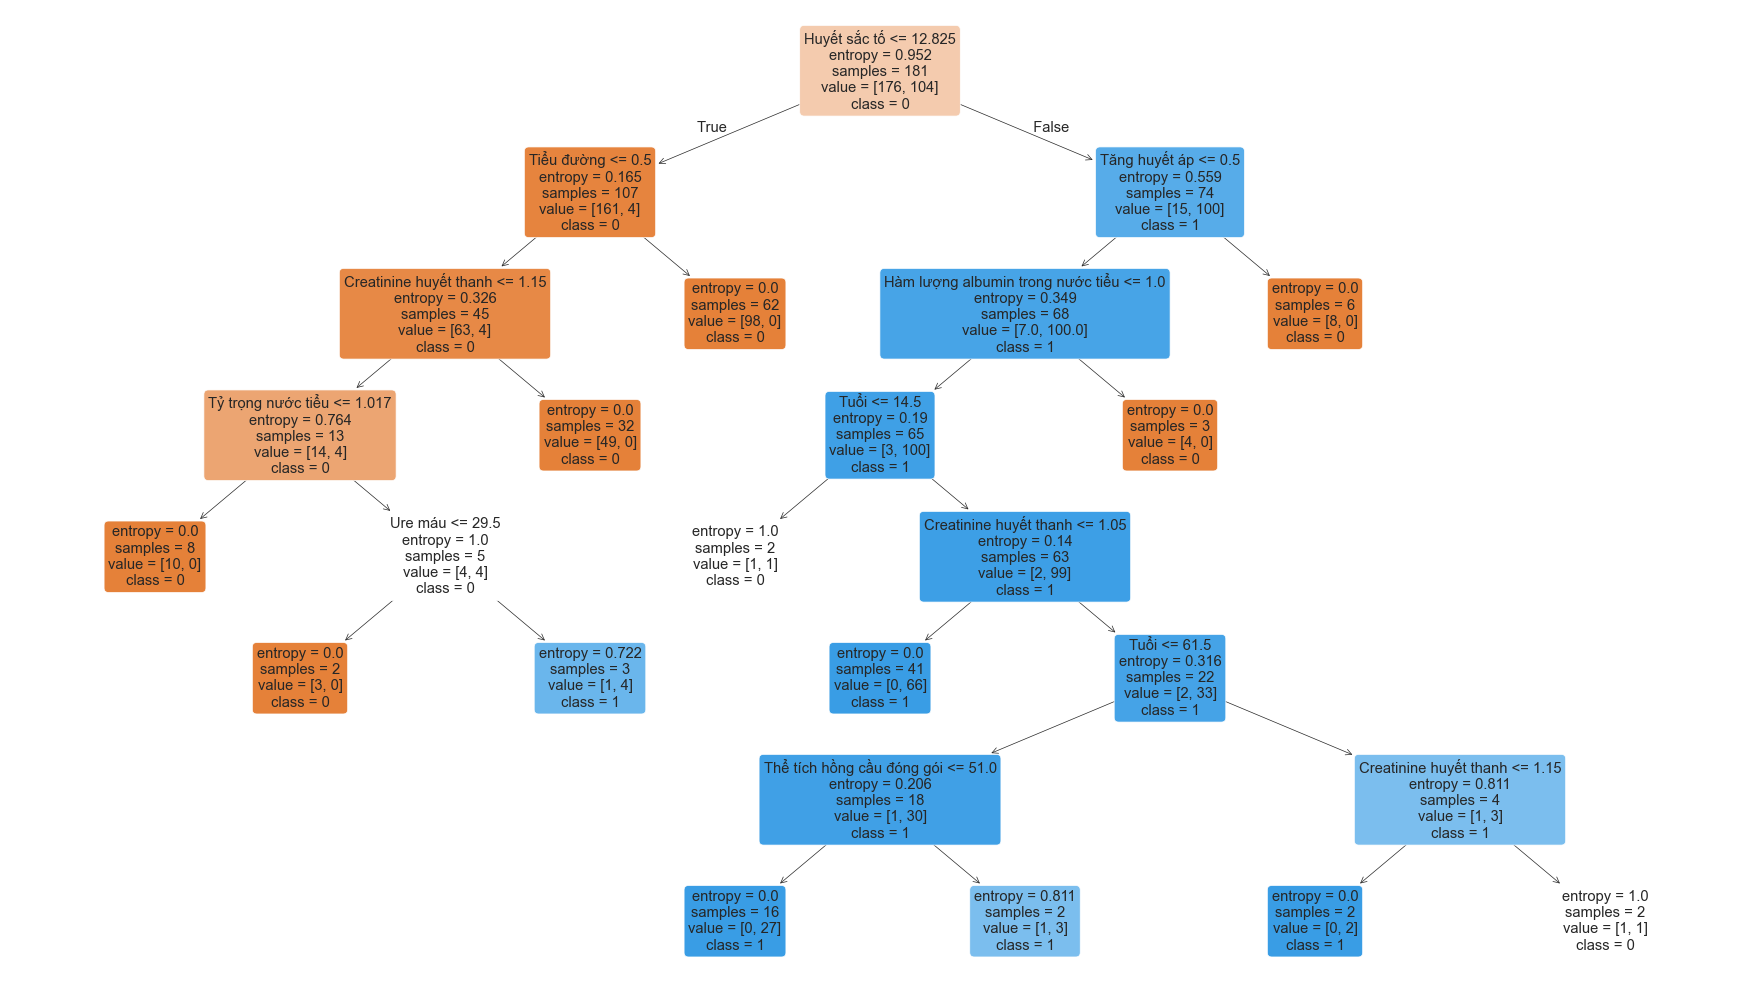

In [ ]:
import random
from sklearn import tree

# lấy 5 cây ngẫu nhiên
random_trees = random.sample(range(len(rd_clf.estimators_)), 2)

for idx in random_trees:
    plt.figure(figsize=(20, 12))
    plt.title(f"Cây số {idx}")
    tree.plot_tree(
        rd_clf.estimators_[idx],
        feature_names=X_train.columns,
        class_names=[str(cls) for cls in rd_clf.classes_],
        filled=True,
        rounded=True
    )
    plt.show()


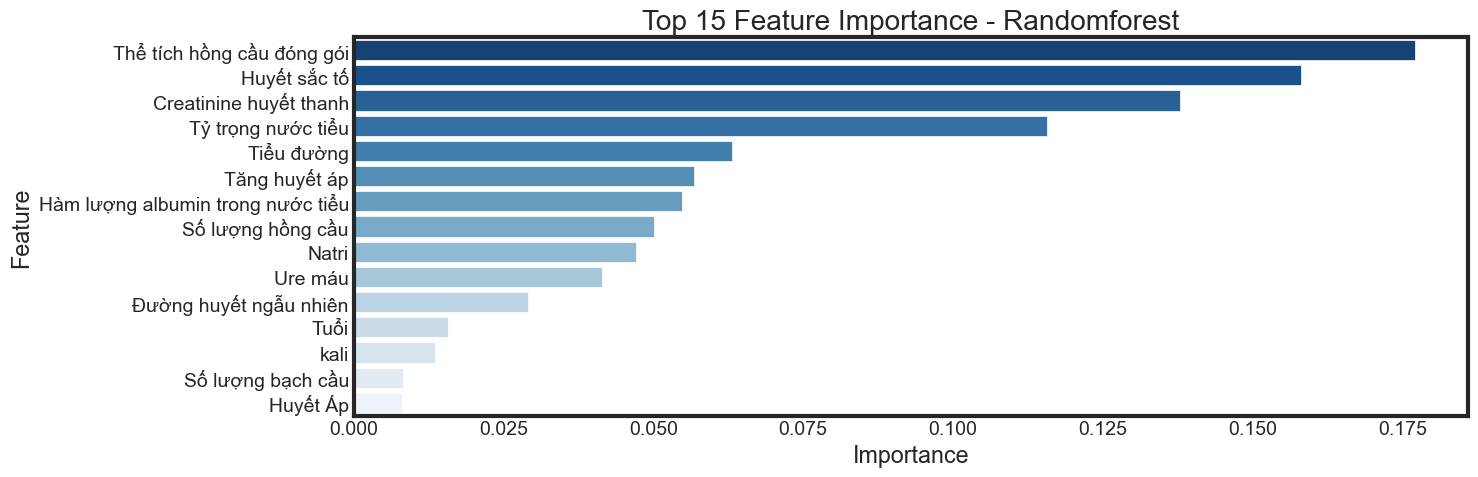

In [ ]:
importances = rd_clf.feature_importances_

feature_names = X_train.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

TOP_K = 15
fi_top = fi_df.head(TOP_K)

plt.figure(figsize=(15, 5))
sns.barplot(
    data=fi_top,
    x="Importance",
    y="Feature",
    palette="Blues_r"
)

plt.title(f"Top {TOP_K} Feature Importance - Randomforest")
plt.tight_layout()
plt.show()

<p style="color: green; font-size: 24px;text-align: center;">Logistic Regresstion</p>

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    max_iter=200
)

# Train model
log_clf.fit(X_train_scaled, y_train)


log_acc = accuracy_score(y_test, log_clf.predict(X_test_scaled))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, log_clf.predict(X_train_scaled))}")
print(f"Test Accuracy of Logistic Regression is {log_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, log_clf.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(y_test, log_clf.predict(X_test_scaled))}")

Training Accuracy of Logistic Regression is 0.95
Test Accuracy of Logistic Regression is 0.9916666666666667 

Confusion Matrix :- 
[[71  1]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Feature Importance (Logistic Regression):
                              Feature  Coefficient  Importance
2                  Tỷ trọng nước tiểu     2.493484    2.493484
19                         Tiểu đường    -2.006342    2.006342
3   Hàm lượng albumin trong nước tiểu    -1.766247    1.766247
18                      Tăng huyết áp    -1.624239    1.624239
14                       Huyết sắc tố     1.473700    1.473700
21                 Tình trạng ăn uống    -1.439550    1.439550
15         Thể tích hồng cầu đóng gói     1.191714    1.191714
22                           Phù chân    -1.170060    1.170060
1                            Huyết Áp    -1.027058    1.027058
9              Đường huyết ngẫu nhiên    -0.878735    0.878735
23                          Thiếu máu    -0.832979    0.832979
4           Mức đường trong nước tiểu    -0.576803    0.576803
11             Creatinine huyết thanh    -0.555289    0.555289
17                  Số lượng hồng cầu     0.452926    0.452926
10           

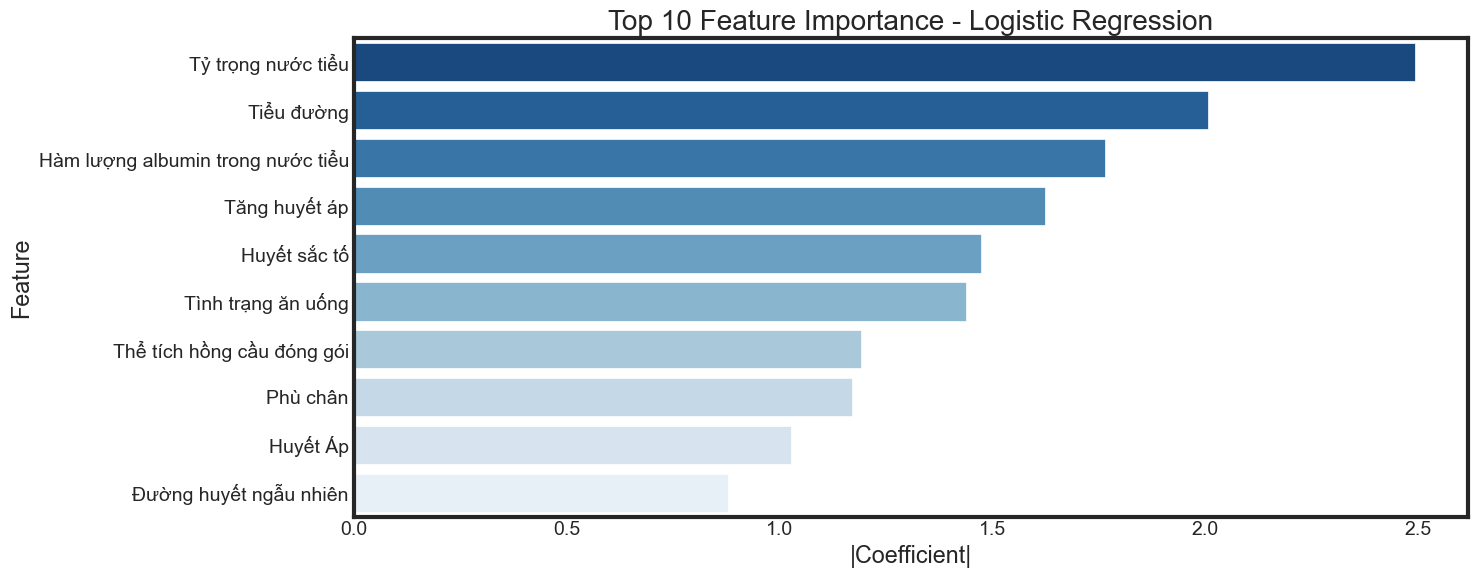

In [ ]:
coefficients = log_clf.coef_[0]

feature_names = X_train.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Importance": np.abs(coefficients)
})

fi_df = fi_df.sort_values(by="Importance", ascending=False)

print("Feature Importance (Logistic Regression):")
print(fi_df)

TOP_K = 10
fi_top = fi_df.head(TOP_K)

plt.figure(figsize=(15, 6))
sns.barplot(
    data=fi_top,
    x="Importance",
    y="Feature",
    palette="Blues_r"
)

plt.xlabel("|Coefficient|")
plt.ylabel("Feature")
plt.title(f"Top {TOP_K} Feature Importance - Logistic Regression")
plt.tight_layout()
plt.show()


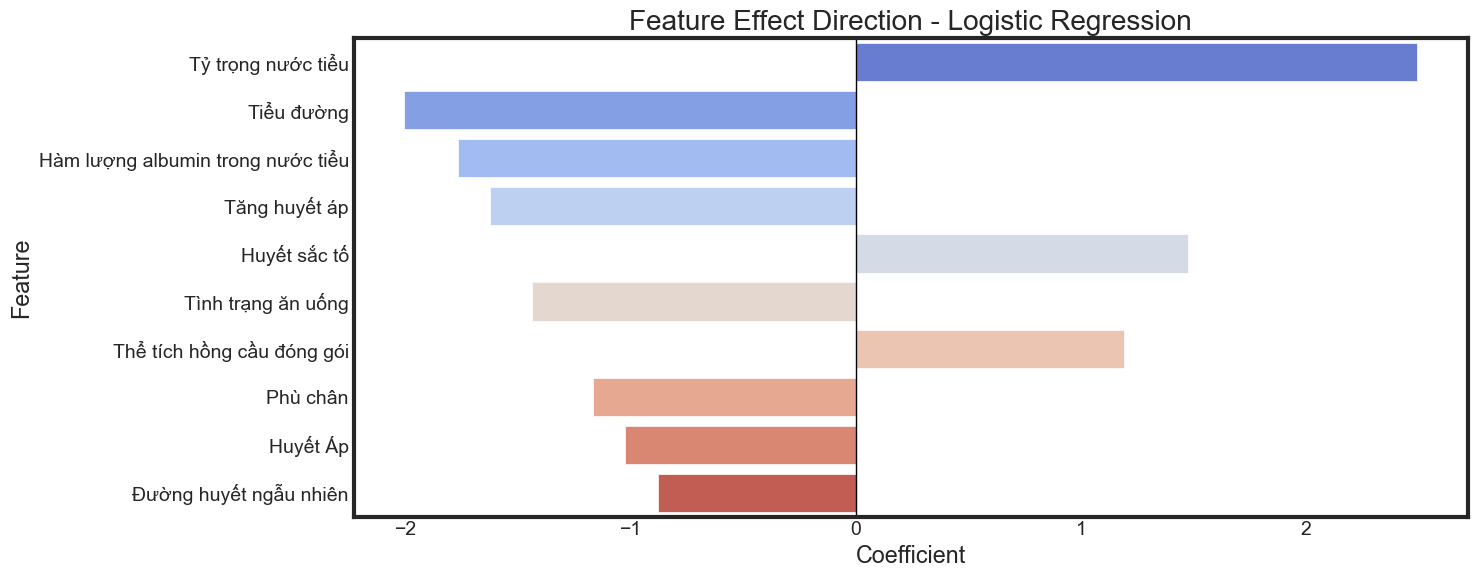

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(
    data=fi_top,
    x="Coefficient",
    y="Feature",
    palette="coolwarm"
)

plt.axvline(0, color="black", linewidth=1)
plt.title("Feature Effect Direction - Logistic Regression")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


<p style="color: green; font-size: 24px;text-align: center;">Models Comparison</p>

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Logistic Regresstion'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc,log_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2  Random Forest Classifier  1.000000
1  Decision Tree Classifier  0.991667
3      Logistic Regresstion  0.991667
0                       KNN  0.983333

In [ ]:
models_no_scaling = {
    "Decision Tree": dtc,
    "Random Forest": rd_clf
}

models_scaled = {
    "Logistic Regression": log_clf,
    "KNN": knn
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd


# --- 1. Nhóm mô hình KHÔNG cần chuẩn hóa ---
models_no_scaling = {
    "Decision Tree": dtc,
    "Random Forest": rd_clf
}

# --- 2. Nhóm mô hình CÓ chuẩn hóa ---
models_scaled = {
    "Logistic Regression": log_clf,
    "KNN": knn
}


def evaluate_models(model_dict, X_test_input, y_test):
    results = []
    
    for name, model in model_dict.items():
        y_pred = model.predict(X_test_input)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # AUC (nếu hỗ trợ)
        try:
            y_prob = model.predict_proba(X_test_input)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
        except:
            auc = None

        results.append([name, accuracy, precision, recall, f1, auc])

    return pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"])



# --- 3. ĐÁNH GIÁ MÔ HÌNH KHÔNG CHUẨN HÓA ---
df_no_scaling = evaluate_models(models_no_scaling, X_test, y_test)

# --- 4. ĐÁNH GIÁ MÔ HÌNH ĐƯỢC CHUẨN HÓA ---
df_scaled = evaluate_models(models_scaled, X_test_scaled, y_test)


# --- 5. In kết quả ---
print("KẾT QUẢ CHO MÔ HÌNH KHÔNG CẦN CHUẨN HÓA:")
display(df_no_scaling)

print("KẾT QUẢ CHO MÔ HÌNH CÓ CHUẨN HÓA:")
display(df_scaled)

KẾT QUẢ CHO MÔ HÌNH KHÔNG CẦN CHUẨN HÓA:


Model  Accuracy  Precision    Recall  F1-score       AUC
0  Decision Tree  0.991667        1.0  0.979167  0.989474  0.989583
1  Random Forest  1.000000        1.0  1.000000  1.000000  1.000000

KẾT QUẢ CHO MÔ HÌNH CÓ CHUẨN HÓA:


Model  Accuracy  Precision  Recall  F1-score       AUC
0  Logistic Regression  0.991667   0.979592     1.0  0.989691  1.000000
1                  KNN  0.983333   0.960000     1.0  0.979592  0.999855

ROC & AUC

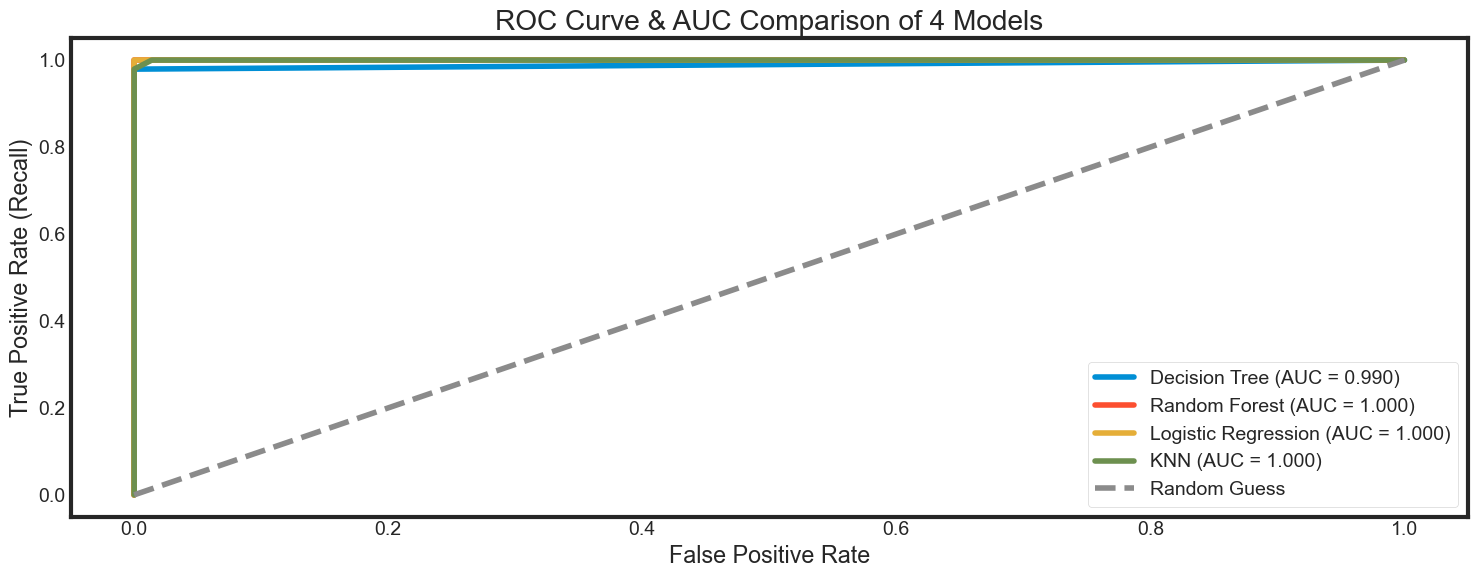

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(15, 6))


# Decision Tree
y_prob_dtc = dtc.predict_proba(X_test)[:, 1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_prob_dtc)
auc_dtc = auc(fpr_dtc, tpr_dtc)
plt.plot(fpr_dtc, tpr_dtc, label=f"Decision Tree (AUC = {auc_dtc:.3f})")

# Random Forest

y_prob_rf = rd_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")

# Logistic Regression
y_prob_log = log_clf.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")

# KNN
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")

# Random baseline

plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve & AUC Comparison of 4 Models")
plt.legend()
plt.tight_layout()
plt.show()


Shuffeld nhãn để hủy mối liên kết giữa X và Y

In [ ]:
# Shuffled Labels trên logistic ( Các mô hình khác tương tự nhau )
y_train_shuffled = np.random.permutation(y_train)
from sklearn.linear_model import LogisticRegression

log_shuffle = LogisticRegression(max_iter=1000)
log_shuffle.fit(X_train_scaled, y_train_shuffled)
y_train_pred = log_shuffle.predict(X_train_scaled)
y_test_pred  = log_shuffle.predict(X_test_scaled)
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train_shuffled, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy (shuffled): {train_acc:.4f}")
print(f"Test Accuracy (shuffled):     {test_acc:.4f}")
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix (Test, shuffled):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test, shuffled):")
print(classification_report(y_test, y_test_pred))
from sklearn.metrics import roc_auc_score

# Lấy xác suất dự đoán
y_test_proba = log_shuffle.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC-AUC (shuffled): {auc:.4f}")

Training Accuracy (shuffled): 0.6464
Test Accuracy (shuffled):     0.5250
Confusion Matrix (Test, shuffled):
[[63  9]
 [48  0]]

Classification Report (Test, shuffled):
              precision    recall  f1-score   support

           0       0.57      0.88      0.69        72
           1       0.00      0.00      0.00        48

    accuracy                           0.53       120
   macro avg       0.28      0.44      0.34       120
weighted avg       0.34      0.53      0.41       120

ROC-AUC (shuffled): 0.4624


In [ ]:
# Thử lại với 50 lần
import numpy as np
from sklearn.metrics import roc_auc_score

aucs = []
accs = []

for _ in range(50):
    y_shuf = np.random.permutation(y_train)
    log_shuffle.fit(X_train_scaled, y_shuf)

    y_test_proba = log_shuffle.predict_proba(X_test_scaled)[:, 1]
    y_test_pred  = log_shuffle.predict(X_test_scaled)

    aucs.append(roc_auc_score(y_test, y_test_proba))
    accs.append(accuracy_score(y_test, y_test_pred))

print("Mean shuffled AUC:", np.mean(aucs))
print("Std shuffled AUC:", np.std(aucs))
print("Mean shuffled Accuracy:", np.mean(accs))

Mean shuffled AUC: 0.5173263888888889
Std shuffled AUC: 0.1777271682851695
Mean shuffled Accuracy: 0.5081666666666667


Sử dụng K-fold để xem mô hình có thật sự đang ăn may hay không

In [ ]:
# K-fold với randomforest

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

pipe = Pipeline([
    ("scaler", StandardScaler()),  
    ("model", RandomForestClassifier(random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    pipe,
    X_train, y_train,
    cv=skf,
    scoring="roc_auc",
    return_train_score=False
)

# AUC từng fold
auc_per_fold = scores["test_score"]

print("AUC từng fold:")
for i, auc in enumerate(auc_per_fold, 1):
    print(f"Fold {i}: AUC = {auc:.4f}")

print("\nMean AUC:", np.mean(auc_per_fold))
print("Std  AUC:", np.std(auc_per_fold))

AUC từng fold:
Fold 1: AUC = 0.9986
Fold 2: AUC = 1.0000
Fold 3: AUC = 1.0000
Fold 4: AUC = 0.9986
Fold 5: AUC = 1.0000

Mean AUC: 0.9994501133786848
Std  AUC: 0.0006735304644117465


In [ ]:
logistic = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    logistic,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring="roc_auc",
    return_train_score=False
)
auc_per_fold = scores["test_score"]

print("AUC từng fold:")
for i, auc in enumerate(auc_per_fold, 1):
    print(f"Fold {i}: AUC = {auc:.4f}")

print("\nMean AUC:", np.mean(auc_per_fold))
print("Std  AUC:", np.std(auc_per_fold))

AUC từng fold:
Fold 1: AUC = 1.0000
Fold 2: AUC = 1.0000
Fold 3: AUC = 1.0000
Fold 4: AUC = 1.0000
Fold 5: AUC = 1.0000

Mean AUC: 1.0
Std  AUC: 0.0


Liệu rằng có feature nào đang chi phối không

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

single_auc = []

for col in X.columns:
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train_scaled[[col]], y_train)
    y_proba = logreg.predict_proba(X_test_scaled[[col]])[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    single_auc.append((col, auc))

single_auc_df = pd.DataFrame(single_auc, columns=["feature", "single_auc"]) \
                   .sort_values("single_auc", ascending=False)

single_auc_df

feature  single_auc
14                       Huyết sắc tố    0.982205
15         Thể tích hồng cầu đóng gói    0.954861
11             Creatinine huyết thanh    0.945602
2                  Tỷ trọng nước tiểu    0.926649
17                  Số lượng hồng cầu    0.916811
3   Hàm lượng albumin trong nước tiểu    0.833333
10                            Ure máu    0.788484
18                      Tăng huyết áp    0.777778
12                              Natri    0.767072
19                         Tiểu đường    0.743056
9              Đường huyết ngẫu nhiên    0.725984
1                            Huyết Áp    0.690683
21                 Tình trạng ăn uống    0.659722
23                          Thiếu máu    0.659722
6              Tình trạng bạch cầu mủ    0.652778
22                           Phù chân    0.638889
5                 Tình trạng hồng cầu    0.625000
4           Mức đường trong nước tiểu    0.625000
16                  Số lượng bạch cầu    0.620226
0                                Tuổi    0.618345
7                     Cụm bạch cầu mủ    0.590278
20                Bệnh động mạch vành    0.583333
8            Vi khuẩn trong nước tiểu    0.562500
13                               kali    0.529659

In [ ]:
from sklearn.metrics import roc_auc_score

base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train_scaled, y_train)
base_auc = roc_auc_score(
    y_test,
    base_model.predict_proba(X_test_scaled)[:, 1]
)

drop_results = []

for col in X.columns:
    Xtr = X_train_scaled.drop(columns=[col])
    Xte = X_test_scaled.drop(columns=[col])

    model = LogisticRegression(max_iter=1000)
    model.fit(Xtr, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(Xte)[:, 1])

    drop_results.append((col, base_auc - auc))

drop_df = pd.DataFrame(drop_results, columns=["feature", "auc_drop"]) \
            .sort_values("auc_drop", ascending=False)

drop_df


feature  auc_drop
2                  Tỷ trọng nước tiểu  0.006655
0                                Tuổi  0.000000
13                               kali  0.000000
22                           Phù chân  0.000000
21                 Tình trạng ăn uống  0.000000
20                Bệnh động mạch vành  0.000000
19                         Tiểu đường  0.000000
18                      Tăng huyết áp  0.000000
17                  Số lượng hồng cầu  0.000000
16                  Số lượng bạch cầu  0.000000
15         Thể tích hồng cầu đóng gói  0.000000
14                       Huyết sắc tố  0.000000
12                              Natri  0.000000
1                            Huyết Áp  0.000000
11             Creatinine huyết thanh  0.000000
10                            Ure máu  0.000000
9              Đường huyết ngẫu nhiên  0.000000
8            Vi khuẩn trong nước tiểu  0.000000
7                     Cụm bạch cầu mủ  0.000000
6              Tình trạng bạch cầu mủ  0.000000
5                 Tình trạng hồng cầu  0.000000
4           Mức đường trong nước tiểu  0.000000
3   Hàm lượng albumin trong nước tiểu  0.000000
23                          Thiếu máu  0.000000

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    base_model,
    X_test_scaled,
    y_test,
    scoring="roc_auc",
    n_repeats=20,
    random_state=42
)

perm_df = pd.DataFrame({
    "feature": X.columns,
    "importance": perm.importances_mean,
    "std": perm.importances_std
}).sort_values("importance", ascending=False)

perm_df


feature  importance       std
3   Hàm lượng albumin trong nước tiểu    0.054586  0.013595
2                  Tỷ trọng nước tiểu    0.013151  0.004219
19                         Tiểu đường    0.002503  0.001596
4           Mức đường trong nước tiểu    0.001910  0.001502
21                 Tình trạng ăn uống    0.001418  0.000950
18                      Tăng huyết áp    0.001172  0.001216
14                       Huyết sắc tố    0.000174  0.000423
12                              Natri    0.000116  0.000231
22                           Phù chân    0.000014  0.000063
15         Thể tích hồng cầu đóng gói    0.000014  0.000063
20                Bệnh động mạch vành    0.000000  0.000000
17                  Số lượng hồng cầu    0.000000  0.000000
16                  Số lượng bạch cầu    0.000000  0.000000
0                                Tuổi    0.000000  0.000000
13                               kali    0.000000  0.000000
1                            Huyết Áp    0.000000  0.000000
11             Creatinine huyết thanh    0.000000  0.000000
10                            Ure máu    0.000000  0.000000
9              Đường huyết ngẫu nhiên    0.000000  0.000000
8            Vi khuẩn trong nước tiểu    0.000000  0.000000
7                     Cụm bạch cầu mủ    0.000000  0.000000
6              Tình trạng bạch cầu mủ    0.000000  0.000000
5                 Tình trạng hồng cầu    0.000000  0.000000
23                          Thiếu máu    0.000000  0.000000

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(max_iter=1000),
    X_train_scaled,
    y_train,
    cv=5,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)


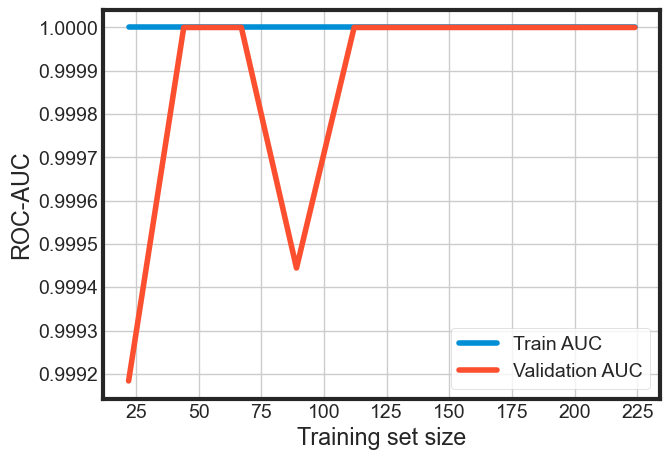

In [ ]:

plt.plot(train_sizes, train_mean, label="Train AUC")
plt.plot(train_sizes, val_mean, label="Validation AUC")
plt.xlabel("Training set size")
plt.ylabel("ROC-AUC")
plt.legend()
plt.grid()
plt.show()